# Telecom Churn Prediction

## Problem Statement

- In the telecom industry, customers are able to choose from a wide range of service providers and switch from (called Churn) one providor to another with an average of 15-25% annual churn rate.
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become way more important than customer acquisition.
- To reduce customer churn, telecom companies need to predict which customers are at a high risk of churn.
- This case study is based on Indian and Southeast Asian market


## Business Objective

- Retaining high profitable customer is the number one business goal
- Analyse customer level data and build predictive models to identify customers at high risk of churn
- Identify the main indicators of churn
- The dataset contains the customer level data for a span of 4 months - June, July, August and September. The goal is to predict the churn in the last month using the data from the first 3 months
- Recomend strategies to manage customer churn based on the model and obsevations

___

# Step 1: Reading and Understanding Data

#### 1.1: Importing Libraries

In [1]:
# basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import time

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For model building
import sklearn
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#Display all columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

#### 1.2: Importing and Reading the Dataset

In [2]:
# Reading the dataset

telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Displaying the dataset with first 5 rows

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [4]:
# Checking the dimension of the dataset
telecom.shape

(99999, 226)

In [5]:
# Printing Size and Shape
print('Size: {}\nShape : {}\nRows : {}\nColumns: {}'.format(telecom.size,telecom.shape,telecom.shape[0],telecom.shape[1]))

Size: 22599774
Shape : (99999, 226)
Rows : 99999
Columns: 226


In [6]:
# Checking the feature summary
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Checking the Statistical summary of numerical data
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean   132.395875    133.670805    133.018098    130.302327    197.935577     
std    297.207406    308.794148    308.951589    308.477668    316.851613     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    7.380000      6.660000      6.460000      5.330000      34.730000      
50%    34.310000     32.330000     32.360000     29.840000     96.310000      
75%    118.740000    115.595000    115.860000    112.130000    231.860000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000    
mean   197.045133    196.574803    190.337222    9.950013       7.149898        
std    325.862803    327.170662    319.396092    72.825411      73.447948       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    32.190000     31.630000     27.130000     0.000000       0.000000        
50%    91.735000     92.140000     87.290000     0.000000       0.000000        
75%    226.815000    228.260000    220.505000    0.000000       0.000000        
max    9667.130000   14007.340000  10310.760000  13724.380000   15371.040000    

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  94621.000000   92254.000000   96062.000000   96140.000000    
mean   7.292981       6.343841       13.911337      9.818732        
std    68.402466      57.137537      71.443196      58.455762       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    13095.360000   8464.030000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  94621.000000   92254.000000   96062.000000      96140.000000       
mean   9.971890       8.555519       47.100763         46.473010          
std    64.713221      58.438186      150.856393        155.318705         
min    0.000000       0.000000       0.000000          0.000000           
25%    0.000000       0.000000       1.660000          1.630000           
50%    0.000000       0.000000       11.910000         11.610000          
75%    0.000000       0.000000       40.960000         39.910000          
max    53

In [8]:
# Keeping a backup of the dataset
telecom_original = telecom.copy()

#### 1.3: Importing, reading and displaying the data dictionary

In [9]:
# Importing the Data Dictionary to understand the terms
telecom_data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [10]:
# Displaying the Data Dictionary
telecom_data_dict

Acronyms      \
0   MOBILE_NUMBER   
1   CIRCLE_ID       
2   LOC             
3   STD             
4   IC              
5   OG              
6   T2T             
7   T2M             
8   T2O             
9   T2F             
10  T2C             
11  ARPU            
12  MOU             
13  AON             
14  ONNET           
15  OFFNET          
16  ROAM            
17  SPL             
18  ISD             
19  RECH            
20  NUM             
21  AMT             
22  MAX             
23  DATA            
24  3G              
25  AV              
26  VOL             
27  2G              
28  PCK             
29  NIGHT           
30  MONTHLY         
31  SACHET          
32  *.6             
33  *.7             
34  *.8             
35  *.9             
36  FB_USER         
37  VBC             

                                                                          Descriptions  
0   Customer phone number                                                               
1   Telecom circle area to which the customer belongs to                                
2   Local calls - within same telecom circle                                            
3   STD calls - outside the calling circle                                              
4   Incoming calls                                                                      
5   Outgoing calls                                                                      
6   Operator T to T, i.e. within same operator (mobile to mobile)                       
7   Operator T to other operator mobile                                                 
8   Operator T to other operator fixed line                                             
9   Operator T to fixed lines of T                                                      
10  Operator T to it’s own call center                                                  
11  Average revenue per user                                                            
12  Minutes of usage - voice calls                                                      
13  Age on network - number of days the customer is using the operator T network        
14  All kind of calls within the same operator network                                  
15  All kind of calls outside the operator T network                                    
16  Indicates that customer is in roaming zone during the call                          
17  Special calls                                                                       
18  ISD calls                                                                           
19  Recharge                                                                            
20  Number                                                                              
21  Amount in local currency                                                            
22  Maximum                                                                             
23  Mobile internet                                                                     
24  3G network                                                                          
25  Average                                                                             
26  Mobile internet usage volume (in MB)                                                
27  2G network                                                                          
28  Prepaid service schemes called - PACKS                                              
29  Scheme to use during specific night hours only                                      
30  Service schemes with validity equivalent to a month                                 
31  Service schemes with validity smaller than a month                                  
32  KPI for the month of June                                                           
33  KPI for the month of July                                                           
34  KPI for the month of August                                       

### In this case study, we assume that there are 3 phases of customer lifecycle : 
1. The Good Phase  : Month 6 and 7
2. The Action Phase : Month 8
3. The Churn Phase : Month 9
___

# Step 2: Data Cleaning

#### 2.1: Processing Columns

In [11]:
# On observing we see that the first column is 'mobile_number' in the data frame 'telecom'.

# Each mobile number is unique. We would be checking whether there are null values in this column and also, if there are any
# duplicate entries in this column

In [12]:
# Checking the null values in the column 'mobile_number':
telecom['mobile_number'].isnull().sum()

0

In [13]:
# Checking for the duplicate entries in the column 'mobile_number' ('True' in the output would mean that there are no
# duplicates):

sum(telecom.duplicated(subset = 'mobile_number')) == 0

True

In [14]:
# As we can see, in the column 'mobile_number', there are no null valus and no duplicate values.

In [15]:
# Assigning the values in the column 'mobile_number' to a new Pandas Series 'mn':
mn = telecom['mobile_number']
mn.head()

0    7000842753
1    7001865778
2    7001625959
3    7001204172
4    7000142493
Name: mobile_number, dtype: int64

In [16]:
# On the inspection of the data frame 'telecom' and the corresponding data dictionary, we can see that the column 'circle_id'
# represent 'Telecom circle area to which the customer belongs to'. We anticipate that the unique values in this column
# would be very few. Let us analyze this column:
telecom['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [17]:
# We can see that there is only 1 unique value in all the rows in 'circle_id'. This would not add any value in our analysis.

# We would be dropping 'mobile_number' and 'circle_id' columns shortly from the data frame 'telecom' for further analysis

In [18]:
# Creating column name list by the relevant type of columns:

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
            'last_date_of_month_7',
            'last_date_of_month_8',
            'last_date_of_month_9',
            'date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_9',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
            'date_of_last_rech_data_9'
            ]

cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'night_pck_user_9',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
            'fb_user_9'
           ]

num_cols = [column for column in telecom.columns if column not in id_cols + date_cols + cat_cols]

In [19]:
# Dropping the ID and Date columns as they are not useful for our analysis:

telecom.drop(columns = id_cols, axis = 1, inplace = True)
telecom.drop(columns = date_cols, axis = 1, inplace = True)

In [20]:
# Just like the column 'circle_id', there may be other columns in the data frame 'telecom', which contain just 1 unique value
# Checking such columns:

In [21]:
nunique = telecom.apply(pd.Series.nunique)
cols_unique = nunique[nunique==1].index
cols_unique

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [22]:
# Viewing the unique values in these columns:
pd.DataFrame(telecom[cols_unique].value_counts())

0
loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou std_og_t2c_mou_6 std_og_t2c_mou_7 std_og_t2c_mou_8 std_og_t2c_mou_9 std_ic_t2o_mou_6 std_ic_t2o_mou_7 std_ic_t2o_mou_8 std_ic_t2o_mou_9       
0.0            0.0            0.0            0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               88327

In [23]:
# All the columns mentioned in 'cols_unique' list contain just one value: 0.0. Total quantity of this value in all the columns
# is 88327

In [24]:
# In the list 'cols_to_drop', there may be some columns which may contain missing values.
telecom[cols_unique].isnull().sum().sort_values(ascending=False)

std_og_t2c_mou_9    7745
std_ic_t2o_mou_9    7745
std_og_t2c_mou_8    5378
std_ic_t2o_mou_8    5378
std_og_t2c_mou_6    3937
std_ic_t2o_mou_6    3937
std_og_t2c_mou_7    3859
std_ic_t2o_mou_7    3859
loc_og_t2o_mou      1018
std_og_t2o_mou      1018
loc_ic_t2o_mou      1018
dtype: int64

In [25]:
(telecom[cols_unique].isnull().sum()).shape

(11,)

In [26]:
telecom.shape

(99999, 212)

In [27]:
# Dropping the columns mentioned in the list 'cols_unique':
telecom.drop(cols_unique, axis = 1, inplace = True)

In [28]:
telecom.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803  21.100  NaN          NaN           0.00          
1  34.047   355.074  268.321  86.285   24.11        78.68        7.68          
2  167.690  189.058  210.226  290.714  11.54        55.24        37.26         
3  221.338  251.102  508.054  389.500  99.91        54.39        310.98        
4  261.636  309.876  238.174  163.426  50.31        149.44       83.89         

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0 NaN          NaN           NaN            0.00         NaN             
1  18.34        15.74         99.84         304.76        53.76          
2  74.81        143.33        220.59        208.36        118.91         
3  241.71       123.31        109.01        71.68         113.54         
4  58.78        76.96         91.88         124.26        45.81          

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0 NaN            NaN             0.00          NaN            NaN              
1  0.0            0.00           0.00           0.00           0.0             
2  0.0            0.00           0.00           38.49          0.0             
3  0.0            54.86          44.38          0.00           0.0             
4  0.0            0.00           0.00           0.00           0.0             

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0 NaN             0.00          NaN            NaN                 
1  0.00           0.00           0.00           23.88              
2  0.00           0.00           70.94          7.19               
3  28.09          39.04          0.00           73.68              
4  0.00           0.00           0.00           50.31              

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  74.56             7.68              18.34             11.51              
2  28.74             13.58             14.39             29.34              
3  34.81             10.61             15.49             107.43             
4  149.44            83.89             58.78             67.64              

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  75.94             291.86            53.76             0.00               
2  16.86             38.46             28.16             24.11              
3  83.21             22.46             65.46             1.91               
4  91.88             124.26            37.89             0.00               

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  0.00              0.00              0.00              0.0                
2  21.79             15.61             22.24             0.0                
3  0.65              4.91              2.06              0.0                
4  0.00              0.00              1.93              0.0                

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0 NaN                0.00             NaN               NaN             
1  2.91              0.00              0.00              35.39          
2  135.54            45.76             0.48              60.66          
3  0.00              0.00              0.00              183.03         
4  0.00              0.00              0.00              117.96         

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0 NaN            0.00         NaN           NaN                 
1  150.51        299.54        72.11         0.23               
2  67.41         67.66         64.81         4.34               
3  118.68        37.99         83.03         26.23              
4  241.33        208.16        98.6

In [29]:
telecom.shape

(99999, 201)

#### 2.2 Missing value Treatment

In [30]:
# Cheching the missing value percentage in the dataset
col_missing = ((telecom.isnull().sum()/telecom.shape[0])*100).round(2)

# Checking Columns with more than 70% missing values
col_missing[col_missing >=70].sort_values(ascending=False)

total_rech_data_6     74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
arpu_2g_6             74.85
count_rech_3g_6       74.85
night_pck_user_6      74.85
max_rech_data_6       74.85
fb_user_6             74.85
arpu_3g_6             74.85
night_pck_user_7      74.43
max_rech_data_7       74.43
count_rech_2g_7       74.43
arpu_3g_7             74.43
count_rech_3g_7       74.43
arpu_2g_7             74.43
fb_user_7             74.43
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
night_pck_user_9      74.08
arpu_2g_9             74.08
arpu_3g_9             74.08
fb_user_9             74.08
av_rech_amt_data_9    74.08
count_rech_3g_9       74.08
count_rech_2g_9       74.08
max_rech_data_9       74.08
total_rech_data_9     74.08
arpu_3g_8             73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
count_rech_2g_8       73.66
night_pck_user_8      73.66
max_rech_data_8       73.66
total_rech_data_8     73.66
fb_user_8             73.66
av_rech_amt_data_8  

In [31]:
# There are several variables, where the data appears to be missing in the same percentages. This indicates meaningful missing.

# Our approach would be to identify and club similar data together:
# 1.) Identify and club 'recharge related' data and then perform missing value treatment.
# 2.) Identify and club 'arpu' data and then perform missing value treatment.
# 3.) Perform missing value treatment on the 'categorical columns'.

As more than 73% ***recharge*** related data are missing, we will impute the NaN values by ***0***

In [32]:
# Columns with recharge information 
recharge_cols = telecom.columns[telecom.columns.str.contains('_rech_')]
print(recharge_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [33]:
pd.Series(recharge_cols).shape

(32,)

In [34]:
# Replacing NaN values in recharge related columns with 0:

telecom[recharge_cols] = telecom[recharge_cols].apply(lambda x:x.fillna(0))
print(telecom[recharge_cols].isnull().sum()*100/telecom.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64


 - There is no missing value in the recharge columns now

In [35]:
# Now that we are done with the recharge columns, the next high missing value columns are that with 'arpu' prefix.

# Let us treat the missing values in the columns with 'arpu' prefix:

In [36]:
# Columns with 'arpu' information 
arpu_cols = telecom.columns[telecom.columns.str.contains('arpu_')]
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')


In [37]:
pd.Series(arpu_cols).shape

(12,)

In [38]:
# Replacing NaN values in arpu related columns with 0 

telecom[arpu_cols] = telecom[arpu_cols].apply(lambda x:x.fillna(0))
print(telecom[arpu_cols].isnull().sum()*100/telecom.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_9       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_3g_9    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
arpu_2g_9    0.0
dtype: float64


In [39]:
pd.Series(arpu_cols).shape

(12,)

In [40]:
# Imputing missing values in Categorical columns with -1 and will treat -1 as a new category

for col in cat_cols:
    telecom[col].fillna(value = -1, inplace = True)

In [41]:
# Earlier, we observed that the columns listed in cat_cols are of float64 data type. We would need to convert them to
# object data type:

telecom[cat_cols] =  telecom[cat_cols].astype('category')

In [42]:
# Verifying if the data types of all the columns in 'cat_cols' is 'category' or not:
telecom[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  99999 non-null  category
 1   night_pck_user_7  99999 non-null  category
 2   night_pck_user_8  99999 non-null  category
 3   night_pck_user_9  99999 non-null  category
 4   fb_user_6         99999 non-null  category
 5   fb_user_7         99999 non-null  category
 6   fb_user_8         99999 non-null  category
 7   fb_user_9         99999 non-null  category
dtypes: category(8)
memory usage: 782.4 KB


In [43]:
print(telecom[cat_cols].isnull().sum()*100/telecom.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


- There is no missing value in the categorical columns now


In [44]:
# Checking for the columns which have less than 70% missing values:
col_missing[col_missing <=70].sort_values(ascending = False)

og_others_9           7.75
std_ic_mou_9          7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
loc_ic_mou_9          7.75
loc_og_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
std_ic_t2m_mou_9      7.75
loc_og_t2m_mou_9      7.75
std_og_t2m_mou_9      7.75
std_ic_t2f_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_ic_t2f_mou_9      7.75
std_og_t2f_mou_9      7.75
roam_og_mou_9         7.75
loc_ic_t2m_mou_9      7.75
std_ic_t2t_mou_9      7.75
ic_others_9           7.75
spl_og_mou_9          7.75
std_og_mou_9          7.75
spl_ic_mou_9          7.75
offnet_mou_9          7.75
loc_ic_t2t_mou_9      7.75
roam_ic_mou_9         7.75
isd_og_mou_9          7.75
isd_ic_mou_9          7.75
onnet_mou_9           7.75
loc_ic_t2t_mou_8      5.38
spl_og_mou_8          5.38
std_og_t2t_mou_8      5.38
loc_ic_t2m_mou_8      5.38
loc_ic_mou_8          5.38
isd_og_mou_8          5.38
std_og_t2f_mou_8      5.38
std_og_mou_8          5.38
loc_og_mou_8          5.38
std_og_t2m_mou_8      5.38
l

In [45]:
# Here again, we see that the percentages (7.75%, 5.38%, 3.94% and 3.86%) of missing values are common among multiple columns

In [46]:
# Columns with 7.75% missing values:
col_missing_7 = ['loc_og_t2c_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'std_ic_t2f_mou_9', 'loc_og_t2f_mou_9',
                 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_ic_t2t_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
                 'loc_ic_mou_9', 'std_og_t2f_mou_9', 'loc_ic_t2f_mou_9', 'std_og_t2c_mou_9', 'loc_ic_t2m_mou_9', 'std_og_mou_9',
                 'isd_og_mou_9', 'loc_ic_t2t_mou_9', 'spl_og_mou_9', 'std_ic_t2o_mou_9', 'og_others_9', 'ic_others_9',
                 'isd_ic_mou_9', 'roam_og_mou_9', 'offnet_mou_9', 'onnet_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
                 'roam_ic_mou_9']
pd.Series(col_missing_7).shape

(29,)

In [47]:
# Columns with 5.38% missing values:
col_missing_5 = ['std_og_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'offnet_mou_8', 'loc_ic_mou_8',
                 'loc_ic_t2f_mou_8', 'ic_others_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'isd_og_mou_8', 'onnet_mou_8',
                 'std_og_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'std_og_t2t_mou_8', 'spl_og_mou_8', 'std_ic_mou_8',
                 'std_ic_t2o_mou_8', 'loc_og_t2m_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2f_mou_8',
                 'loc_ic_t2m_mou_8', 'loc_og_t2c_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'loc_og_mou_8', 'roam_ic_mou_8',
                 'loc_ic_t2t_mou_8']
pd.Series(col_missing_5).shape

(29,)

In [48]:
# Columns with 3.94% missing values:
col_missing_3_1 = ['loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_6', 'ic_others_6', 'std_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
                   'isd_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'std_ic_t2o_mou_6',
                   'std_ic_t2t_mou_6', 'spl_og_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6',
                   'loc_og_t2t_mou_6', 'roam_og_mou_6', 'std_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'roam_ic_mou_6',
                   'std_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'offnet_mou_6', 'og_others_6', 'onnet_mou_6', 'loc_og_mou_6',
                   'loc_og_t2m_mou_6']
pd.Series(col_missing_3_1).shape

(29,)

In [49]:
# Columns with 3.86% missing values:
col_missing_3_2 = ['std_ic_t2o_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2m_mou_7', 'og_others_7', 'loc_og_t2t_mou_7',
                   'std_ic_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'isd_ic_mou_7',
                   'onnet_mou_7', 'ic_others_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7', 'spl_og_mou_7', 'std_og_mou_7',
                   'std_ic_t2m_mou_7', 'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
                   'loc_ic_mou_7', 'std_og_t2c_mou_7', 'loc_ic_t2t_mou_7', 'isd_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_mou_7',
                   'loc_ic_t2f_mou_7']
pd.Series(col_missing_3_2).shape

(29,)

In [50]:
# Combining all the relevant lists to form 'small_col_missing' list:
small_col_missing = col_missing_7 + col_missing_5 + col_missing_3_1 + col_missing_3_2

# The number of columns in each is 29. Thus, if we combine all the columns together, their total should be 29 x 4 = 116
# Checking the shape of the combined column names:
pd.Series(small_col_missing).shape

(116,)

In [51]:
# We will be imputing these missing values (mentioned in the list 'small_col_missing') with KNN ahead.

In [52]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 201 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    arpu_9              float64 
 4    onnet_mou_6         float64 
 5    onnet_mou_7         float64 
 6    onnet_mou_8         float64 
 7    onnet_mou_9         float64 
 8    offnet_mou_6        float64 
 9    offnet_mou_7        float64 
 10   offnet_mou_8        float64 
 11   offnet_mou_9        float64 
 12   roam_ic_mou_6       float64 
 13   roam_ic_mou_7       float64 
 14   roam_ic_mou_8       float64 
 15   roam_ic_mou_9       float64 
 16   roam_og_mou_6       float64 
 17   roam_og_mou_7       float64 
 18   roam_og_mou_8       float64 
 19   roam_og_mou_9       float64 
 20   loc_og_t2t_mou_6    float64 
 21   loc_og_t2t_mou_7    float64 
 22   loc_og_t2t_mou_8    float64 
 23   loc_og_t2

In [53]:
telecom.shape

(99999, 201)

In [54]:
(((telecom.isnull().sum()/telecom.shape[0])*100).round(2)).sort_values(ascending = False)

loc_ic_mou_9          7.75
roam_ic_mou_9         7.75
loc_og_mou_9          7.75
std_ic_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_og_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
std_ic_mou_9          7.75
std_ic_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
roam_og_mou_9         7.75
og_others_9           7.75
loc_ic_t2f_mou_9      7.75
std_og_mou_9          7.75
ic_others_9           7.75
isd_og_mou_9          7.75
std_ic_t2f_mou_9      7.75
spl_og_mou_9          7.75
onnet_mou_9           7.75
loc_og_t2c_mou_9      7.75
offnet_mou_9          7.75
isd_ic_mou_9          7.75
std_og_t2f_mou_9      7.75
std_og_mou_8          5.38
std_ic_mou_8          5.38
std_og_t2m_mou_8      5.38
og_others_8           5.38
std_og_t2t_mou_8      5.38
isd_og_mou_8          5.38
std_ic_t2m_mou_8      5.38
loc_og_mou_8          5.38
std_og_t2f_mou_8      5.38
loc_og_t2f_mou_8      5.38
i

#### 2.3 Deriving New Features

We can derive a new feature ***Total Data Recharge amount*** using total_rech_data and av_rech_amt_data that will give us recharge amount utilized by the customer twoards data

- ***Total Data Recharge amount = Total data recharge * Avg data recharge***

We can also derive the ***total average recharge amount*** for the 'Good Phase", i.e. months 6 and 7

- ***Average total recharge (Total recharge amount + Total Data Recharge )*** 

In [55]:
# Deriving new columns for Total Data Recharge Amount for the 'Good Phase'

telecom['total_rech_data_amt_6'] = telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_data_amt_7'] = telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']


telecom['total_avg_rech_amt'] = (telecom['total_rech_data_amt_6']+telecom['total_rech_amt_6']+
                                    telecom['total_rech_data_amt_7']+telecom['total_rech_amt_7'])/2

In [56]:
# Dropping the 'total_rech_data_*' and 'av_rech_amt_data_*' as they are not so useful columns for high value customer or churn

drop_data_cols = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                  'total_rech_data_9']

telecom.drop(drop_data_cols,axis=1, inplace=True)

In [57]:
# Checking for any Null value

telecom['total_avg_rech_amt'].isnull().sum()

0

In [58]:
telecom.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803  21.100  NaN          NaN           0.00          
1  34.047   355.074  268.321  86.285   24.11        78.68        7.68          
2  167.690  189.058  210.226  290.714  11.54        55.24        37.26         
3  221.338  251.102  508.054  389.500  99.91        54.39        310.98        
4  261.636  309.876  238.174  163.426  50.31        149.44       83.89         

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0 NaN          NaN           NaN            0.00         NaN             
1  18.34        15.74         99.84         304.76        53.76          
2  74.81        143.33        220.59        208.36        118.91         
3  241.71       123.31        109.01        71.68         113.54         
4  58.78        76.96         91.88         124.26        45.81          

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0 NaN            NaN             0.00          NaN            NaN              
1  0.0            0.00           0.00           0.00           0.0             
2  0.0            0.00           0.00           38.49          0.0             
3  0.0            54.86          44.38          0.00           0.0             
4  0.0            0.00           0.00           0.00           0.0             

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0 NaN             0.00          NaN            NaN                 
1  0.00           0.00           0.00           23.88              
2  0.00           0.00           70.94          7.19               
3  28.09          39.04          0.00           73.68              
4  0.00           0.00           0.00           50.31              

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  74.56             7.68              18.34             11.51              
2  28.74             13.58             14.39             29.34              
3  34.81             10.61             15.49             107.43             
4  149.44            83.89             58.78             67.64              

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  75.94             291.86            53.76             0.00               
2  16.86             38.46             28.16             24.11              
3  83.21             22.46             65.46             1.91               
4  91.88             124.26            37.89             0.00               

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0 NaN                0.00             NaN               NaN                 
1  0.00              0.00              0.00              0.0                
2  21.79             15.61             22.24             0.0                
3  0.65              4.91              2.06              0.0                
4  0.00              0.00              1.93              0.0                

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0 NaN                0.00             NaN               NaN             
1  2.91              0.00              0.00              35.39          
2  135.54            45.76             0.48              60.66          
3  0.00              0.00              0.00              183.03         
4  0.00              0.00              0.00              117.96         

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0 NaN            0.00         NaN           NaN                 
1  150.51        299.54        72.11         0.23               
2  67.41         67.66         64.81         4.34               
3  118.68        37.99         83.03         26.23              
4  241.33        208.16        98.6

In [59]:
# Current dimention of the dataset
telecom.shape

(99999, 194)

#### 2.4: Deriving the Target variable 'churn'

#### The churn prediction will be made on high value customers

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)


In [60]:
# Creating a filter for high value customers with cutoff greater than 70th perventile of total avg recharge amount

cutoff = telecom.total_avg_rech_amt.quantile(.70)
print('70 percentile of first two months avg recharge amount : ', cutoff)

70 percentile of first two months avg recharge amount :  478.0


#### Subscribers with total average recharge > 478.0 will be excluded and high value customers will be extracted

In [61]:
# Extracting High Value Customers

high_val = telecom[telecom['total_avg_rech_amt'] >= cutoff]

print('High Value customer data has {} records and {} columns'.format(high_val.shape[0],high_val.shape[1]))

High Value customer data has 30001 records and 194 columns


Deriving churn-customers and remove attributes of the churn phase

These are customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

- Churn : 1
- No Churn : 0   



The attributes that will be used to tag Churn-customers are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [62]:
churn_phase_usage_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [63]:
# The Churn column will be 1 if all values for incomming, outgoing , 2G, 3G is 0, else value wil be 0

high_val['churn'] = np.where(high_val['total_ic_mou_9']+high_val['total_og_mou_9']+
                             high_val['vol_2g_mb_9']+high_val['vol_3g_mb_9']==0,1,0)
high_val['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

#### 2.5: Understanding Churn Rate and Imbalance Percentage

In [64]:
# Churn Percentage

churn_perc = round(100*high_val['churn'].value_counts(normalize=True),2)
print('There are {}% customers that can be marked as Churn and {}% customers can be marked as No Churn'.format(churn_perc[1],churn_perc[0]))

There are 8.14% customers that can be marked as Churn and 91.86% customers can be marked as No Churn


In [65]:
# Imbalance Percentage
imbalance = round(100*(sum(high_val['churn'] != 0)/sum(high_val['churn']==0)),2)
print('The imbalance ratio is {}%'.format(imbalance))

The imbalance ratio is 8.86%


- Churn rate : 8.14%
- Imbalance Ratio : 8.86%

No Churn: 0
Churn   : 1

0    91.863605
1    8.136395 
Name: churn, dtype: float64


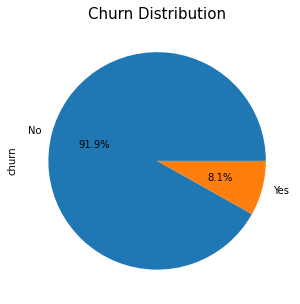

In [66]:
# Checking the Churn and Not Churn Percentage
print('No Churn: 0\nChurn   : 1\n')
print((high_val['churn'].value_counts()/len(high_val))*100)

#Plotting pie Chart
plt.figure(figsize=(5,5))
plt.title('Churn Distribution', size=15)
((high_val['churn'].value_counts()/len(high_val))*100).plot(kind='pie',labels=['No','Yes'],autopct='%.1f%%')
plt.show()

#### Dropping Churn phase columns after label derivation 

In [67]:
# Removing all columns used to create Churn and No Churn (churn_phase_usage_cols was created in line 62)

high_val.drop(churn_phase_usage_cols, 1, inplace=True)

In [68]:
# Dropping all the columns representing month 9

month_9_cols = high_val.columns[high_val.columns.str.contains('_9')]
print(month_9_cols)
high_val.drop(month_9_cols, 1, inplace=True)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')


In [69]:
# Current dimention of the dataset
high_val.shape

(30001, 148)

In [70]:
high_val.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 148 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2

#### 2.6: Dummy Variable Creation

In [71]:
# Creating Dummies for Categorical features

dummy1 = pd.get_dummies(high_val[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
                                  'fb_user_8']], drop_first = True)
high_val = pd.concat([high_val, dummy1], axis = 1)

In [72]:
high_val = high_val.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
                         axis = 1)

In [73]:
high_val.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803  NaN          NaN           0.00          
7   1069.180  1349.850  3171.480  57.84        54.68        52.29         
8   378.721   492.223   137.362   413.69       351.03       35.08         
21  514.453   597.753   637.760   102.41       132.11       85.14         
23  74.350    193.897   366.966   48.96        50.66        33.58         

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0  NaN           NaN            0.00         NaN            NaN              
7   453.43        567.16        325.91        16.23          33.49           
8   94.66         80.63         136.48        0.00           0.00            
21  757.93        896.68        983.39        0.00           0.00            
23  85.41         89.36         205.89        0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00          NaN            NaN             0.00            
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00             NaN               NaN                0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  NaN           NaN            0.00         NaN                 
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00             NaN               NaN                0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99            0.00              0.00              0.00               
23  39.61             0.00

In [74]:
dummy1.head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0   1                     0                     1                      
7   0                     0                     0                      
8   0                     0                     1                      
21  0                     0                     0                      
23  0                     0                     1                      

    night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0   0                     1                     0                      
7   0                     0                     0                      
8   0                     1                     0                      
21  0                     0                     0                      
23  0                     1                     0                      

    fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  \
0   0              1              0              1              0               
7   0              0              0              0              0               
8   0              0              0              1              0               
21  0              0              0              0              0               
23  0              0              0              1              0               

    fb_user_8_1.0  
0   1              
7   0              
8   1              
21  0              
23  1

#### 2.7: Rows with more than 55% of Data missing

In [75]:
# Sum it up to check how many rows have all missing values
print('All Null Values:', high_val.isnull().all(axis=1).sum())

# Drop rows with 55% missing data
high_val = high_val[(high_val.isnull().sum(axis=1)/high_val.shape[1])*100 < 55]

print('Count of Records after Row,Column deletion:',high_val.shape)

All Null Values: 0
Count of Records after Row,Column deletion: (30001, 154)


In [76]:
high_val.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803  NaN          NaN           0.00          
7   1069.180  1349.850  3171.480  57.84        54.68        52.29         
8   378.721   492.223   137.362   413.69       351.03       35.08         
21  514.453   597.753   637.760   102.41       132.11       85.14         
23  74.350    193.897   366.966   48.96        50.66        33.58         

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0  NaN           NaN            0.00         NaN            NaN              
7   453.43        567.16        325.91        16.23          33.49           
8   94.66         80.63         136.48        0.00           0.00            
21  757.93        896.68        983.39        0.00           0.00            
23  85.41         89.36         205.89        0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00          NaN            NaN             0.00            
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00             NaN               NaN                0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  NaN           NaN            0.00         NaN                 
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00             NaN               NaN                0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99            0.00              0.00              0.00               
23  39.61             0.00

In [77]:
high_val.shape

(30001, 154)

# Step 3: Visualizing data using plots

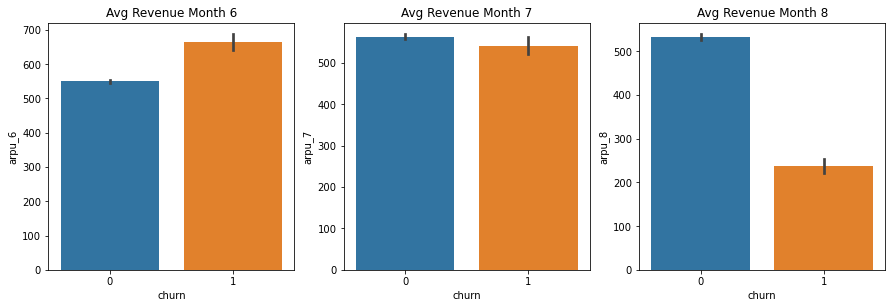

In [78]:
# Visualising Average Revenue per user

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Avg Revenue Month 6')
sns.barplot(x = 'churn', y='arpu_6', data=high_val)

plt.subplot(2,3,2)
plt.title('Avg Revenue Month 7')
sns.barplot(x = 'churn', y='arpu_7', data=high_val)

plt.subplot(2,3,3)
plt.title('Avg Revenue Month 8')
sns.barplot(x = 'churn', y='arpu_8', data=high_val)

plt.show()

- Average Revenue per user metrric drop in month 8 indicate Churn

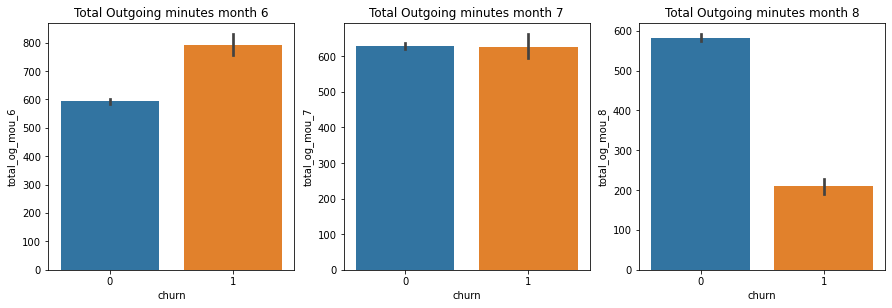

In [79]:
# Visualising Outgoing minutes of usage

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Total Outgoing minutes month 6')
sns.barplot(x = 'churn', y='total_og_mou_6', data=high_val)

plt.subplot(2,3,2)
plt.title('Total Outgoing minutes month 7')
sns.barplot(x = 'churn', y='total_og_mou_7', data=high_val)

plt.subplot(2,3,3)
plt.title('Total Outgoing minutes month 8')
sns.barplot(x = 'churn', y='total_og_mou_8', data=high_val)

plt.show()

- The Total Outgoing minutes drop in month 8 indicates Churn

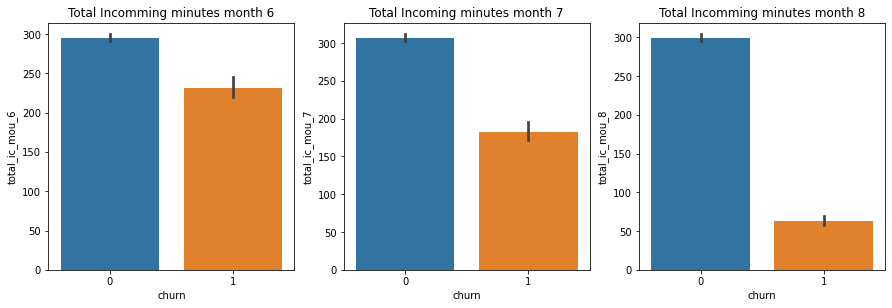

In [80]:
# Visualising incoming minutes of usage
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)

sns.barplot(x='churn', y='total_ic_mou_6', data = high_val)
plt.title('Total Incomming minutes month 6')

plt.subplot(2,3,2)
sns.barplot(x='churn', y='total_ic_mou_7', data =high_val)
plt.title('Total Incoming minutes month 7')

plt.subplot(2,3,3)
sns.barplot(x='churn', y='total_ic_mou_8', data = high_val)
plt.title('Total Incomming minutes month 8')

plt.show()

- The total incoming minutes drop in month 8 indicate Churn

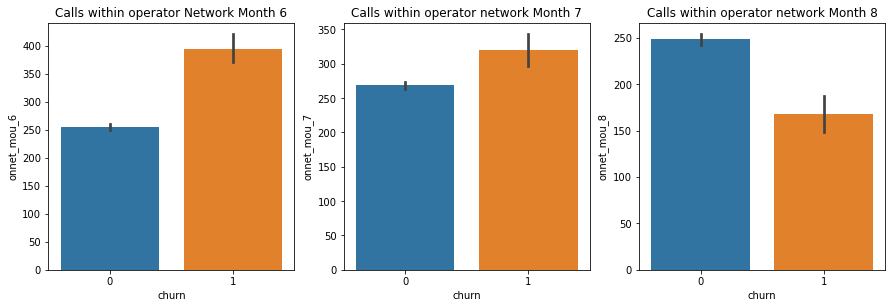

In [81]:
# Visualising All kind of calls within the same operator network

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Calls within operator Network Month 6')
sns.barplot(x='churn', y='onnet_mou_6', data=high_val)

plt.subplot(2,3,2)
plt.title('Calls within operator network Month 7')
sns.barplot(x='churn', y='onnet_mou_7', data=high_val)

plt.subplot(2,3,3)
plt.title('Calls within operator network Month 8')
sns.barplot(x='churn', y='onnet_mou_8', data=high_val)

plt.show()

- All kind of calls within the same operator network drop in month 8 indicate Churn

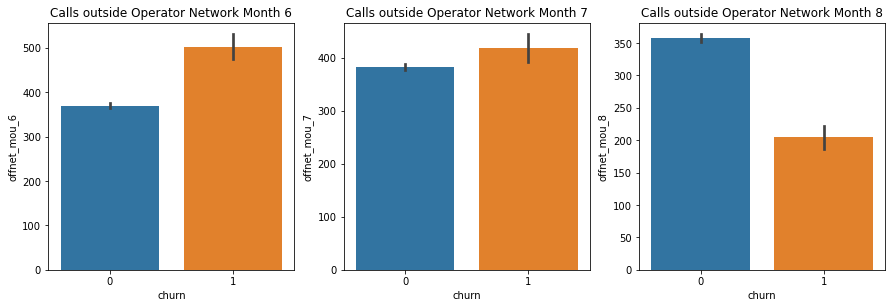

In [82]:
# Visualising All kind of Calls Outside the Operator Network

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Calls outside Operator Network Month 6')
sns.barplot(x='churn', y='offnet_mou_6', data= high_val)

plt.subplot(2,3,2)
plt.title('Calls outside Operator Network Month 7')
sns.barplot(x='churn', y='offnet_mou_7', data = high_val)

plt.subplot(2,3,3)
plt.title('Calls outside Operator Network Month 8')
sns.barplot(x='churn', y='offnet_mou_8', data=high_val)

plt.show()


- Calls outside operator network drop in month 8 indicate churn

### Now extracting the following columns separately to plot and observe the correlation between variables:
- rech_data
- amt_data
- ic_mou_data
- og_mou_data
- net_mou_data
- data2g
- data3g

In [83]:
# Extracting different metrices

rech_data = high_val.loc[:,high_val.columns.str.contains('rech')]

tot_data = high_val.loc[:,high_val.columns.str.contains('tot')]

amt_data = high_val.loc[:,high_val.columns.str.contains('amt')]

ic_mou_data = high_val.loc[:,high_val.columns.str.contains('ic') & high_val.columns.str.contains('mou')]

og_mou_data = high_val.loc[:,high_val.columns.str.contains('og') & high_val.columns.str.contains('mou')]

net_mou_data= high_val.loc[:,high_val.columns.str.contains('net_mou')]

data2g = high_val.loc[:,high_val.columns.str.contains('2g')]

data3g = high_val.loc[:,high_val.columns.str.contains('3g')]

In [84]:
# Checking dimension of rech_data
rech_data.shape

(30001, 19)

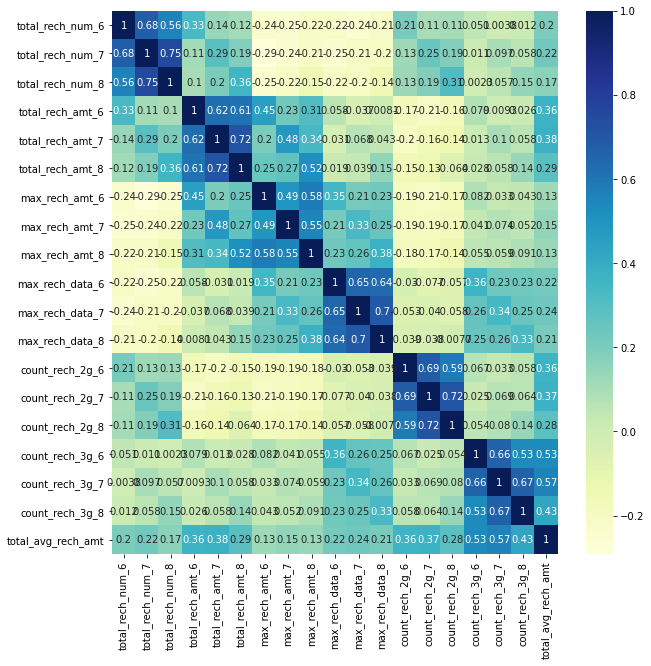

In [85]:
# Plotting Correlation Matrix

plt.figure(figsize=(10,10))
sns.heatmap(rech_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### ***Observations***
- High correlation between Average Recharge amount and Recharge amount for months 6 and 7
- There is high correlation between data recharge for month 7 and recharge for month 8 ( 75%)
- Any factor that is correlated with month 8 is probably correlated to the Churn prediction

In [86]:
# Checking dimension of tot_data
tot_data.shape

(30001, 13)

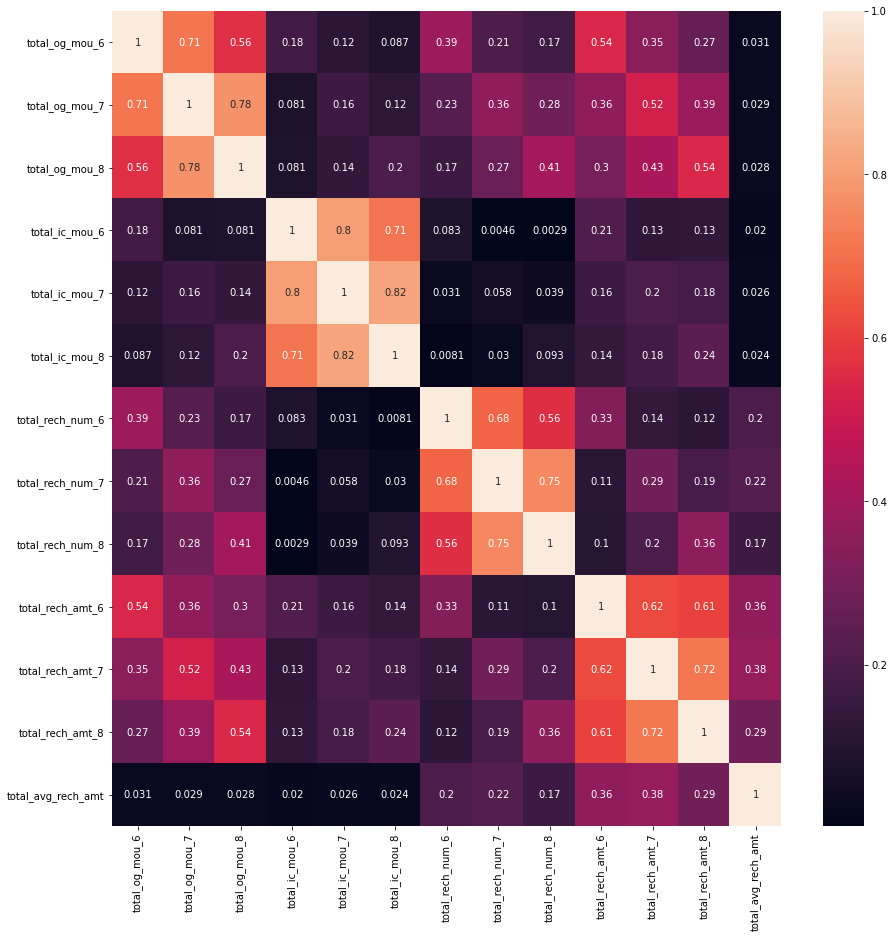

In [87]:
# Plotting Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(tot_data.corr(), annot=True)
plt.show()

#### ***Obsevations***
- There is a very high correlation between Incoming(82%) and Outgoing Minutes(77%) of Usage of months 7 and month 8
- Customer will NOT Chrun if there is heavy usage

In [88]:
# Checking dimention of rech_amt
amt_data.shape

(30001, 10)

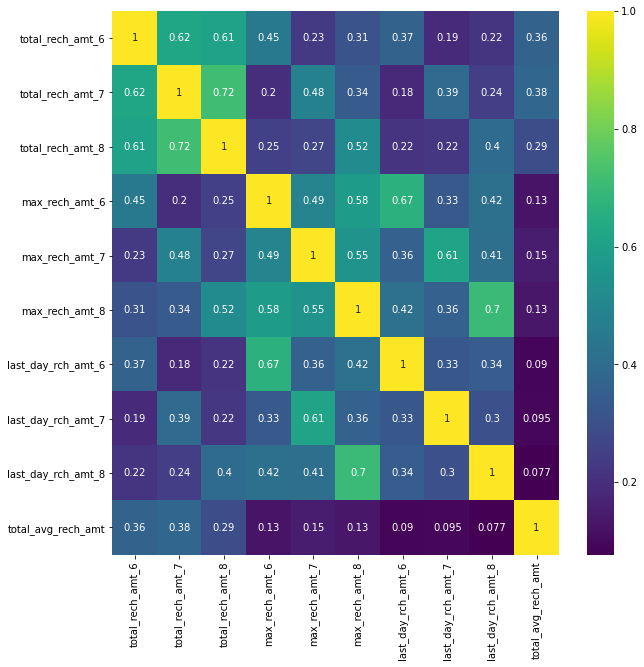

In [89]:
# Plotting Correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(amt_data.corr(),annot=True, cmap='viridis')
plt.show()

#### ***Obsevations***
- There is high correlation of 72% between total recharge amount month 7 and month 8
- There is also high correlation of 70% between max recharge amount month 8 and last day recharge amount in month 8
- This indicates that if customer is not going to Churn, ther recharge for higher amount in month 8

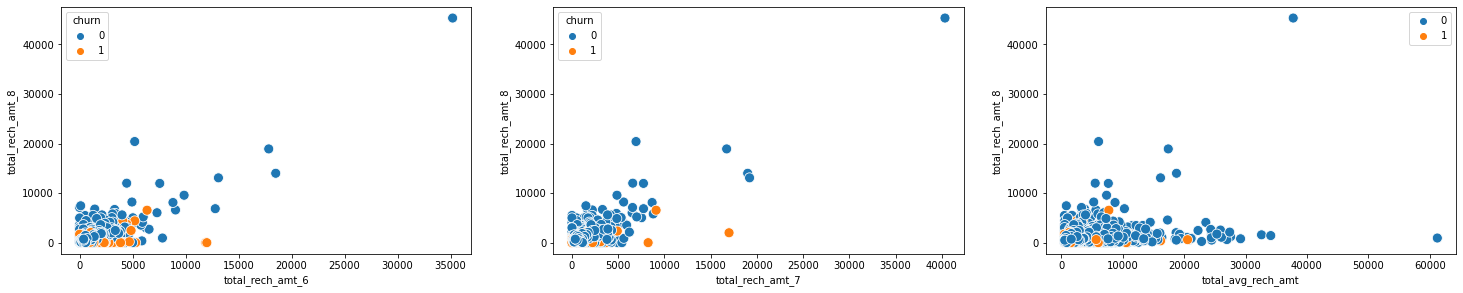

In [90]:
# Creating Scatter plot to understand the distribution of amounts with month 8

plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.scatterplot(x= 'total_rech_amt_6', y='total_rech_amt_8', data=high_val,hue='churn',s=100)

plt.subplot(2,3,2)
sns.scatterplot(x= 'total_rech_amt_7', y='total_rech_amt_8', data=high_val, hue='churn',s=100)

plt.subplot(2,3,3)
sns.scatterplot(x= 'total_avg_rech_amt', y='total_rech_amt_8', data=high_val, hue='churn',s=100)

plt.subplots_adjust(wspace=.2)
plt.legend()
plt.show()

In [91]:
# Checking dimensions of incoming minutes of usage ic_mou

ic_mou_data.shape

(30001, 36)

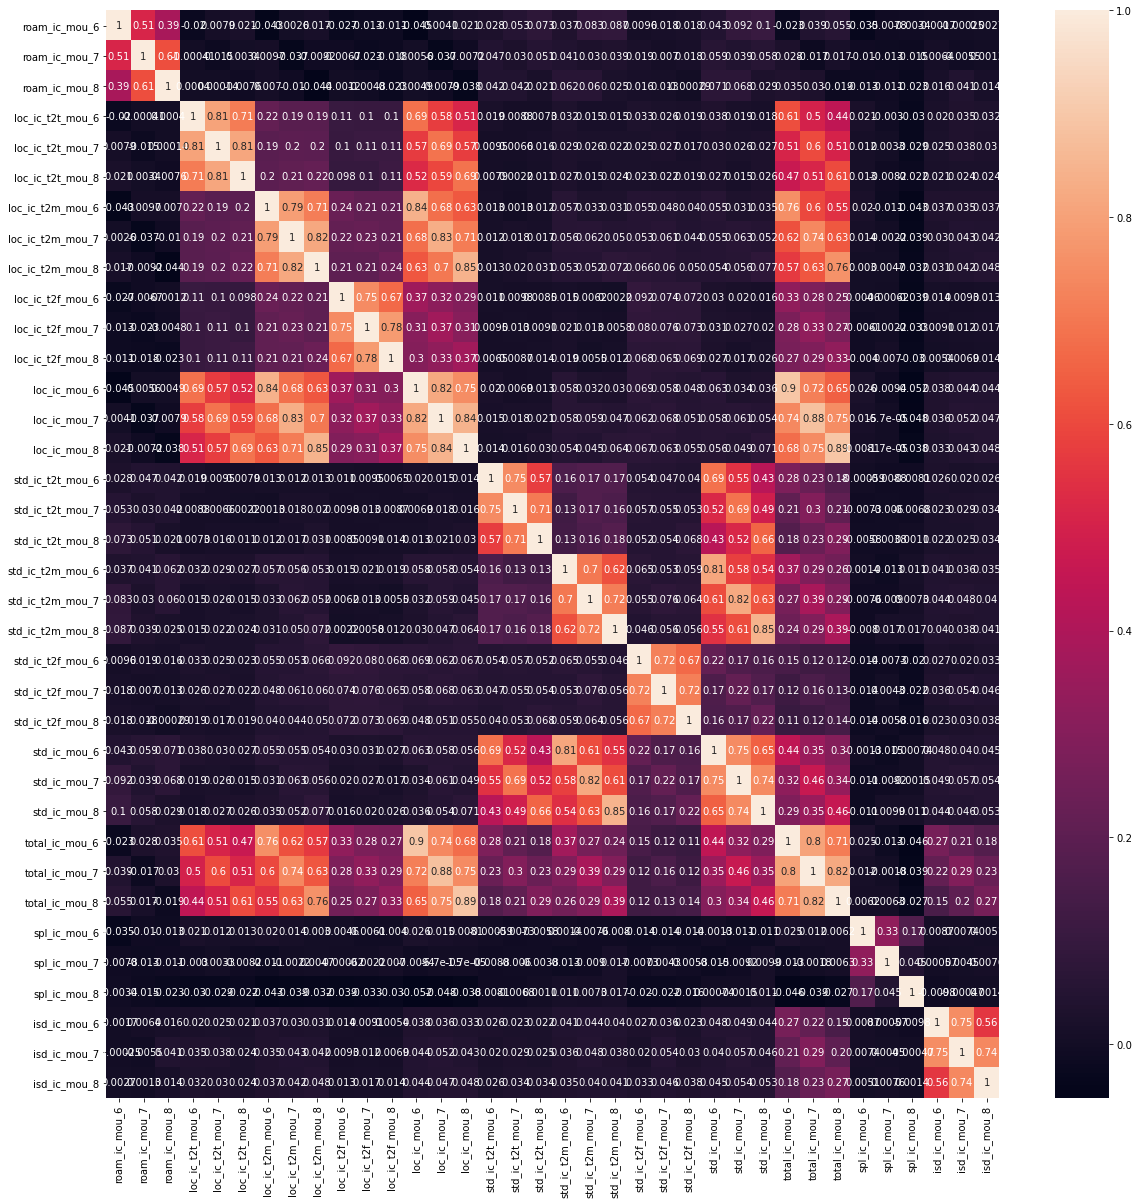

In [92]:
# Plotting Correlation Matrix

plt.figure(figsize=(20,20))
sns.heatmap(ic_mou_data.corr(), annot=True)
plt.show()

#### ***Obsevations***
- There is very high correlation between the following variables/ features:
- 1.) total_ic_mou_6 & loc_ic_mou_6
- 2.) total_ic_mou_7 & loc_ic_mou_7
- 3.) total_ic_mou_8 & loc_ic_mou_8
- 4.) std_ic_mou_6 & std_ic_t2f_mou_6
- 5.) std_ic_mou_7 & std_ic_t2f_mou_7
- 6.) std_ic_mou_8 & std_ic_t2f_mou_8

- Thus, we will be dropping the following highly correlated variables/ features:
- 1.) loc_ic_mou_6
- 2.) loc_ic_mou_7
- 3.) loc_ic_mou_8
- 4.) std_ic_t2f_mou_6
- 5.) std_ic_t2f_mou_7
- 6.) std_ic_t2f_mou_8

In [93]:
high_val.shape

(30001, 154)

In [94]:
high_val = high_val.drop(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
                          'std_ic_t2f_mou_8'], axis = 1)

In [95]:
high_val.shape

(30001, 148)

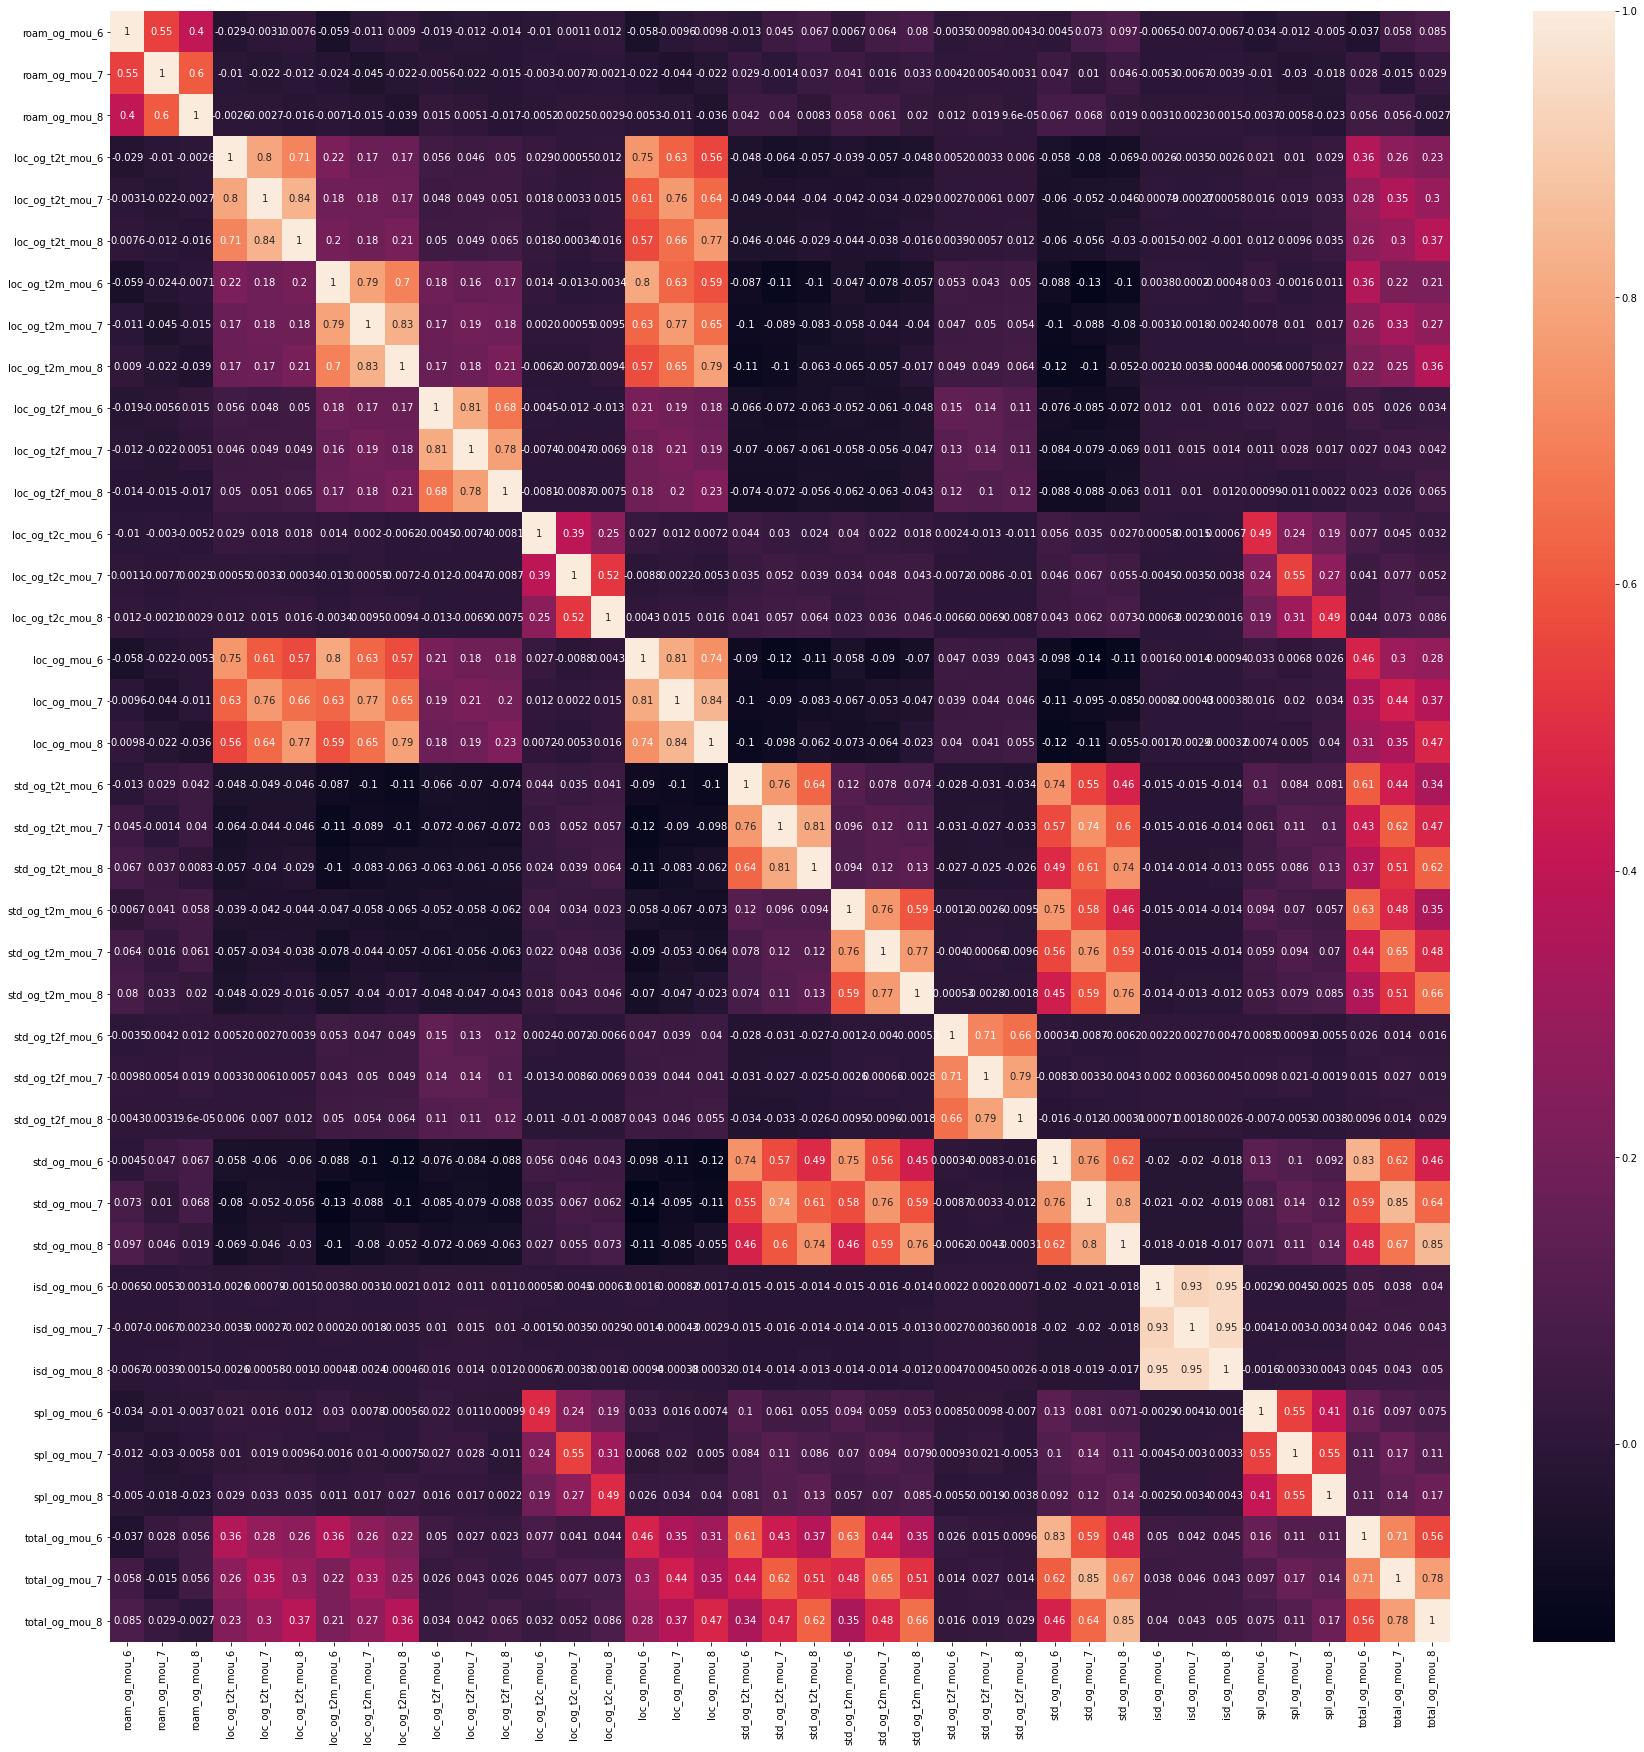

In [96]:
# Plotting Correlation Matrix for Outgoing minutes of Usage (og_mou):
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True)
plt.show()

#### ***Obsevations***
- There is very high correlation between the following variables/ features:
- 1.) isd_og_mou_7 & isd_og_mou_6
- 2.) isd_og_mou_8 & isd_og_mou_6
- 3.) isd_og_mou_8 & isd_og_mou_7
- 4.) total_og_mou_6 & std_og_mou_6
- 5.) total_og_mou_7 & std_og_mou_7
- 6.) total_og_mou_8 & std_og_mou_8


- Thus, we would be dropping the following variables/ features:
- 1.) isd_og_mou_6
- 2.) isd_og_mou_8

In [97]:
high_val = high_val.drop(['isd_og_mou_6', 'isd_og_mou_8'], axis = 1)

In [98]:
high_val.shape

(30001, 146)

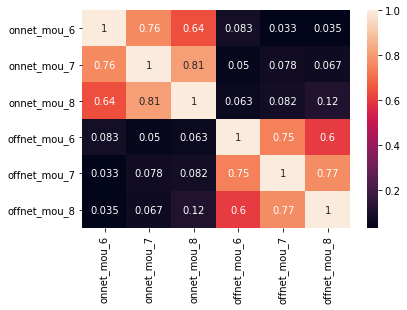

In [99]:
# Plotting the heatmap for Internet usage (net_mou):
sns.heatmap(net_mou_data.corr(), annot=True)
plt.show()

#### ***Observation***
- No correlation between ***onnet*** and ***offnet*** minutes of usage
- High correlation between month 7 and 8 of both ***onnet*** and ***offnet*** usage

In [100]:
data2g.shape

(30001, 15)

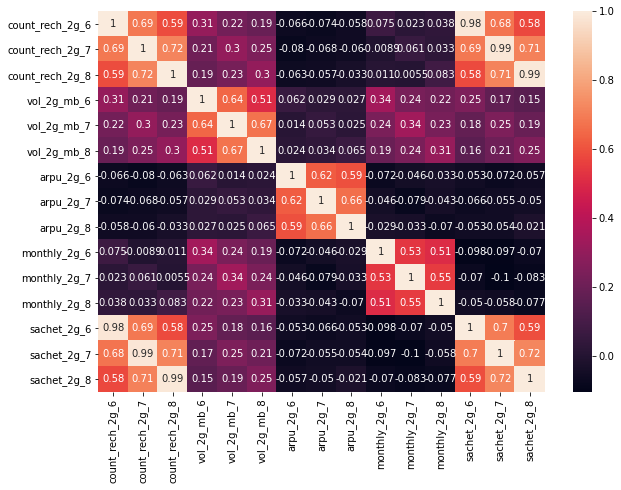

In [101]:
plt.figure(figsize=(10,7))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

### ***Obsevation***
- High correlation between recharge sachets of month 7 and 8

In [102]:
data3g.shape

(30001, 19)

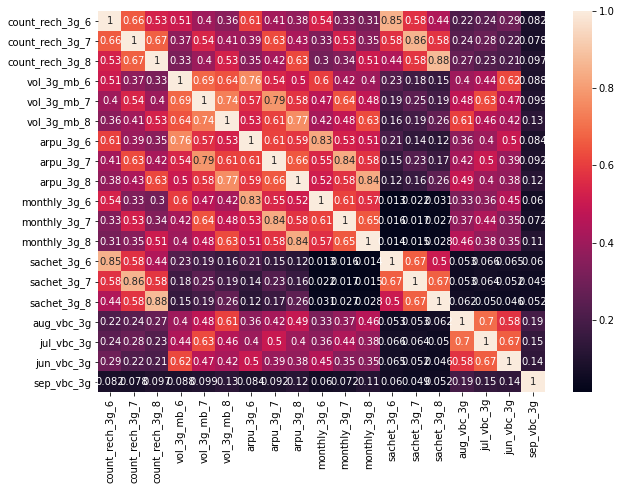

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(data3g.corr(),annot=True)
plt.show()

### ***Obsevation***
- correlation between 3g volume of month 7 and 8

# Step 4: Data Preparation

#### 4.1: Dropping unnecessary Columns (months 6 and 7)

In [104]:
col_list_to_drop = high_val.filter(regex='_6|_7')
high_val.drop(col_list_to_drop, axis=1, inplace=True)
high_val.shape

(30001, 53)

In [105]:
high_val.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0   213.803   0.00         0.00          0.00           0.00            
7   3171.480  52.29        325.91        31.64          38.06           
8   137.362   35.08        136.48        0.00           0.00            
21  637.760   85.14        983.39        0.00           0.00            
23  366.966   33.58        205.89        0.00           0.00            

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0   0.00              0.00              0.00              0.00               
7   40.28             162.28            53.23             0.00               
8   12.49             50.54             0.00              7.15               
21  23.34             104.81            1.58              0.00               
23  33.58             148.56            0.00              17.71              

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0   0.00          0.00              0.00              0.00               
7   255.79        12.01             49.14             16.68              
8   63.04         22.58             75.69             0.00               
21  129.74        61.79             876.99            0.00               
23  182.14        0.00              39.61             0.00               

    std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0   0.00          0.00          0.0          0.00            0.16               
7   77.84         6.50          0.0          350.16          27.31              
8   98.28         10.23         0.0          171.56          0.31               
21  938.79        0.00          0.0          1068.54         19.54              
23  39.61         17.71         0.0          239.48          76.64              

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0   4.13              1.15              0.00              0.00               
7   121.19            39.53             30.39             141.33             
8   15.48             0.00              0.10              0.65               
21  129.16            10.39             0.18              101.74             
23  146.84            0.71              13.38             43.91              

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0   0.00          5.44            0.0           0.00          0.00          
7   193.94        428.74          0.0           31.59         15.14         
8   0.75          16.54           0.0           0.00          0.00          
21  101.93        261.04          0.0           0.00          0.00          
23  57.29         298.33          0.0           3.74          13.06         

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0   2                 252               252             252                  
7   7                 3638              1580            779                  
8   14                120               30              10                   
21  27                718               50              50                   
23  4                 439               179             0                    

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0   252.0            0.0              1.0              5.75          
7   0.0              0.0              0.0              0.00          
8   23.0             3.0              0.0              0.03          
21  0.0              0.0              0.0              0.00          
23  179.0            0.0              2.0              0.01          

    vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  \
0   109.61       212.17     212.17     0             0             
7   0.00         0.00       0.00       0             0             
8   11.94        19.83      0.00       0             3             
21  0.00         0.00       0.00       0             0             
23  

In [106]:
high_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   arpu_8                30001 non-null  float64
 1   onnet_mou_8           28827 non-null  float64
 2   offnet_mou_8          28827 non-null  float64
 3   roam_ic_mou_8         28827 non-null  float64
 4   roam_og_mou_8         28827 non-null  float64
 5   loc_og_t2t_mou_8      28827 non-null  float64
 6   loc_og_t2m_mou_8      28827 non-null  float64
 7   loc_og_t2f_mou_8      28827 non-null  float64
 8   loc_og_t2c_mou_8      28827 non-null  float64
 9   loc_og_mou_8          28827 non-null  float64
 10  std_og_t2t_mou_8      28827 non-null  float64
 11  std_og_t2m_mou_8      28827 non-null  float64
 12  std_og_t2f_mou_8      28827 non-null  float64
 13  std_og_mou_8          28827 non-null  float64
 14  spl_og_mou_8          28827 non-null  float64
 15  og_others_8        

In [107]:
# Checking missing values remaining in the data frame 'high_val':
(((high_val.isnull().sum()/high_val.shape[0])*100).round(2)).sort_values(ascending=False)

ic_others_8             3.91
std_og_mou_8            3.91
onnet_mou_8             3.91
isd_ic_mou_8            3.91
spl_ic_mou_8            3.91
std_ic_mou_8            3.91
std_ic_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
loc_ic_t2m_mou_8        3.91
loc_ic_t2t_mou_8        3.91
og_others_8             3.91
spl_og_mou_8            3.91
loc_ic_t2f_mou_8        3.91
std_og_t2f_mou_8        3.91
loc_og_t2f_mou_8        3.91
offnet_mou_8            3.91
std_og_t2m_mou_8        3.91
roam_og_mou_8           3.91
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_8        3.91
roam_ic_mou_8           3.91
loc_og_mou_8            3.91
std_og_t2t_mou_8        3.91
loc_og_t2c_mou_8        3.91
monthly_2g_8            0.00
jun_vbc_3g              0.00
monthly_3g_8            0.00
sachet_3g_8             0.00
aon                     0.00
aug_vbc_3g              0.00
jul_vbc_3g              0.00
total_avg_rech_amt      0.00
sep_vbc_3g              0.00
churn                   0.00
night_pck_user

All the remaining missing values will be treated using KNN imputation in the next section

#### 4.2: KNN Imputation

In [108]:
from sklearn.impute import KNNImputer

knn= KNNImputer(n_neighbors=3)
high_val_knn = pd.DataFrame(knn.fit_transform(high_val),columns=high_val.columns)
high_val_knn.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  213.803   0.00         0.00          0.00           0.00            
1  3171.480  52.29        325.91        31.64          38.06           
2  137.362   35.08        136.48        0.00           0.00            
3  637.760   85.14        983.39        0.00           0.00            
4  366.966   33.58        205.89        0.00           0.00            

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0  0.00              0.00              0.00              0.00               
1  40.28             162.28            53.23             0.00               
2  12.49             50.54             0.00              7.15               
3  23.34             104.81            1.58              0.00               
4  33.58             148.56            0.00              17.71              

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0  0.00          0.00              0.00              0.00               
1  255.79        12.01             49.14             16.68              
2  63.04         22.58             75.69             0.00               
3  129.74        61.79             876.99            0.00               
4  182.14        0.00              39.61             0.00               

   std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0  0.00          0.00          0.0          0.00            0.16               
1  77.84         6.50          0.0          350.16          27.31              
2  98.28         10.23         0.0          171.56          0.31               
3  938.79        0.00          0.0          1068.54         19.54              
4  39.61         17.71         0.0          239.48          76.64              

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0  4.13              1.15              0.00              0.00               
1  121.19            39.53             30.39             141.33             
2  15.48             0.00              0.10              0.65               
3  129.16            10.39             0.18              101.74             
4  146.84            0.71              13.38             43.91              

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0  0.00          5.44            0.0           0.00          0.00          
1  193.94        428.74          0.0           31.59         15.14         
2  0.75          16.54           0.0           0.00          0.00          
3  101.93        261.04          0.0           0.00          0.00          
4  57.29         298.33          0.0           3.74          13.06         

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0  2.0               252.0             252.0           252.0                
1  7.0               3638.0            1580.0          779.0                
2  14.0              120.0             30.0            10.0                 
3  27.0              718.0             50.0            50.0                 
4  4.0               439.0             179.0           0.0                  

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0  252.0            0.0              1.0              5.75          
1  0.0              0.0              0.0              0.00          
2  23.0             3.0              0.0              0.03          
3  0.0              0.0              0.0              0.00          
4  179.0            0.0              2.0              0.01          

   vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0  109.61       212.17     212.17     0.0           0.0          1.0            
1  0.00         0.00       0.00       0.0           0.0          0.0            
2  11.94        19.83      0.00       0.0           3.0          0.0            
3  0.00         0.00       0.00       0.0           0.0          0.

In [109]:
# Checking null values after imputation

high_val_knn.isnull().sum().sum()

0

The data frame 'high_val_knn' does not have any missing value left in any variable/ feature/ column.

#### 4.3: Outlier Treatment

In [110]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
high_val_knn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000    
mean   508.597957    234.411892    335.793726    12.738159      20.096845       
std    501.961981    458.323072    481.639960    74.202820      104.781894      
min   -945.808000    0.000000      0.000000      0.000000       0.000000        
25%    231.473000    11.240000     48.430000     0.000000       0.000000        
50%    427.585000    65.930000     183.040000    0.000000       0.000000        
75%    661.491000    240.060000    438.930000    0.000000       0.000000        
90%    977.345000    665.080000    823.680000    16.160000      30.040000       
95%    1255.019000   1074.590000   1167.540000   56.980000      101.360000      
99%    1986.622000   2159.110000   2193.130000   282.190000     427.110000      
max    33543.624000  10752.560000  14007.340000  4169.810000    5337.040000     

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count  30001.00000       30001.000000      30001.000000      30001.000000       
mean   78.20489          152.090798        5.910041          1.726028           
std    227.33734         233.478346        19.507226         7.209799           
min    0.00000           0.000000          0.000000          0.000000           
25%    2.93000           14.180000         0.000000          0.000000           
50%    20.88000          68.010000         0.000000          0.000000           
75%    72.09000          196.960000        3.960000          0.116667           
90%    178.84000         398.510000        15.210000         4.650000           
95%    298.78000         574.760000        28.390000         9.400000           
99%    913.33000         1088.310000       82.240000         28.210000          
max    10752.56000       4961.330000       928.490000        351.830000         

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000  30001.000000      30001.000000      30001.000000       
mean   236.213660    148.534453        157.504834        1.589810           
std    363.101623    397.549440        409.058702        10.933237          
min    0.000000      0.000000          0.000000          0.000000           
25%    23.910000     0.000000          0.000000          0.000000           
50%    111.160000    0.900000          9.890000          0.000000           
75%    310.610000    78.240000         117.830000        0.000000           
90%    607.830000    475.610000        464.890000        1.310000           
95%    859.780000    887.460000        842.830000        5.976667           
99%    1662.810000   1912.830000       1893.710000       35.190000          
max    11039.910000  8014.430000       13950.040000      516.910000         

       std_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000     
mean   307.632448    6.620498      0.057609      551.678812       
std    608.882285    20.306262     3.315125      700.478180       
min    0.000000      0.000000      0.000000      0.000000         
25%    0.000000      0.000000      0.000000      72.360000        
50%    26.180000     0.610000      0.000000      333.540000       
75%    357.330000    6.240000      0.000000      774.780000       
90%    1002.860000   17.640000     0.000000      1359.590000      
95%    1476.160000   29.310000     0.000000      1857.080000      
99%    2769.360000   70.830000     0.000000      3219.810000      
max    13980.060000  954.510000    394.930000    14043.060000     

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000       
mean   62.809507         146.839166        14.463471         13.964439          
std    158.849532        214.537935        43.300121         71.338348          
min    0.0000

We see that many columns have significantly high 'max' values as compared to the values at the 99th percentile. We would not drop these outliers as they might contain important information. Instead, we would transform the outliers using log.

In [111]:
# Creating list of numeric columns of the data frame 'high_val_knn':
all_cols = high_val_knn.columns
num_cols = all_cols[0:50]

In [112]:
num_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8',
       'arpu_2g_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_avg_rech_amt', 'churn', 'night_pck_user_8_0.0'],
      dtype='object')

In [113]:
def outlier_convert(dataframe):
    conditional_transform = []
    for value in dataframe:
        if value <= 0:
            conditional_transform.append(float(0))
        elif float(value) == float(1.0):
            conditional_transform.append(float(1.5))
        else:
            conditional_transform.append(float(np.log1p(value)))
    return conditional_transform

In [114]:
high_val_knn[num_cols] = high_val_knn[num_cols].apply(outlier_convert)

In [115]:
high_val_knn.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  5.369721  0.000000     0.000000      0.000000       0.000000        
1  8.062269  3.975749     5.789685      3.485539       3.665099        
2  4.929873  3.585739     4.923478      0.000000       0.000000        
3  6.459529  4.455974     6.892022      0.000000       0.000000        
4  5.907991  3.543275     5.332187      0.000000       0.000000        

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0  0.000000          0.000000          0.000000          0.000000           
1  3.720378          5.095467          3.993234          0.000000           
2  2.601949          3.942358          0.000000          2.098018           
3  3.192121          4.661645          0.947789          0.000000           
4  3.543275          5.007698          0.000000          2.929058           

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0  0.000000      0.000000          0.000000          0.000000           
1  5.548259      2.565718          3.914819          2.872434           
2  4.159508      3.160399          4.339771          0.000000           
3  4.873211      4.139796          6.777635          0.000000           
4  5.210251      0.000000          3.704014          0.000000           

   std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0  0.000000      0.000000      0.0          0.000000        0.148420           
1  4.367420      2.014903      0.0          5.861242        3.343215           
2  4.597944      2.418589      0.0          5.150745        0.270027           
3  6.845656      0.000000      0.0          6.974984        3.022374           
4  3.704014      2.929058      0.0          5.482637        4.352083           

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0  1.635106          0.765468          0.000000          0.000000           
1  4.805577          3.702042          3.446489          4.958148           
2  2.802148          0.000000          0.095310          0.500775           
3  4.868764          2.432736          0.165514          4.632202           
4  4.996131          0.536493          2.665838          3.804660           

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0  0.000000      1.862529        0.0           0.000000      0.000000      
1  5.272692      6.063180        0.0           3.484005      2.781301      
2  0.559616      2.864484        0.0           0.000000      0.000000      
3  4.634049      5.568497        0.0           0.000000      0.000000      
4  4.065431      5.701547        0.0           1.556037      2.643334      

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0  1.098612          5.533389          5.533389        5.533389             
1  2.079442          8.199464          7.365813        6.659294             
2  2.708050          4.795791          3.433987        2.397895             
3  3.332205          6.577861          3.931826        3.931826             
4  1.609438          6.086775          5.192957        0.000000             

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0  5.533389         0.000000         1.500000         1.909543      
1  0.000000         0.000000         0.000000         0.000000      
2  3.178054         1.386294         0.000000         0.029559      
3  0.000000         0.000000         0.000000         0.000000      
4  5.192957         0.000000         1.098612         0.009950      

   vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0  4.706011     5.362090   5.362090   0.0           0.000000     1.5            
1  0.000000     0.000000   0.000000   0.0           0.000000     0.0            
2  2.560323     3.036394   0.000000   0.0           1.386294     0.0            
3  0.000000     0.000000   0.000000   0.0           0.000000     0.

In [116]:
high_val_knn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000    
mean   5.702894      3.903432      4.767766      0.586952       0.673584        
std    1.494388      2.107051      1.868308      1.366571       1.542952        
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    5.448774      2.504709      3.900558      0.000000       0.000000        
50%    6.060489      4.203647      5.215153      0.000000       0.000000        
75%    6.496007      5.485046      6.086616      0.000000       0.000000        
90%    6.885862      6.501410      6.714995      2.842581       3.435277        
95%    7.135702      6.980625      7.063510      4.060098       4.628496        
99%    7.594694      7.677914      7.693541      5.646118       6.059380        
max    10.420632     9.282992      9.547408      8.335866       8.582614        

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000       
mean   2.880994          3.822252          0.878549          0.386083           
std    1.869345          1.936035          1.204768          0.818187           
min    0.000000          0.000000          0.000000          0.000000           
25%    1.368639          2.719979          0.000000          0.000000           
50%    3.085573          4.234251          0.000000          0.000000           
75%    4.291692          5.288065          1.601406          0.110348           
90%    5.192068          5.990239          2.785628          1.731656           
95%    5.703049          6.355691          3.380654          2.341806           
99%    6.818192          6.993300          4.421728          3.374511           
max    9.282992          8.509631          6.834636          5.865986           

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000  30001.000000      30001.000000      30001.000000       
mean   4.239649      2.150116          2.627703          0.235277           
std    2.018974      2.522242          2.459348          0.721795           
min    0.000000      0.000000          0.000000          0.000000           
25%    3.215269      0.000000          0.000000          0.000000           
50%    4.719926      0.641854          2.387845          0.000000           
75%    5.741752      4.372481          4.777694          0.000000           
90%    6.411539      6.166699          6.143950          0.858662           
95%    6.757839      6.789490          6.737951          1.942571           
99%    7.416865      7.556862          7.546821          3.588783           
max    9.309363      8.989124          9.543309          6.249801           

       std_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000     
mean   3.278516      1.047902      0.006659      5.095246         
std    2.729367      1.239725      0.122869      2.236478         
min    0.000000      0.000000      0.000000      0.000000         
25%    0.000000      0.000000      0.000000      4.295379         
50%    3.302481      0.476234      0.000000      5.812756         
75%    5.881454      1.979621      0.000000      6.653869         
90%    6.911608      2.925310      0.000000      7.215674         
95%    7.297877      3.411478      0.000000      7.527299         
99%    7.926733      4.274302      0.000000      8.077388         
max    9.545459      6.862245      5.981237      9.549955         

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000       
mean   2.971489          4.075327          1.426655          1.118567           
std    1.663943          1.656088          1.478013          1.467377           
min    0.0000

In [117]:
# We can now observe that the difference between the values at the 99th percentile and 100th percentile is not significantly
# high

In [118]:
high_val_knn.shape

(30001, 53)

#### 4.4: Scaling Data

In [119]:
# Performing MinMax Scaling on the numerical columns of the data frame 'high_val_knn':
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
high_val_knn[num_cols] = scaler.fit_transform(high_val_knn[num_cols])

In [120]:
high_val_knn.shape

(30001, 53)

In [121]:
high_val_knn.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.515297  0.000000     0.000000      0.000000       0.000000        
1  0.773683  0.428283     0.606414      0.418138       0.427038        
2  0.473088  0.386270     0.515687      0.000000       0.000000        
3  0.619879  0.480015     0.721874      0.000000       0.000000        
4  0.566951  0.381695     0.558496      0.000000       0.000000        

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0  0.000000          0.000000          0.000000          0.000000           
1  0.400774          0.598788          0.584264          0.000000           
2  0.280292          0.463282          0.000000          0.357658           
3  0.343868          0.547808          0.138674          0.000000           
4  0.381695          0.588474          0.000000          0.499329           

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0  0.000000      0.000000          0.000000          0.000000           
1  0.595987      0.285425          0.410216          0.459604           
2  0.446809      0.351580          0.454745          0.000000           
3  0.523474      0.460534          0.710198          0.000000           
4  0.559679      0.000000          0.388127          0.000000           

   std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0  0.000000      0.000000      0.0          0.000000        0.017892           
1  0.457539      0.293622      0.0          0.613746        0.403035           
2  0.481689      0.352449      0.0          0.539348        0.032553           
3  0.717164      0.000000      0.0          0.730368        0.364357           
4  0.388039      0.426837      0.0          0.574101        0.524657           

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0  0.193654          0.103846          0.000000          0.000000           
1  0.569149          0.502231          0.411828          0.573936           
2  0.331873          0.000000          0.011389          0.057968           
3  0.576633          0.330033          0.019778          0.536206           
4  0.591718          0.072782          0.318546          0.440413           

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0  0.000000      0.213820        0.0           0.000000      0.000000      
1  0.606578      0.696059        0.0           0.427934      0.391783      
2  0.064379      0.328846        0.0           0.000000      0.000000      
3  0.533108      0.639269        0.0           0.000000      0.000000      
4  0.467693      0.654543        0.0           0.191125      0.372348      

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0  0.207944          0.516101          0.658685        0.658685             
1  0.393595          0.764767          0.876814        0.792711             
2  0.512577          0.447305          0.408776        0.285441             
3  0.630717          0.613519          0.468038        0.468038             
4  0.304633          0.567715          0.618161        0.000000             

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0  0.752855         0.000000         0.391784         0.204966      
1  0.000000         0.000000         0.000000         0.000000      
2  0.432396         0.364176         0.000000         0.003173      
3  0.000000         0.000000         0.000000         0.000000      
4  0.706537         0.000000         0.286946         0.001068      

   vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0  0.456443     0.652250   0.657814   0.0           0.000000     0.529434       
1  0.000000     0.000000   0.000000   0.0           0.000000     0.000000       
2  0.248329     0.369350   0.000000   0.0           0.364176     0.000000       
3  0.000000     0.000000   0.000000   0.0           0.000000     0.

In [122]:
high_val_knn.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000    
mean   0.547270      0.420493      0.499378      0.070413       0.078482        
std    0.143407      0.226980      0.195688      0.163939       0.179776        
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    0.522883      0.269817      0.408546      0.000000       0.000000        
50%    0.581586      0.452833      0.546238      0.000000       0.000000        
75%    0.623379      0.590870      0.637515      0.000000       0.000000        
max    1.000000      1.000000      1.000000      1.000000       1.000000        

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000       
mean   0.310352          0.449168          0.128544          0.065817           
std    0.201373          0.227511          0.176274          0.139480           
min    0.000000          0.000000          0.000000          0.000000           
25%    0.147435          0.319635          0.000000          0.000000           
50%    0.332390          0.497583          0.000000          0.000000           
75%    0.462318          0.621421          0.234307          0.018812           
max    1.000000          1.000000          1.000000          1.000000           

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000  30001.000000      30001.000000      30001.000000       
mean   0.455418      0.239191          0.275345          0.037646           
std    0.216876      0.280588          0.257704          0.115491           
min    0.000000      0.000000          0.000000          0.000000           
25%    0.345380      0.000000          0.000000          0.000000           
50%    0.507009      0.071403          0.250211          0.000000           
75%    0.616772      0.486419          0.500633          0.000000           
max    1.000000      1.000000          1.000000          1.000000           

       std_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000     
mean   0.343463      0.152705      0.001113      0.533536         
std    0.285934      0.180659      0.020542      0.234187         
min    0.000000      0.000000      0.000000      0.000000         
25%    0.000000      0.000000      0.000000      0.449780         
50%    0.345974      0.069399      0.000000      0.608668         
75%    0.616152      0.288480      0.000000      0.696744         
max    1.000000      1.000000      1.000000      1.000000         

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000       
mean   0.358222          0.482662          0.193545          0.133660           
std    0.200593          0.196139          0.200512          0.175340           
min    0.000000          0.000000          0.000000          0.000000           
25%    0.223971          0.388308          0.000000          0.000000           
50%    0.382318          0.520881          0.140165          0.021786           
75%    0.505240          0.619376          0.340018          0.250550           
max    1.000000          1.000000          1.000000          1.000000           

       std_ic_t2m_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
count  30001.000000      30001.000000  30001.000000    30001.000000   
mean   0.208819          0.264443      0.541372        0.011698       
std    0.195730          0.204376      0.208940        0.045659       
min    0.000000          0.000000      0.000000        0.000000       
25%    0.000000          0.054787      0.474464        0.000000       
50%    0.183727          0.271596      0.592337        0.000000       
75%    0.362600          0.4

In [123]:
# We can see that the min values of all the numeric columns are 0's and the max values of all the columns are 1's

In [124]:
#Checking the missing values in the dataset

((high_val_knn.isnull().sum()/high_val_knn.shape[0])*100).round(2).sort_values(ascending = False)

arpu_8                  0.0
total_rech_num_8        0.0
max_rech_amt_8          0.0
last_day_rch_amt_8      0.0
max_rech_data_8         0.0
count_rech_2g_8         0.0
count_rech_3g_8         0.0
vol_2g_mb_8             0.0
vol_3g_mb_8             0.0
arpu_3g_8               0.0
arpu_2g_8               0.0
monthly_2g_8            0.0
sachet_2g_8             0.0
monthly_3g_8            0.0
sachet_3g_8             0.0
aon                     0.0
aug_vbc_3g              0.0
jul_vbc_3g              0.0
jun_vbc_3g              0.0
sep_vbc_3g              0.0
total_avg_rech_amt      0.0
churn                   0.0
night_pck_user_8_0.0    0.0
night_pck_user_8_1.0    0.0
fb_user_8_0.0           0.0
total_rech_amt_8        0.0
ic_others_8             0.0
onnet_mou_8             0.0
isd_ic_mou_8            0.0
offnet_mou_8            0.0
roam_ic_mou_8           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_8    

In [125]:
high_val_knn.shape

(30001, 53)

#### 4.5: Creating a new variable to check Tenure

In [126]:
# creating new 'Tenure' variable using the variable 'aon'
# AON : Age on network - number of days the customer is using the operator T network

high_val['tenure'] = (high_val['aon']/30).round(0)

# Now dropping the variable 'aon' as we have a new variable derived from it
high_val.drop('aon',axis=1,inplace=True)

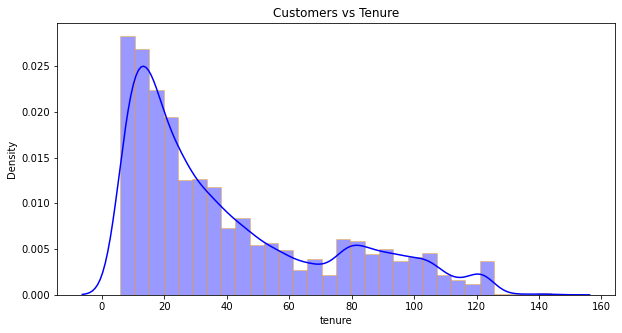

In [127]:
# Checking the distribution of the tenure variable
plt.figure(figsize=(10,5))
sns.distplot(high_val['tenure'], bins=30, hist=True,
            color='blue', hist_kws = {'edgecolor' : 'orange'})
plt.title('Customers vs Tenure')
plt.show()

In [128]:
# Creating the tenure range to analyse the Churn rate
# Binning
tenure_range = [0,6,12,24,60,61]
tenure_label = ['0-6 Months', '6-12 Months','1-2 Years', '2-5 Years','Above 5 Years']
high_val['tenure_range'] = pd.cut(high_val['tenure'], tenure_range, labels = tenure_label)
high_val['tenure_range'].head()

0     2-5 Years  
7     2-5 Years  
8     6-12 Months
21    1-2 Years  
23    1-2 Years  
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Years' < '2-5 Years' < 'Above 5 Years']

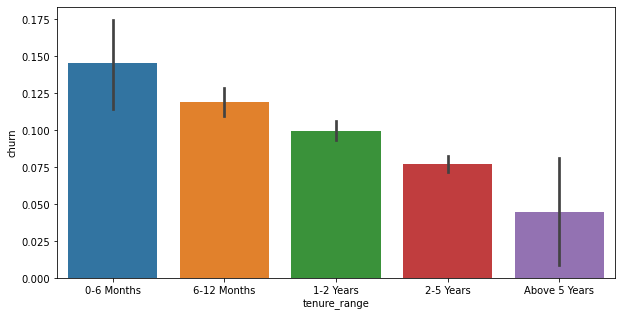

In [129]:
# Plotting the tenure range
plt.figure(figsize=(10,5))
sns.barplot(x='tenure_range', y='churn', data=high_val)
plt.show()

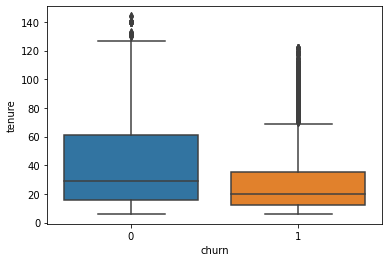

In [130]:
sns.boxplot(x=high_val['churn'], y = high_val['tenure'])
plt.show()

### ***Conclusion :***
- Maximum Churn rate is within 0-6 Months
- Churn rate is decreasing as customer retains in the Network
- Tenured customers do not churn

In [131]:
# Current Dimension of dataset
high_val_knn.shape

(30001, 53)

# Step 5: Data Modelling

#### 5.1: Perform Test-Train Split

In [132]:
#Splitting the dataset to feature variable 'X' and response variable 'y'

X = high_val_knn.drop(['churn'], axis=1)

y = high_val_knn['churn']

In [133]:
X.head(2)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.515297  0.000000     0.000000      0.000000       0.000000        
1  0.773683  0.428283     0.606414      0.418138       0.427038        

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0  0.000000          0.000000          0.000000          0.0                
1  0.400774          0.598788          0.584264          0.0                

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0  0.000000      0.000000          0.000000          0.000000           
1  0.595987      0.285425          0.410216          0.459604           

   std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0  0.000000      0.000000      0.0          0.000000        0.017892           
1  0.457539      0.293622      0.0          0.613746        0.403035           

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0  0.193654          0.103846          0.000000          0.000000           
1  0.569149          0.502231          0.411828          0.573936           

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0  0.000000      0.213820        0.0           0.000000      0.000000      
1  0.606578      0.696059        0.0           0.427934      0.391783      

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0  0.207944          0.516101          0.658685        0.658685             
1  0.393595          0.764767          0.876814        0.792711             

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0  0.752855         0.0              0.391784         0.204966      
1  0.000000         0.0              0.000000         0.000000      

   vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0  0.456443     0.65225    0.657814   0.0           0.0          0.529434       
1  0.000000     0.00000    0.000000   0.0           0.0          0.000000       

   sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0  0.0          0.528768  0.364113    0.000000    0.496413    0.193336     
1  0.0          0.469546  0.430275    0.330423    0.320001    0.000000     

   total_avg_rech_amt  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0  0.032208            1.0                   0.0                    
1  0.186905            0.0                   0.0                    

   fb_user_8_0.0  fb_user_8_1.0  
0  0.0            1.0            
1  0.0            0.0

In [134]:
X.shape

(30001, 52)

In [135]:
y.head(2)

0    1.0
1    1.0
Name: churn, dtype: float64

In [136]:
y.shape

(30001,)

In [137]:
# Train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [138]:
# Checking the shape after split

print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape :', X_test.shape)
print('y_test Shape :', y_test.shape)

X_train Shape : (21000, 52)
y_train Shape : (21000,)
X_test Shape : (9001, 52)
y_test Shape : (9001,)


In [139]:
# Checking colums of X_train:
X_train.head(2)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
11785  0.612846  0.190104     0.481358      0.416174       0.277897        
11987  0.566208  0.401890     0.584979      0.000000       0.000000        

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
11785  0.190104          0.356706          0.000000          0.126481           
11987  0.401890          0.629783          0.522436          0.000000           

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
11785  0.348567      0.0               0.278463          0.0                
11987  0.608245      0.0               0.315418          0.0                

       std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
11785  0.278400      0.108119      0.0          0.475784         
11987  0.315347      0.000000      0.0          0.599717         

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
11785  0.464429          0.552917          0.156946          0.0                
11987  0.437439          0.650650          0.364919          0.0                

       std_ic_t2m_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
11785  0.471133          0.468225      0.641684        0.0            
11987  0.364353          0.362104      0.662810        0.0            

       isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
11785  0.494843      0.000000     0.262397          0.605392           
11987  0.232528      0.023315     0.339143          0.577564           

       max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8  count_rech_2g_8  \
11785  0.647340        0.631296            0.000000         0.000000          
11987  0.580335        0.580335            0.625197         0.394046          

       count_rech_3g_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  \
11785  0.0              0.000000     0.000000     0.0        0.000000    
11987  0.0              0.625654     0.499421     0.0        0.001221    

       monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8       aon  \
11785  0.0           0.000000     0.0           0.0          0.946913   
11987  0.0           0.394046     0.0           0.0          0.807703   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_avg_rech_amt  \
11785  0.000000    0.000000    0.000000    0.0         0.187166             
11987  0.551518    0.548154    0.602996    0.0         0.130819             

       night_pck_user_8_0.0  night_pck_user_8_1.0  fb_user_8_0.0  \
11785  0.0                   0.0                   0.0             
11987  1.0                   0.0                   0.0             

       fb_user_8_1.0  
11785  0.0            
11987  1.0

In [140]:
# Checking colums of X_test

X_test.head(2)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
6102  0.541429  0.236574     0.330040      0.000000       0.000000        
2539  0.420315  0.252888     0.158925      0.177192       0.209926        

      loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
6102  0.236574          0.318155          0.144783          0.000000           
2539  0.146333          0.009044          0.000000          0.224414           

      loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
6102  0.344427      0.00000           0.199937          0.10354            
2539  0.148376      0.13112           0.000000          0.00000            

      std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
6102  0.213296      0.205260      0.0          0.370661         
2539  0.123478      0.191833      0.0          0.229611         

      loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
6102  0.155753          0.366303          0.430919          0.000000           
2539  0.230736          0.137015          0.000000          0.339317           

      std_ic_t2m_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
6102  0.177653          0.176556      0.452073        0.0            
2539  0.000000          0.326679      0.369897        0.0            

      isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
6102  0.0           0.0          0.304633          0.532922           
2539  0.0           0.0          0.393595          0.409872           

      max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8  count_rech_2g_8  \
6102  0.592422        0.592422            0.000000         0.000000          
2539  0.408776        0.000000            0.443286         0.288602          

      count_rech_3g_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  \
6102  0.000000         0.000000     0.0          0.000000   0.000000    
2539  0.391784         0.554763     0.0          0.380928   0.416885    

      monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8       aon  \
6102  0.0           0.000000     0.0           0.00000      0.411535   
2539  0.0           0.288602     0.0           0.40132      0.440370   

      aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_avg_rech_amt  \
6102  0.0         0.0         0.0         0.0         0.086719             
2539  0.0         0.0         0.0         0.0         0.122436             

      night_pck_user_8_0.0  night_pck_user_8_1.0  fb_user_8_0.0  fb_user_8_1.0  
6102  0.0                   0.0                   0.0            0.0            
2539  1.0                   0.0                   0.0            1.0

In [141]:
y_train.head(2)

11785    0.0
11987    0.0
Name: churn, dtype: float64

In [142]:
y_test.head(2)

6102    1.0
2539    1.0
Name: churn, dtype: float64

#### 5.2: Handling Data Imbalance

In [143]:
# Imbalance Percentage
imbalance = round(100*(sum(y != 0)/sum(y==0)),2)
print('The imbalance ratio is {}%'.format(imbalance))

The imbalance ratio is 8.86%


##### As we see that the data is imbalanced, we will use sampling techniques to correct the imbalance


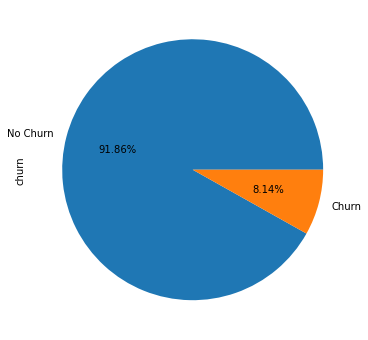

In [144]:
dist = 100*y.value_counts(normalize=True)
dist.plot.pie(autopct='%.2f%%', labels=['No Churn','Churn'], figsize=(6,6))
plt.show()

In [145]:
# Checking Data Imbalance in Train and Test data

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()

print('Imbalance in Train data : ',y_train_imb.round(2))
print('Imbalance in Test data : ',y_test_imb.round(2))

Imbalance in Train data :  0.09
Imbalance in Test data :  0.09


Text(0.5, 0, 'Churn')

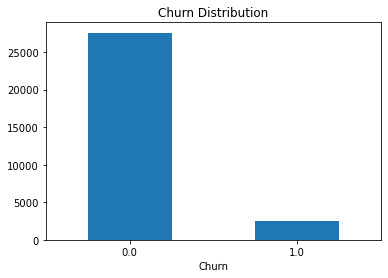

In [146]:
count_class = pd.value_counts(y,sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Churn Distribution')
plt.xlabel('Churn')

#### 5.3: Handling Data Imbalance by performing SMOTE oversampling

In [147]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [148]:
X_train_smote.shape

(38618, 52)

In [149]:
X_train_smote.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.612846  0.190104     0.481358      0.416174       0.277897        
1  0.566208  0.401890     0.584979      0.000000       0.000000        
2  0.551856  0.477663     0.562201      0.508649       0.507156        
3  0.629543  0.705468     0.662048      0.380297       0.372977        
4  0.535524  0.346275     0.462401      0.000000       0.000000        

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0  0.190104          0.356706          0.000000          0.126481           
1  0.401890          0.629783          0.522436          0.000000           
2  0.357174          0.570484          0.000000          0.000000           
3  0.695191          0.691434          0.438023          0.207617           
4  0.276389          0.513590          0.222645          0.000000           

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0  0.348567      0.000000          0.278463          0.000000           
1  0.608245      0.000000          0.315418          0.000000           
2  0.541675      0.371327          0.386226          0.000000           
3  0.743310      0.398124          0.518268          0.542547           
4  0.488809      0.284308          0.000000          0.000000           

   std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0  0.278400      0.108119      0.0          0.475784        0.464429           
1  0.315347      0.000000      0.0          0.599717        0.437439           
2  0.440554      0.000000      0.0          0.565222        0.465955           
3  0.557208      0.401370      0.0          0.745000        0.856591           
4  0.267737      0.133526      0.0          0.490336        0.659501           

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0  0.552917          0.156946          0.000000          0.471133           
1  0.650650          0.364919          0.000000          0.364353           
2  0.592651          0.237066          0.419352          0.421620           
3  0.637692          0.532041          0.000000          0.316595           
4  0.621719          0.550829          0.000000          0.000000           

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0  0.468225      0.641684        0.0           0.494843      0.000000      
1  0.362104      0.662810        0.0           0.232528      0.023315      
2  0.489752      0.653379        0.0           0.327013      0.370533      
3  0.347418      0.839919        0.0           0.000000      0.000000      
4  0.000000      0.712854        0.0           0.000000      0.375322      

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0  0.262397          0.605392          0.647340        0.631296             
1  0.339143          0.577564          0.580335        0.580335             
2  0.453871          0.549257          0.580335        0.408776             
3  0.453871          0.604253          0.580335        0.580335             
4  0.368320          0.533535          0.600361        0.408776             

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  vol_2g_mb_8  \
0  0.000000         0.000000         0.0              0.000000      
1  0.625197         0.394046         0.0              0.625654      
2  0.000000         0.000000         0.0              0.000000      
3  0.000000         0.000000         0.0              0.000000      
4  0.686192         0.394046         0.0              0.436871      

   vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0  0.000000     0.000000   0.000000   0.000000      0.000000     0.0            
1  0.499421     0.000000   0.001221   0.000000      0.394046     0.0            
2  0.000000     0.000000   0.000000   0.000000      0.000000     0.0            
3  0.000000     0.000000   0.000000   0.000000      0.000000     0.

In [150]:
y_train_smote.shape

(38618,)

In [151]:
y_train_smote.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

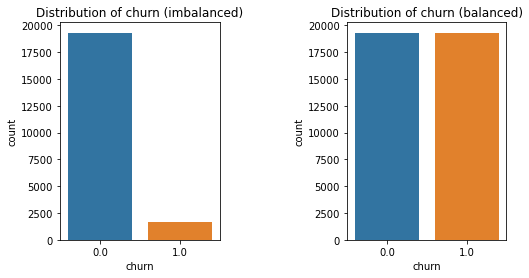

In [152]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE:

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(y_train)
plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(y_train_smote)
plt.subplots_adjust(wspace = 0.8)
plt.show()

In [153]:
# Thus, we have successfully treated data imbalance

# Step 6: Model Building

In [154]:
# Defining custom functions to print the model metrics

def print_model_metrics(y_test, y_pred, model_name):
  print('Model Stats Summary:')
  cp = confusion_matrix(y_test,y_pred)
  plt.figure()
  confusion_matrix_plot(cp)
  plt.show()

  accuracy = round(accuracy_score(y_test,y_pred),2)
  recall = round(recall_score(y_test,y_pred),2)
  precision = round(precision_score(y_test,y_pred),2)
  auc = round(roc_auc_score(y_test,y_pred),2)
  f1 = round(f1_score(y_test,y_pred),2)
  
  data = [[model_name,accuracy,recall,precision,auc,f1]]
  df = pd.DataFrame(data, columns=['Model','Accuracy','Precision','Recall','AUC','F1'])
  add_to_global_summary(df)
  return df

def confusion_matrix_plot(cm):
  classes=[0,1]
  cmap=plt.cm.Blues
  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


model_summary = pd.DataFrame()

def add_to_global_summary(df):
  global model_summary
  model_summary = model_summary.append(df,ignore_index = True)

#### 6.1: Models without PCA

#### 6.1.1 Logistic Regression Model without PCA

In [155]:
# Training the model

from sklearn import metrics
import statsmodels.api as sm

lr1 = sm.GLM(y_train_smote, (sm.add_constant(X_train_smote)), family = sm.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13246.
Date:                Mon, 16 Aug 2021   Deviance:                       26491.
Time:                        23:44:00   Pearson chi2:                 1.02e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5373      0.087     40.461      0.000       3.366       3.709
arpu_8                  -1.5000      0.231     -6.496      0.000      -1.953      -1.047
onnet_mou_8             -0.5890      0.217     -2.713      0.007      -1.015      -0.163
offnet_mou_8             0.2374      0.252      0.942      0.346      -0.257       0.731
roam_ic_mou_8           -0.9402      0.204     -4.617      0.000      -1.339      -0.541
roam_og_mou_8            4.0058      0.183     21.834      0.000       3.646       4.365
loc_og_t2t_mou_8        -0.7554      0.286     -2.645      0.008      -1.315      -0.196
loc_og_t2m_mou_8        -1.1850      0.392     -3.022      0.003      -1.954      -0.416
loc_og_t2f_mou_8        -0.6679      0.149     -4.473      0.000      -0.961      -0.375
loc_og_t2c_mou_8        -0.6808      0.160     -4.253      0.000      -0.995      -0.367
loc_og_mou_8             2.8152      0.541      5.207      0.000       1.756       3.875
std_og_t2t_mou_8         0.0512      0.180      0.284      0.776      -0.302       0.404
std_og_t2m_mou_8        -0.9721      0.231     -4.216      0.000      -1.424      -0.520
std_og_t2f_mou_8        -2.2523      0.223    -10.094      0.000      -2.690      -1.815
std_og_mou_8             1.9145      0.282      6.791      0.000       1.362       2.467
spl_og_mou_8             1.0504      0.132      7.953      0.000       0.792       1.309
og_others_8             -2.7622      0.985     -2.804      0.005      -4.693      -0.831
total_og_mou_8          -1.0958      0.284     -3.859      0.000      -1.652      -0.539
loc_ic_t2t_mou_8         0.3367      0.167      2.016      0.044       0.009       0.664
loc_ic_t2m_mou_8         0.4156      0.218      1.909      0.056      -0.011       0.842
loc_ic_t2f_mou_8        -0.0989      0.131     -0.755      0.450      -0.356       0.158
std_ic_t2t_mou_8        -0.2019      0.199     -1.013      0.311      -0.593       0.189
std_ic_t2m_mou_8         0.1678      0.267      0.627      0.530      -0.356       0.692
std_ic_mou_8            -0.2147      0.328     -0.655      0.512      -0.857       0.428
total_ic_mou_8          -4.4453      0.260    -17.111      0.000      -4.954      -3.936
spl_ic_mou_8            -9.2833      0.642    -14.452      0.000     -10.542      -8.024
isd_ic_mou_8             1.3659      0.120     11.407      0.000       1.131       1.601
ic_others_8              0.0218      0.224      0.097      0.922      -0.417       0.461
total_rech_num_8        -2.6300      0.249    -10.563      0.000      -3.118      -2.142
total_rech_amt_8        -0.2859      0.488     -0.586      0.558      -1.241       0.670
max_rech_amt_8           1.0722      0.365      2.938      0.003       0.357       1.787
last_day_rch_amt_8      -2.3541      0.074    -31.974    

In [156]:
# We can see that the p-value of the variable 'ic_others_8' is highest --> 0.922
# However, the number of features is 51 and it would be too cumbersome to treat them one by one based on p-values
# and VIF

#### Correlation Matrix and Heatmap

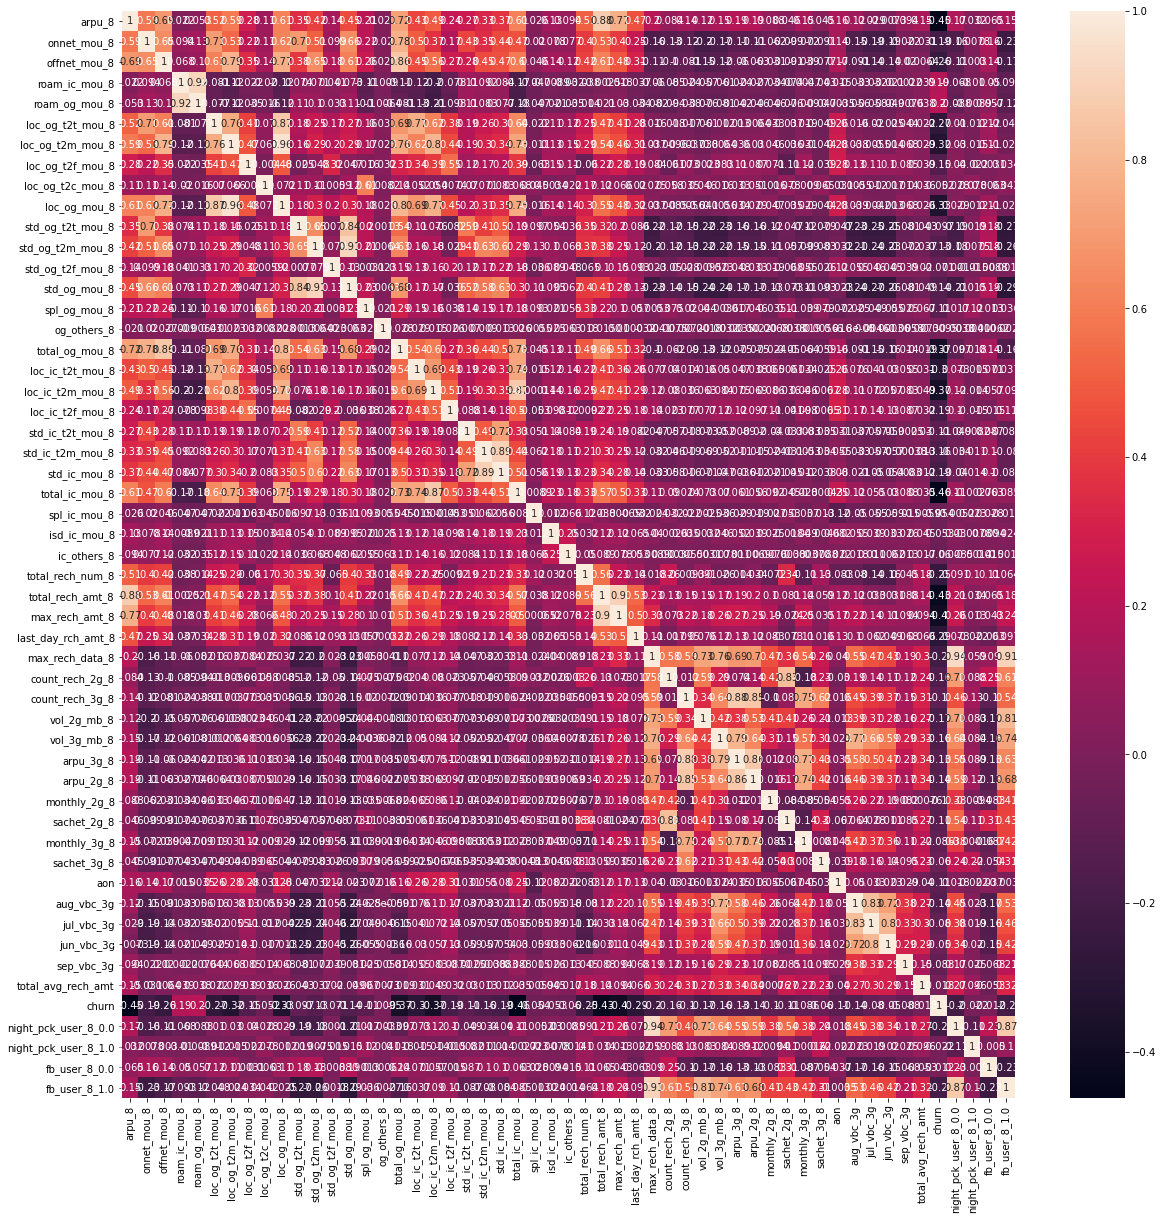

In [157]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(high_val_knn.corr(),annot = True)
plt.show()

In [158]:
# Since, this is not interpretable at all, we cannot identify and remove the correlated features. Instead, we would use RFE
# with 20 features.

#### Re-running the model with RFE

In [159]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_smote, y_train_smote)

In [160]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 4),
 ('onnet_mou_8', False, 14),
 ('offnet_mou_8', False, 29),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 23),
 ('loc_og_t2m_mou_8', False, 20),
 ('loc_og_t2f_mou_8', False, 10),
 ('loc_og_t2c_mou_8', False, 12),
 ('loc_og_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 32),
 ('std_og_t2m_mou_8', False, 13),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_8', False, 5),
 ('spl_og_mou_8', False, 11),
 ('og_others_8', True, 1),
 ('total_og_mou_8', False, 6),
 ('loc_ic_t2t_mou_8', False, 25),
 ('loc_ic_t2m_mou_8', False, 19),
 ('loc_ic_t2f_mou_8', False, 28),
 ('std_ic_t2t_mou_8', False, 24),
 ('std_ic_t2m_mou_8', False, 31),
 ('std_ic_mou_8', False, 30),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', False, 33),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 26),
 ('max_rech_amt_8', False, 8),
 ('last_day_rch_amt_8', True, 1),
 ('max_rech_data_8', True, 1),
 

In [161]:
col = X_train_smote.columns[rfe.support_]

In [162]:
col.shape

(20,)

In [163]:
X_train_smote.columns[~rfe.support_]

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'ic_others_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8',
       'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'fb_user_8_0.0'],
      dtype='object')

In [164]:
(X_train_smote.columns[~rfe.support_]).shape

(32,)

#### Assessing the model with Statsmodel

In [165]:
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_1 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13478.
Date:                Mon, 16 Aug 2021   Deviance:                       26957.
Time:                        23:44:54   Pearson chi2:                 1.38e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6162      0.062     58.528      0.000       3.495       3.737
roam_ic_mou_8           -1.0815      0.198     -5.474      0.000      -1.469      -0.694
roam_og_mou_8            3.9690      0.177     22.486      0.000       3.623       4.315
std_og_t2f_mou_8        -2.0536      0.206     -9.976      0.000      -2.457      -1.650
og_others_8             -2.1643      0.924     -2.343      0.019      -3.975      -0.354
total_ic_mou_8          -3.9910      0.083    -48.367      0.000      -4.153      -3.829
spl_ic_mou_8            -8.8903      0.624    -14.254      0.000     -10.113      -7.668
isd_ic_mou_8             1.3426      0.112     12.033      0.000       1.124       1.561
total_rech_num_8        -2.7709      0.141    -19.703      0.000      -3.047      -2.495
last_day_rch_amt_8      -2.3839      0.063    -38.052      0.000      -2.507      -2.261
max_rech_data_8         -5.5441      0.339    -16.342      0.000      -6.209      -4.879
count_rech_2g_8         -1.0187      0.228     -4.475      0.000      -1.465      -0.573
vol_2g_mb_8             -2.0139      0.146    -13.813      0.000      -2.300      -1.728
vol_3g_mb_8             -0.9665      0.136     -7.088      0.000      -1.234      -0.699
sachet_2g_8             -1.8699      0.263     -7.119      0.000      -2.385      -1.355
aon                     -1.0926      0.067    -16.204      0.000      -1.225      -0.960
sep_vbc_3g              -6.5893      0.385    -17.112      0.000      -7.344      -5.835
total_avg_rech_amt       2.7553      0.166     16.611      0.000       2.430       3.080
night_pck_user_8_0.0     2.8860      0.221     13.077      0.000       2.453       3.319
night_pck_user_8_1.0     2.4473      0.258      9.498      0.000       1.942       2.952
fb_user_8_1.0            1.0157      0.104      9.752      0.000       0.812       1.220
========================================================================================
"""

In [166]:
# Since the p-values of all the 20 variables is below 0.05, we would go ahead and check VIF (Variance Inflation Factor)

#### Checking VIF's

In [167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
17  night_pck_user_8_0.0  64.25
9   max_rech_data_8       60.42
19  fb_user_8_1.0         16.68
10  count_rech_2g_8       8.18 
7   total_rech_num_8      7.77 
13  sachet_2g_8           7.22 
4   total_ic_mou_8        6.63 
1   roam_og_mou_8         6.61 
0   roam_ic_mou_8         6.46 
12  vol_3g_mb_8           6.19 
11  vol_2g_mb_8           5.90 
14  aon                   3.53 
8   last_day_rch_amt_8    3.00 
16  total_avg_rech_amt    2.74 
18  night_pck_user_8_1.0  2.11 
6   isd_ic_mou_8          1.26 
15  sep_vbc_3g            1.20 
2   std_og_t2f_mou_8      1.17 
5   spl_ic_mou_8          1.07 
3   og_others_8           1.01

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'night_pck_user_8_0.0' has the highest VIF. So let's start by dropping that.

In [169]:
col = col.drop('night_pck_user_8_0.0', 1)
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'aon', 'sep_vbc_3g',
       'total_avg_rech_amt', 'night_pck_user_8_1.0', 'fb_user_8_1.0'],
      dtype='object')

In [170]:
col.shape

(19,)

In [171]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_2 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13568.
Date:                Mon, 16 Aug 2021   Deviance:                       27136.
Time:                        23:44:56   Pearson chi2:                 1.36e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6201      0.062     58.733      0.000       3.499       3.741
roam_ic_mou_8           -1.0408      0.197     -5.276      0.000      -1.427      -0.654
roam_og_mou_8            3.9820      0.176     22.563      0.000       3.636       4.328
std_og_t2f_mou_8        -2.1009      0.206    -10.219      0.000      -2.504      -1.698
og_others_8             -2.0049      0.924     -2.169      0.030      -3.816      -0.193
total_ic_mou_8          -3.9144      0.082    -47.927      0.000      -4.074      -3.754
spl_ic_mou_8            -8.8392      0.622    -14.203      0.000     -10.059      -7.619
isd_ic_mou_8             1.3336      0.112     11.952      0.000       1.115       1.552
total_rech_num_8        -2.7336      0.140    -19.478      0.000      -3.009      -2.458
last_day_rch_amt_8      -2.4577      0.062    -39.522      0.000      -2.580      -2.336
max_rech_data_8         -1.5079      0.139    -10.823      0.000      -1.781      -1.235
count_rech_2g_8         -0.7313      0.227     -3.216      0.001      -1.177      -0.286
vol_2g_mb_8             -2.4922      0.141    -17.694      0.000      -2.768      -2.216
vol_3g_mb_8             -1.5248      0.128    -11.896      0.000      -1.776      -1.274
sachet_2g_8              0.0018      0.215      0.009      0.993      -0.419       0.422
aon                     -1.0933      0.067    -16.262      0.000      -1.225      -0.962
sep_vbc_3g              -6.5285      0.384    -16.980      0.000      -7.282      -5.775
total_avg_rech_amt       2.6305      0.163     16.123      0.000       2.311       2.950
night_pck_user_8_1.0    -0.0040      0.169     -0.023      0.981      -0.335       0.327
fb_user_8_1.0            1.3764      0.100     13.723      0.000       1.180       1.573
========================================================================================
"""

In [172]:
# We can see that the p-value of the variable/ feature 'sachet_2g_8' is greater than 0.05 --> 0.993; we would drop this
# variable/ feature

In [173]:
col = col.drop('sachet_2g_8', 1)
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g', 'total_avg_rech_amt',
       'night_pck_user_8_1.0', 'fb_user_8_1.0'],
      dtype='object')

In [174]:
col.shape

(18,)

In [175]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_3 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13568.
Date:                Mon, 16 Aug 2021   Deviance:                       27136.
Time:                        23:44:56   Pearson chi2:                 1.36e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6201      0.061     58.912      0.000       3.500       3.741
roam_ic_mou_8           -1.0408      0.197     -5.277      0.000      -1.427      -0.654
roam_og_mou_8            3.9820      0.176     22.565      0.000       3.636       4.328
std_og_t2f_mou_8        -2.1009      0.206    -10.219      0.000      -2.504      -1.698
og_others_8             -2.0049      0.924     -2.169      0.030      -3.816      -0.193
total_ic_mou_8          -3.9144      0.082    -47.993      0.000      -4.074      -3.755
spl_ic_mou_8            -8.8393      0.622    -14.204      0.000     -10.059      -7.620
isd_ic_mou_8             1.3336      0.112     11.952      0.000       1.115       1.552
total_rech_num_8        -2.7334      0.139    -19.643      0.000      -3.006      -2.461
last_day_rch_amt_8      -2.4578      0.062    -39.663      0.000      -2.579      -2.336
max_rech_data_8         -1.5080      0.139    -10.864      0.000      -1.780      -1.236
count_rech_2g_8         -0.7296      0.126     -5.776      0.000      -0.977      -0.482
vol_2g_mb_8             -2.4923      0.139    -17.918      0.000      -2.765      -2.220
vol_3g_mb_8             -1.5249      0.127    -11.976      0.000      -1.774      -1.275
aon                     -1.0933      0.067    -16.263      0.000      -1.225      -0.962
sep_vbc_3g              -6.5286      0.384    -16.981      0.000      -7.282      -5.775
total_avg_rech_amt       2.6307      0.161     16.318      0.000       2.315       2.947
night_pck_user_8_1.0    -0.0039      0.169     -0.023      0.981      -0.335       0.327
fb_user_8_1.0            1.3765      0.100     13.831      0.000       1.181       1.572
========================================================================================
"""

In [176]:
# We can see that the p-value of the variable/ feature 'night_pck_user_8_1.0' is greater than 0.05 --> 0.981; we would drop
# this variable/ feature

In [177]:
col = col.drop('night_pck_user_8_1.0', 1)
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g', 'total_avg_rech_amt',
       'fb_user_8_1.0'],
      dtype='object')

In [178]:
col.shape

(17,)

In [179]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_3 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13568.
Date:                Mon, 16 Aug 2021   Deviance:                       27136.
Time:                        23:44:56   Pearson chi2:                 1.36e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6202      0.061     59.007      0.000       3.500       3.740
roam_ic_mou_8         -1.0405      0.197     -5.284      0.000      -1.426      -0.655
roam_og_mou_8          3.9817      0.176     22.609      0.000       3.637       4.327
std_og_t2f_mou_8      -2.1008      0.206    -10.220      0.000      -2.504      -1.698
og_others_8           -2.0048      0.924     -2.169      0.030      -3.816      -0.193
total_ic_mou_8        -3.9144      0.082    -47.993      0.000      -4.074      -3.755
spl_ic_mou_8          -8.8393      0.622    -14.204      0.000     -10.059      -7.620
isd_ic_mou_8           1.3337      0.112     11.956      0.000       1.115       1.552
total_rech_num_8      -2.7336      0.139    -19.670      0.000      -3.006      -2.461
last_day_rch_amt_8    -2.4577      0.062    -39.687      0.000      -2.579      -2.336
max_rech_data_8       -1.5076      0.138    -10.929      0.000      -1.778      -1.237
count_rech_2g_8       -0.7298      0.126     -5.783      0.000      -0.977      -0.482
vol_2g_mb_8           -2.4923      0.139    -17.919      0.000      -2.765      -2.220
vol_3g_mb_8           -1.5251      0.127    -12.000      0.000      -1.774      -1.276
aon                   -1.0934      0.067    -16.269      0.000      -1.225      -0.962
sep_vbc_3g            -6.5285      0.384    -16.982      0.000      -7.282      -5.775
total_avg_rech_amt     2.6304      0.161     16.350      0.000       2.315       2.946
fb_user_8_1.0          1.3763      0.099     13.881      0.000       1.182       1.571
======================================================================================
"""

In [180]:
# Since the p-values of all the variables/ features are less than 0.05, we would go ahead and check the VIF.

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16  fb_user_8_1.0       15.34
9   max_rech_data_8     12.42
7   total_rech_num_8    7.61 
1   roam_og_mou_8       6.60 
4   total_ic_mou_8      6.59 
0   roam_ic_mou_8       6.45 
12  vol_3g_mb_8         5.47 
11  vol_2g_mb_8         5.41 
13  aon                 3.51 
10  count_rech_2g_8     3.05 
8   last_day_rch_amt_8  2.96 
15  total_avg_rech_amt  2.68 
6   isd_ic_mou_8        1.26 
14  sep_vbc_3g          1.20 
2   std_og_t2f_mou_8    1.17 
5   spl_ic_mou_8        1.07 
3   og_others_8         1.01

In [182]:
# Dropping the feature 'fb_user_8_1.0' as its VIF is above 5 --> 15.34

In [183]:
col = col.drop('fb_user_8_1.0')
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g',
       'total_avg_rech_amt'],
      dtype='object')

In [184]:
col.shape

(16,)

In [185]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_4 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13665.
Date:                Mon, 16 Aug 2021   Deviance:                       27331.
Time:                        23:44:57   Pearson chi2:                 1.25e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6516      0.061     59.671      0.000       3.532       3.772
roam_ic_mou_8         -1.1599      0.195     -5.936      0.000      -1.543      -0.777
roam_og_mou_8          3.9359      0.175     22.512      0.000       3.593       4.279
std_og_t2f_mou_8      -2.0680      0.204    -10.152      0.000      -2.467      -1.669
og_others_8           -1.9719      0.923     -2.135      0.033      -3.782      -0.162
total_ic_mou_8        -3.9542      0.081    -48.672      0.000      -4.113      -3.795
spl_ic_mou_8          -8.7248      0.616    -14.156      0.000      -9.933      -7.517
isd_ic_mou_8           1.3767      0.111     12.400      0.000       1.159       1.594
total_rech_num_8      -2.6615      0.138    -19.262      0.000      -2.932      -2.391
last_day_rch_amt_8    -2.4501      0.061    -39.860      0.000      -2.571      -2.330
max_rech_data_8       -0.8156      0.127     -6.433      0.000      -1.064      -0.567
count_rech_2g_8       -0.3982      0.123     -3.245      0.001      -0.639      -0.158
vol_2g_mb_8           -1.3392      0.109    -12.271      0.000      -1.553      -1.125
vol_3g_mb_8           -0.7086      0.110     -6.428      0.000      -0.925      -0.493
aon                   -1.1273      0.067    -16.867      0.000      -1.258      -0.996
sep_vbc_3g            -6.5124      0.382    -17.043      0.000      -7.261      -5.763
total_avg_rech_amt     2.6160      0.159     16.420      0.000       2.304       2.928
======================================================================================
"""

In [186]:
# Since the p-values of all the variables/ features are less than 0.05, we would go ahead and check the VIF.

In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9   max_rech_data_8     10.10
7   total_rech_num_8    7.56 
1   roam_og_mou_8       6.59 
4   total_ic_mou_8      6.58 
0   roam_ic_mou_8       6.45 
12  vol_3g_mb_8         4.51 
11  vol_2g_mb_8         3.69 
13  aon                 3.51 
8   last_day_rch_amt_8  2.96 
10  count_rech_2g_8     2.95 
15  total_avg_rech_amt  2.68 
6   isd_ic_mou_8        1.26 
14  sep_vbc_3g          1.19 
2   std_og_t2f_mou_8    1.17 
5   spl_ic_mou_8        1.07 
3   og_others_8         1.01

In [188]:
# Dropping the feature 'max_rech_data_8' as its VIF is above 5 --> 10.10

In [189]:
col = col.drop('max_rech_data_8')
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'aon', 'sep_vbc_3g', 'total_avg_rech_amt'],
      dtype='object')

In [190]:
col.shape

(15,)

In [191]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_5 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13686.
Date:                Mon, 16 Aug 2021   Deviance:                       27372.
Time:                        23:44:58   Pearson chi2:                 1.27e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6022      0.060     59.640      0.000       3.484       3.721
roam_ic_mou_8         -1.1590      0.195     -5.943      0.000      -1.541      -0.777
roam_og_mou_8          3.8907      0.174     22.329      0.000       3.549       4.232
std_og_t2f_mou_8      -2.0928      0.204    -10.281      0.000      -2.492      -1.694
og_others_8           -1.9366      0.922     -2.101      0.036      -3.743      -0.130
total_ic_mou_8        -3.9551      0.081    -48.749      0.000      -4.114      -3.796
spl_ic_mou_8          -8.7401      0.616    -14.180      0.000      -9.948      -7.532
isd_ic_mou_8           1.3557      0.111     12.212      0.000       1.138       1.573
total_rech_num_8      -2.5836      0.137    -18.830      0.000      -2.853      -2.315
last_day_rch_amt_8    -2.4625      0.061    -40.127      0.000      -2.583      -2.342
count_rech_2g_8       -0.7756      0.108     -7.151      0.000      -0.988      -0.563
vol_2g_mb_8           -1.6991      0.094    -18.128      0.000      -1.883      -1.515
vol_3g_mb_8           -1.2552      0.071    -17.710      0.000      -1.394      -1.116
aon                   -1.1256      0.067    -16.869      0.000      -1.256      -0.995
sep_vbc_3g            -6.4390      0.383    -16.829      0.000      -7.189      -5.689
total_avg_rech_amt     2.6566      0.160     16.600      0.000       2.343       2.970
======================================================================================
"""

In [192]:
# Since the p-values of all the variables/ features are below 0.05, we would go ahead and check VIF

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7   total_rech_num_8    7.54
1   roam_og_mou_8       6.59
4   total_ic_mou_8      6.54
0   roam_ic_mou_8       6.44
12  aon                 3.50
8   last_day_rch_amt_8  2.95
14  total_avg_rech_amt  2.68
10  vol_2g_mb_8         2.61
9   count_rech_2g_8     2.47
11  vol_3g_mb_8         1.96
6   isd_ic_mou_8        1.26
2   std_og_t2f_mou_8    1.17
13  sep_vbc_3g          1.17
5   spl_ic_mou_8        1.07
3   og_others_8         1.01

In [194]:
# Dropping the feature 'total_rech_num_8' as its VIF is above 5 --> 7.54

In [195]:
col = col.drop('total_rech_num_8')
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g',
       'total_avg_rech_amt'],
      dtype='object')

In [196]:
col.shape

(14,)

In [197]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_6 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13872.
Date:                Mon, 16 Aug 2021   Deviance:                       27743.
Time:                        23:44:59   Pearson chi2:                 1.97e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9494      0.047     62.199      0.000       2.856       3.042
roam_ic_mou_8         -0.8184      0.196     -4.172      0.000      -1.203      -0.434
roam_og_mou_8          3.4084      0.173     19.645      0.000       3.068       3.748
std_og_t2f_mou_8      -1.7352      0.200     -8.681      0.000      -2.127      -1.343
og_others_8           -1.8365      0.911     -2.015      0.044      -3.623      -0.050
total_ic_mou_8        -4.5725      0.075    -61.253      0.000      -4.719      -4.426
spl_ic_mou_8          -9.3142      0.609    -15.304      0.000     -10.507      -8.121
isd_ic_mou_8           1.4223      0.111     12.871      0.000       1.206       1.639
last_day_rch_amt_8    -2.6470      0.061    -43.310      0.000      -2.767      -2.527
count_rech_2g_8       -1.2255      0.105    -11.642      0.000      -1.432      -1.019
vol_2g_mb_8           -1.6195      0.094    -17.246      0.000      -1.804      -1.435
vol_3g_mb_8           -1.1532      0.071    -16.280      0.000      -1.292      -1.014
aon                   -0.9344      0.065    -14.272      0.000      -1.063      -0.806
sep_vbc_3g            -6.4502      0.383    -16.821      0.000      -7.202      -5.699
total_avg_rech_amt     2.3699      0.158     15.012      0.000       2.060       2.679
======================================================================================
"""

In [198]:
# Since the p-values of all the variables/ features are below 0.05, we would go ahead and check VIF

In [199]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0   roam_ic_mou_8       6.44
1   roam_og_mou_8       6.44
4   total_ic_mou_8      4.62
11  aon                 3.32
7   last_day_rch_amt_8  2.91
9   vol_2g_mb_8         2.61
13  total_avg_rech_amt  2.42
8   count_rech_2g_8     2.38
10  vol_3g_mb_8         1.95
6   isd_ic_mou_8        1.26
12  sep_vbc_3g          1.17
2   std_og_t2f_mou_8    1.15
5   spl_ic_mou_8        1.06
3   og_others_8         1.01

In [200]:
# Dropping the feature 'roam_ic_mou_8' as its VIF is above 5 --> 6.44

In [201]:
col = col.drop('roam_ic_mou_8')
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g',
       'total_avg_rech_amt'],
      dtype='object')

In [202]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_7 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13880.
Date:                Mon, 16 Aug 2021   Deviance:                       27761.
Time:                        23:45:00   Pearson chi2:                 1.88e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9337      0.047     62.052      0.000       2.841       3.026
roam_og_mou_8          2.7617      0.077     36.061      0.000       2.612       2.912
std_og_t2f_mou_8      -1.7662      0.200     -8.831      0.000      -2.158      -1.374
og_others_8           -1.7166      0.907     -1.892      0.059      -3.495       0.062
total_ic_mou_8        -4.5299      0.074    -61.250      0.000      -4.675      -4.385
spl_ic_mou_8          -9.2501      0.606    -15.264      0.000     -10.438      -8.062
isd_ic_mou_8           1.3940      0.110     12.643      0.000       1.178       1.610
last_day_rch_amt_8    -2.6458      0.061    -43.320      0.000      -2.766      -2.526
count_rech_2g_8       -1.2186      0.105    -11.586      0.000      -1.425      -1.012
vol_2g_mb_8           -1.6298      0.094    -17.362      0.000      -1.814      -1.446
vol_3g_mb_8           -1.1551      0.071    -16.314      0.000      -1.294      -1.016
aon                   -0.9478      0.065    -14.506      0.000      -1.076      -0.820
sep_vbc_3g            -6.5380      0.385    -16.985      0.000      -7.292      -5.784
total_avg_rech_amt     2.3589      0.158     14.954      0.000       2.050       2.668
======================================================================================
"""

In [203]:
# We can see that the p-value of the variable/ feature 'og_others_8' is greater than 0.05 --> 0.059; we would drop
# this variable/ feature

In [204]:
col = col.drop('og_others_8')
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'aon', 'sep_vbc_3g', 'total_avg_rech_amt'],
      dtype='object')

In [205]:
col.shape

(12,)

In [206]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])
lr_rfe_8 = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
res = lr_rfe_8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13882.
Date:                Mon, 16 Aug 2021   Deviance:                       27765.
Time:                        23:45:00   Pearson chi2:                 1.89e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9336      0.047     62.057      0.000       2.841       3.026
roam_og_mou_8          2.7599      0.077     36.039      0.000       2.610       2.910
std_og_t2f_mou_8      -1.7978      0.200     -8.987      0.000      -2.190      -1.406
total_ic_mou_8        -4.5292      0.074    -61.250      0.000      -4.674      -4.384
spl_ic_mou_8          -9.2535      0.606    -15.275      0.000     -10.441      -8.066
isd_ic_mou_8           1.3876      0.110     12.588      0.000       1.172       1.604
last_day_rch_amt_8    -2.6472      0.061    -43.347      0.000      -2.767      -2.528
count_rech_2g_8       -1.2192      0.105    -11.592      0.000      -1.425      -1.013
vol_2g_mb_8           -1.6291      0.094    -17.356      0.000      -1.813      -1.445
vol_3g_mb_8           -1.1533      0.071    -16.293      0.000      -1.292      -1.015
aon                   -0.9461      0.065    -14.482      0.000      -1.074      -0.818
sep_vbc_3g            -6.5348      0.385    -16.979      0.000      -7.289      -5.780
total_avg_rech_amt     2.3525      0.158     14.919      0.000       2.043       2.662
======================================================================================
"""

In [207]:
# Since the p-values of all the variables/ features are below 0.05, we would go ahead and check VIF

In [208]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   total_ic_mou_8      4.54
9   aon                 3.27
5   last_day_rch_amt_8  2.90
7   vol_2g_mb_8         2.61
11  total_avg_rech_amt  2.42
6   count_rech_2g_8     2.38
8   vol_3g_mb_8         1.95
0   roam_og_mou_8       1.43
4   isd_ic_mou_8        1.26
10  sep_vbc_3g          1.17
1   std_og_t2f_mou_8    1.15
3   spl_ic_mou_8        1.06

In [209]:
# Since the value of VIF of all the variables/ features is below 5, and the p-value of all the variables/ features is below 
# 0.05, we conclude that 'lr_rfe_8' is the final model.

In [210]:
# Model Evaluation on the train set (Logistic Regression without PCA)

In [211]:
# Predictions on the train set 'X_train', then reshaping in to an array and then assigning the values to 'y_train_pred':
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [212]:
# Checking the first 10 values of the predictions:
y_train_pred[:10]

array([0.34393517, 0.02158291, 0.48972297, 0.06157691, 0.03902471,
       0.05265658, 0.07761655, 0.0211448 , 0.45337782, 0.17895682])

In [213]:
# Creating a data fram 'y_train_pred_final':
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = mn
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number
0  0.0    0.343935    7000842753   
1  0.0    0.021583    7001865778   
2  0.0    0.489723    7001625959   
3  0.0    0.061577    7001204172   
4  0.0    0.039025    7000142493

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0 (0.5 is the random chance)

In [214]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0  0.0    0.343935    7000842753     0        
1  0.0    0.021583    7001865778     0        
2  0.0    0.489723    7001625959     0        
3  0.0    0.061577    7001204172     0        
4  0.0    0.039025    7000142493     0

In [215]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16738  2571]
 [ 3281 16028]]


In [216]:
# Predicted     not_churn    churn
# Actual
# not_churn        16738     2571
# churn             3281     16028  

#### Metrics beyond simple accuracy

In [217]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [218]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  16028
True Negatives =  16738
False Positives =  2571
False Negatives =  3281


In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8300792376611943

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.8668496556010151

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13315034439898493


In [222]:
# positive predictive value 
print (TP / float(TP+FP))

0.8617667616538524


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8361056995853938


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [224]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [225]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

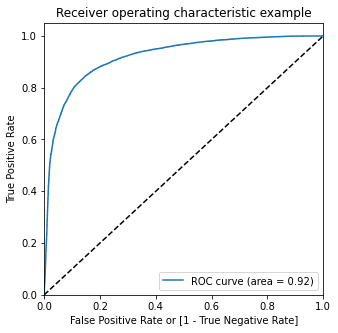

In [226]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [227]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.0    0.343935    7000842753     0          1    1    1    1    0    0     
1  0.0    0.021583    7001865778     0          1    0    0    0    0    0     
2  0.0    0.489723    7001625959     0          1    1    1    1    1    0     
3  0.0    0.061577    7001204172     0          1    0    0    0    0    0     
4  0.0    0.039025    7000142493     0          1    0    0    0    0    0     

   0.6  0.7  0.8  0.9  
0  0    0    0    0    
1  0    0    0    0    
2  0    0    0    0    
3  0    0    0    0    
4  0    0    0    0

In [228]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.695556  0.979543  0.411570
0.2  0.2   0.780491  0.946761  0.614221
0.3  0.3   0.822699  0.912165  0.733233
0.4  0.4   0.843415  0.873479  0.813351
0.5  0.5   0.848464  0.830079  0.866850
0.6  0.6   0.842638  0.779636  0.905640
0.7  0.7   0.824797  0.713760  0.935833
0.8  0.8   0.801621  0.646175  0.957067
0.9  0.9   0.760707  0.546429  0.974986


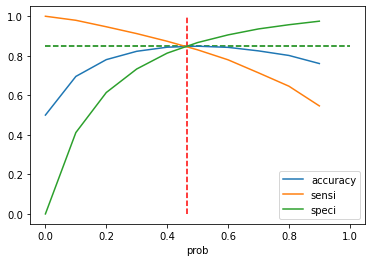

In [229]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.465, ymax=1, ymin = 0.0, colors="r", linestyles="--")
plt.hlines(y=0.85, xmax=1, xmin = 0, colors="g", linestyles="--")
plt.show()

From the curve above, 0.465 is the optimum point to take it as a cutoff probability

In [230]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.465 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.0    0.343935    7000842753     0          1    1    1    1    0    0     
1  0.0    0.021583    7001865778     0          1    0    0    0    0    0     
2  0.0    0.489723    7001625959     0          1    1    1    1    1    0     
3  0.0    0.061577    7001204172     0          1    0    0    0    0    0     
4  0.0    0.039025    7000142493     0          1    0    0    0    0    0     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  0    0    0    0    0                
2  0    0    0    0    1                
3  0    0    0    0    0                
4  0    0    0    0    0

Model Stats Summary:


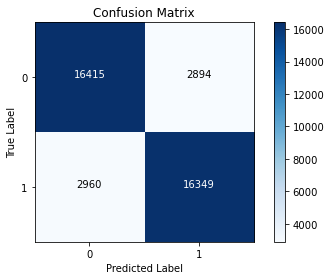

Model  Accuracy  Precision  \
0  Logistic Regression without PCA - on Train Data  0.85      0.85        

   Recall   AUC    F1  
0  0.85    0.85  0.85

In [231]:
print_model_metrics(y_train_pred_final.Churn, y_train_pred_final.final_predicted,'Logistic Regression without PCA - on Train Data')

In [232]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
confusion2

array([[16415,  2894],
       [ 2960, 16349]], dtype=int64)

In [233]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [234]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  16349
True Negatives =  16415
False Positives =  2894
False Negatives =  2960


In [235]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8467036097156766

In [236]:
# Let us calculate specificity
TN / float(TN+FP)

0.8501217049044487

In [237]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14987829509555128


In [238]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8496076495348958


In [239]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8472258064516129


#### Precision and recall tradeoff

In [240]:
from sklearn.metrics import precision_recall_curve

In [241]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        0.0
 6        0.0
 7        0.0
 8        0.0
 9        0.0
 10       0.0
 11       0.0
 12       0.0
 13       0.0
 14       0.0
 15       0.0
 16       0.0
 17       0.0
 18       1.0
 19       0.0
 20       0.0
 21       0.0
 22       0.0
 23       0.0
 24       0.0
 25       0.0
 26       0.0
 27       0.0
 28       0.0
 29       1.0
 30       0.0
 31       0.0
 32       0.0
 33       0.0
 34       1.0
 35       0.0
 36       0.0
 37       0.0
 38       0.0
 39       0.0
 40       0.0
 41       0.0
 42       0.0
 43       0.0
 44       1.0
 45       0.0
 46       0.0
 47       0.0
 48       1.0
 49       0.0
 50       0.0
 51       0.0
 52       0.0
 53       0.0
 54       0.0
 55       0.0
 56       0.0
 57       1.0
 58       0.0
 59       0.0
 60       0.0
 61       0.0
 62       0.0
 63       0.0
 64       0.0
 65       0.0
 66       0.0
 67       0.0
 68       0.0
 69       0.0
 70       0.0
 71   

In [242]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

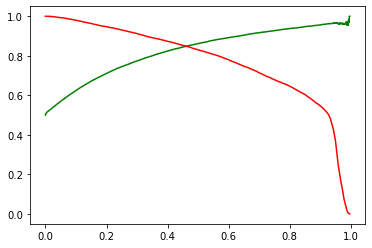

In [243]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [244]:
model_summary

Model  Accuracy  Precision  \
0  Logistic Regression without PCA - on Train Data  0.85      0.85        

   Recall   AUC    F1  
0  0.85    0.85  0.85

In [245]:
# Model Evaluation on the test set (Logistic Regression without PCA)

In [246]:
# Predictions on the train set 'X_test', then reshaping in to an array and then assigning the values to 'y_train_pred':
y_test_pred = res.predict(sm.add_constant(X_test[col])).values.reshape(-1)

In [247]:
# Checking the first 10 values of the predictions:
y_test_pred[:10]

array([0.25852524, 0.61145468, 0.11320543, 0.20042878, 0.91856414,
       0.13593172, 0.05476331, 0.01969425, 0.31416762, 0.11646129])

In [248]:
# Creating a data fram 'y_test_pred_final':
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['mobile_number'] = mn
y_test_pred_final.head()

Churn  Churn_Prob  mobile_number
0  1.0    0.258525    7000842753   
1  1.0    0.611455    7001865778   
2  0.0    0.113205    7001625959   
3  0.0    0.200429    7001204172   
4  1.0    0.918564    7000142493

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0 (0.5 is the random chance)

In [249]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0  1.0    0.258525    7000842753     0        
1  1.0    0.611455    7001865778     1        
2  0.0    0.113205    7001625959     0        
3  0.0    0.200429    7001204172     0        
4  1.0    0.918564    7000142493     1

In [250]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(confusion)

[[7214 1037]
 [ 132  618]]


In [251]:
# Predicted     not_churn    churn
# Actual
# not_churn         7214     1037
# churn              132     618

#### Metrics beyond simple accuracy

In [252]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [253]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  618
True Negatives =  7214
False Positives =  1037
False Negatives =  132


In [254]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.824

In [255]:
# Let us calculate specificity
TN / float(TN+FP)

0.8743182644527936

In [256]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1256817355472064


In [257]:
# positive predictive value 
print (TP / float(TP+FP))

0.37341389728096674


In [258]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9820310372992105


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [259]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [260]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob, drop_intermediate = False )

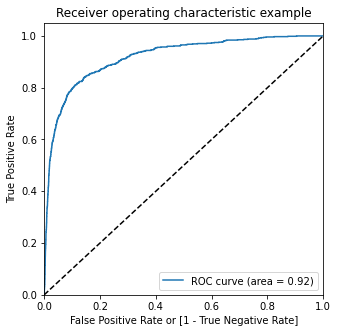

In [261]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificitym

In [262]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  1.0    0.258525    7000842753     0          1    1    1    0    0    0     
1  1.0    0.611455    7001865778     1          1    1    1    1    1    1     
2  0.0    0.113205    7001625959     0          1    1    0    0    0    0     
3  0.0    0.200429    7001204172     0          1    1    1    0    0    0     
4  1.0    0.918564    7000142493     1          1    1    1    1    1    1     

   0.6  0.7  0.8  0.9  
0  0    0    0    0    
1  1    0    0    0    
2  0    0    0    0    
3  0    0    0    0    
4  1    1    1    1

In [263]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.083324  1.000000  0.000000
0.1  0.1   0.460727  0.972000  0.414253
0.2  0.2   0.653372  0.944000  0.626954
0.3  0.3   0.756027  0.892000  0.743667
0.4  0.4   0.822464  0.858667  0.819173
0.5  0.5   0.870126  0.824000  0.874318
0.6  0.6   0.899456  0.784000  0.909950
0.7  0.7   0.918454  0.718667  0.936614
0.8  0.8   0.931341  0.658667  0.956127
0.9  0.9   0.939562  0.553333  0.974670


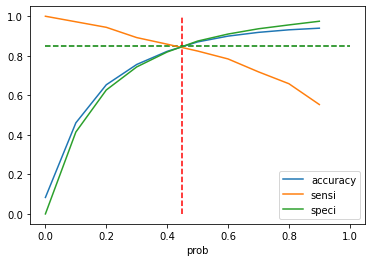

In [264]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin = 0.0, colors="r", linestyles="--")
plt.hlines(y=0.85, xmax=1, xmin = 0, colors="g", linestyles="--")
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability

In [265]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_test_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  1.0    0.258525    7000842753     0          1    1    1    0    0    0     
1  1.0    0.611455    7001865778     1          1    1    1    1    1    1     
2  0.0    0.113205    7001625959     0          1    1    0    0    0    0     
3  0.0    0.200429    7001204172     0          1    1    1    0    0    0     
4  1.0    0.918564    7000142493     1          1    1    1    1    1    1     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  1    0    0    0    1                
2  0    0    0    0    0                
3  0    0    0    0    0                
4  1    1    1    1    1

Model Stats Summary:


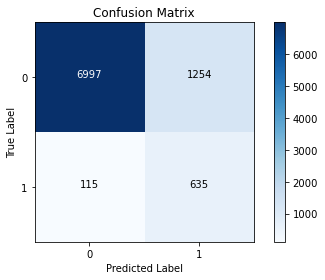

Model  Accuracy  Precision  \
0  Logistic Regression without PCA - on Test Data  0.85      0.85        

   Recall   AUC    F1  
0  0.34    0.85  0.48

In [266]:
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.final_predicted,'Logistic Regression without PCA - on Test Data')

In [267]:
# Model Parameters in descending order:
res.params.sort_values(ascending = False)

const                 2.933612
roam_og_mou_8         2.759921
total_avg_rech_amt    2.352521
isd_ic_mou_8          1.387569
aon                  -0.946103
vol_3g_mb_8          -1.153254
count_rech_2g_8      -1.219169
vol_2g_mb_8          -1.629133
std_og_t2f_mou_8     -1.797779
last_day_rch_amt_8   -2.647208
total_ic_mou_8       -4.529152
sep_vbc_3g           -6.534795
spl_ic_mou_8         -9.253468
dtype: float64

#### 6.2 Models with PCA

#### 6.2.1 PCA : Principal Component Analysis

In [268]:
# Importing PCA Module

from sklearn.decomposition import PCA

# Instantiating:
pca = PCA(random_state=42)

In [269]:
# Applying PCA on Train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [270]:
pca.components_

array([[ 1.74668727e-01,  1.19474704e-01,  1.36320922e-01, ...,
         6.70638005e-03,  2.21599112e-02,  3.71772922e-01],
       [-1.26945531e-01, -2.16680208e-01, -1.92036764e-01, ...,
         3.75709493e-04, -3.66728366e-02,  3.42247724e-01],
       [-3.80853751e-02, -4.52586402e-02,  8.23221456e-03, ...,
         1.09924874e-03, -2.06504574e-01, -1.39773626e-01],
       ...,
       [ 3.49727638e-03, -3.87334500e-03, -1.45202470e-03, ...,
         1.50763971e-02,  1.76273211e-02,  2.21108898e-02],
       [ 7.98371158e-04,  5.76676709e-03, -6.79659116e-03, ...,
        -8.20438636e-04, -1.89236448e-03, -1.52564485e-03],
       [-2.32773744e-15,  5.65704345e-16,  4.51809931e-16, ...,
        -5.00000000e-01,  5.00000000e-01,  5.00000000e-01]])

In [271]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([3.65065656e-01, 2.18798071e-01, 6.53581507e-02, 4.77856729e-02,
       3.71412124e-02, 3.14020223e-02, 2.74926359e-02, 2.13318675e-02,
       1.73768005e-02, 1.59494225e-02, 1.50869816e-02, 1.26518901e-02,
       1.10390378e-02, 1.02404567e-02, 9.05295328e-03, 7.80877328e-03,
       7.08105557e-03, 6.66640931e-03, 6.21840603e-03, 5.83774770e-03,
       5.60324859e-03, 5.10374185e-03, 3.98482078e-03, 3.92278744e-03,
       3.60693076e-03, 3.48602746e-03, 3.25720935e-03, 3.05233183e-03,
       2.91240917e-03, 2.59774951e-03, 2.50502831e-03, 2.43709335e-03,
       2.28435659e-03, 1.97225653e-03, 1.80127236e-03, 1.72678735e-03,
       1.62134347e-03, 1.54494321e-03, 1.43048689e-03, 1.18829633e-03,
       9.46176150e-04, 7.25358569e-04, 5.56244519e-04, 4.81239003e-04,
       4.16728231e-04, 4.11978782e-04, 3.16363839e-04, 2.60244791e-04,
       1.96994977e-04, 1.58285749e-04, 1.06041744e-04, 7.19965059e-32])

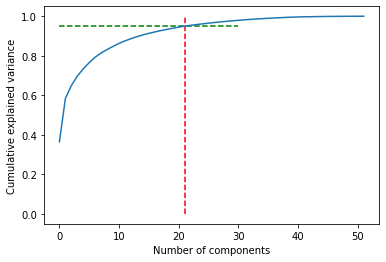

In [272]:
# Making the screeplot

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.vlines(x=21, ymax=1, ymin = 0.0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin = 0, colors="g", linestyles="--")
plt.show()

Around 21 components explain around 95% variance, so considering 21 components for model

In [273]:
# Using incremental PCA for efficiency and time saving

from sklearn.decomposition import PCA,IncrementalPCA
pca_final = IncrementalPCA(n_components = 21)

X_train_pca = pca_final.fit_transform(X_train_smote)
print('Shape of Train dataset after PCA: ',X_train_pca.shape)

X_test_pca = pca_final.transform(X_test)
print('Shape of test dataset after PCA: ',X_test_pca.shape)

Shape of Train dataset after PCA:  (38618, 21)
Shape of test dataset after PCA:  (9001, 21)


In [274]:
X_train_pca

array([[-0.1454339 , -0.68600521,  0.19825808, ...,  0.22345722,
         0.15434729,  0.27333497],
       [ 1.43655878,  0.33730108,  0.33743737, ...,  0.04674108,
        -0.15931883,  0.04587242],
       [ 0.02840207, -1.05146816,  0.09675838, ...,  0.1656141 ,
         0.23906218,  0.07058335],
       ...,
       [-1.11261527,  0.31667492,  0.17248369, ...,  0.00576964,
        -0.06809509, -0.02703452],
       [-0.9425126 ,  0.16139424,  0.4396346 , ...,  0.07540255,
         0.03674753,  0.02216783],
       [-0.19354026, -0.98932436, -0.27165663, ..., -0.05952182,
        -0.05691433,  0.1167058 ]])

In [275]:
X_train_pca_df = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                                      'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
                                                      'PC20', 'PC21'])
X_train_pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.145434 -0.686005  0.198258 -0.119817  0.537539  0.071503  0.046396   
1  1.436559  0.337301  0.337437 -0.429091 -0.123612  0.372041 -0.071819   
2  0.028402 -1.051468  0.096758  0.047187  0.331266  0.180323  0.140958   
3  0.421224 -1.418128  0.316404 -0.227925  0.314895  0.004699  0.141886   
4  1.274906  0.636695  0.325272 -0.421380 -0.207112  0.458941 -0.605262   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.320617  0.214882 -0.170568  0.515256 -0.226487 -0.028333  0.131970   
1  0.153677  0.037509 -0.317560  0.284597 -0.106500  0.069061 -0.210721   
2  0.518996 -0.084789 -0.089195  0.304674  0.067439 -0.176068 -0.005477   
3  0.196726 -0.274987  0.038303  0.092465  0.228334  0.184870  0.272014   
4 -0.144267 -0.014571  0.471872 -0.239070  0.193272 -0.106701  0.045151   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  
0 -0.021368 -0.303821 -0.078437 -0.055862  0.223457  0.154347  0.273335  
1  0.174859  0.255610 -0.084228 -0.237330  0.046741 -0.159319  0.045872  
2  0.056987 -0.224903 -0.053911 -0.008736  0.165614  0.239062  0.070583  
3  0.053612  0.159810 -0.016829 -0.056901 -0.235574 -0.173647  0.290116  
4 -0.010991  0.207804 -0.014646  0.039664 -0.193805  0.201997  0.272072

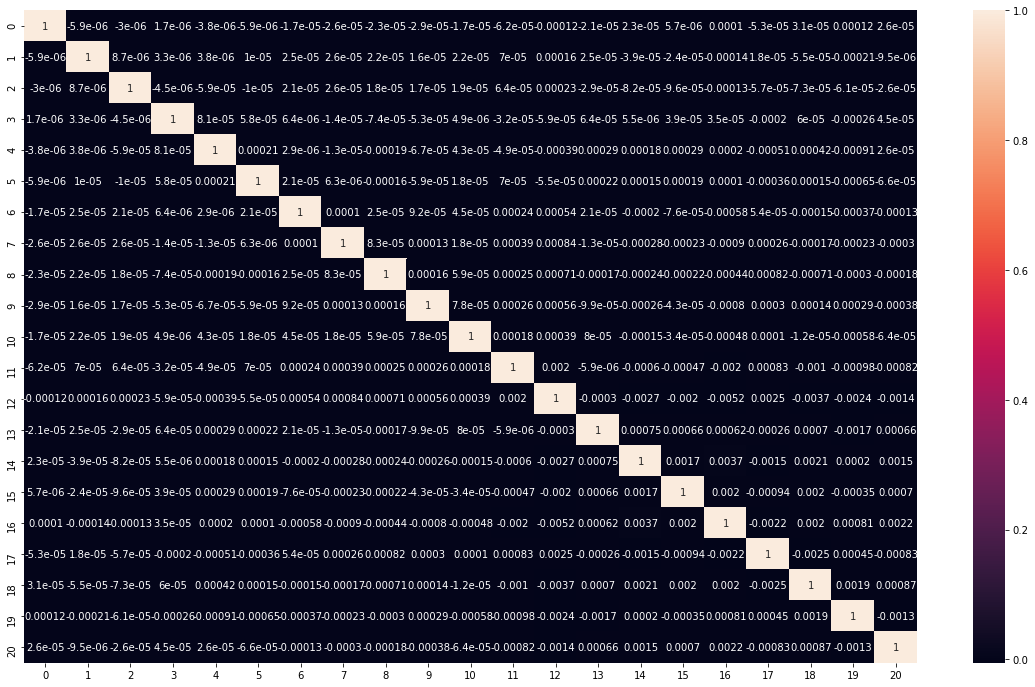

In [276]:
# Creating correlation Matrix

corrmat = np.corrcoef(X_train_pca_df.transpose())
plt.figure(figsize=(20, 12))
sns.heatmap(corrmat,annot=True)
plt.show()

- 
As expected there is little or no correlation between any two components

In [277]:
X_test_pca

array([[-3.95690727e-01, -3.90229630e-01,  1.85628773e-01, ...,
        -1.43592250e-01, -5.73444020e-02,  4.73854881e-02],
       [ 3.47793395e-01,  9.24747137e-01, -7.47511030e-01, ...,
         4.80369980e-02, -9.11283814e-02, -3.51048570e-02],
       [ 4.08348372e-01, -1.23849183e+00,  4.68957274e-01, ...,
        -9.57257652e-02, -2.36587540e-02, -1.12908758e-01],
       ...,
       [ 1.63406203e+00,  4.78772054e-01,  7.05007746e-01, ...,
        -4.11287277e-02,  1.03327266e-01, -1.31050630e-01],
       [ 7.35565880e-02,  1.41457006e+00, -2.25827440e-01, ...,
        -1.87991201e-01, -1.13824892e-03,  1.45992044e-01],
       [ 1.34292563e-01, -1.27566744e+00, -1.72918652e-01, ...,
        -4.00492855e-02, -1.14821316e-01, -5.44720983e-02]])

In [278]:
X_test_pca_df = pd.DataFrame(X_test_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                                      'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
                                                      'PC20', 'PC21'])
X_test_pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.395691 -0.390230  0.185629 -0.217659  0.339473 -0.185340 -0.113935   
1  0.347793  0.924747 -0.747511  0.025614  0.012520 -0.319981  0.040731   
2  0.408348 -1.238492  0.468957  0.061898 -0.293244 -0.047006 -0.156028   
3 -0.010054 -0.876079  0.278608 -0.251877  0.115896 -0.120072  0.004977   
4 -0.578835  0.117136  0.597674  0.425938  0.041976  0.725360 -0.005864   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.191950  0.289886  0.025939  0.221042 -0.065034  0.018750  0.085945   
1  0.186421 -0.212446 -0.312512  0.080850  0.212229 -0.165448  0.095851   
2 -0.344875 -0.052986  0.081520  0.214608  0.230212  0.318893  0.133169   
3 -0.090585  0.008183 -0.025574 -0.030263 -0.144704  0.073437 -0.210574   
4  0.002412 -0.134778 -0.316649 -0.136260 -0.069859 -0.197509 -0.220535   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  
0 -0.073918  0.193881 -0.037598  0.038388 -0.143592 -0.057344  0.047385  
1 -0.267616 -0.110693  0.109471  0.162388  0.048037 -0.091128 -0.035105  
2 -0.203433  0.092746 -0.119588  0.008076 -0.095726 -0.023659 -0.112909  
3  0.075119 -0.192520 -0.024160  0.068109 -0.055181 -0.036686  0.001555  
4 -0.339639 -0.034864 -0.044899  0.009445  0.191530  0.255939  0.125652

In [279]:
col_pca = X_train_pca_df.columns
col_pca

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21'],
      dtype='object')

___
### For the prediction of customer Churn, lets fit different models and select the one with best churn predictor.
Interpretable Model
1. Logistic Regression without PCA

High Performance Model (With PCA)
1. Logistic Regression with PCA
2. Random Forest
3. XGBoost


#### 6.2.2: Logistic Regression With PCA


In [280]:
# Training the model

lr_pca_1 = sm.GLM(y_train_smote, (sm.add_constant(X_train_pca_df[col_pca])), family = sm.families.Binomial())
res = lr_pca_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38596
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14632.
Date:                Mon, 16 Aug 2021   Deviance:                       29263.
Time:                        23:45:13   Pearson chi2:                 3.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1089      0.016      6.604      0.000       0.077       0.141
PC1           -2.1147      0.022    -97.697      0.000      -2.157      -2.072
PC2            0.6293      0.019     33.827      0.000       0.593       0.666
PC3           -0.6829      0.035    -19.301      0.000      -0.752      -0.614
PC4            1.5742      0.042     37.874      0.000       1.493       1.656
PC5           -0.4549      0.052     -8.686      0.000      -0.558      -0.352
PC6            0.9367      0.051     18.303      0.000       0.836       1.037
PC7            0.9489      0.054     17.483      0.000       0.843       1.055
PC8            0.3166      0.063      5.063      0.000       0.194       0.439
PC9           -2.5795      0.067    -38.326      0.000      -2.711      -2.448
PC10           0.7124      0.074      9.617      0.000       0.567       0.858
PC11          -0.3707      0.069     -5.387      0.000      -0.506      -0.236
PC12           0.1852      0.075      2.481      0.013       0.039       0.332
PC13           0.7964      0.088      9.039      0.000       0.624       0.969
PC14          -0.4495      0.088     -5.125      0.000      -0.621      -0.278
PC15          -0.8951      0.097     -9.231      0.000      -1.085      -0.705
PC16          -0.2668      0.101     -2.642      0.008      -0.465      -0.069
PC17          -1.9586      0.108    -18.218      0.000      -2.169      -1.748
PC18          -1.4754      0.120    -12.334      0.000      -1.710      -1.241
PC19           0.1473      0.111      1.329      0.184      -0.070       0.364
PC20           0.2035      0.116      1.757      0.079      -0.023       0.430
PC21           0.1161      0.113      1.023      0.306      -0.106       0.338
==============================================================================
"""

In [281]:
# The p-values of the principal component number 21 is the highest. Thus we would be dropping this component

In [282]:
col_pca = col_pca.drop('PC21')
col_pca

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20'],
      dtype='object')

In [283]:
col_pca.shape

(20,)

In [284]:
# Let's re-run the model using the selected variables
lr_pca_2 = sm.GLM(y_train_smote, (sm.add_constant(X_train_pca_df[col_pca])), family = sm.families.Binomial())
res = lr_pca_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14632.
Date:                Mon, 16 Aug 2021   Deviance:                       29264.
Time:                        23:45:14   Pearson chi2:                 3.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1090      0.016      6.610      0.000       0.077       0.141
PC1           -2.1149      0.022    -97.705      0.000      -2.157      -2.072
PC2            0.6290      0.019     33.814      0.000       0.593       0.665
PC3           -0.6835      0.035    -19.316      0.000      -0.753      -0.614
PC4            1.5750      0.042     37.897      0.000       1.494       1.656
PC5           -0.4546      0.052     -8.680      0.000      -0.557      -0.352
PC6            0.9377      0.051     18.323      0.000       0.837       1.038
PC7            0.9484      0.054     17.472      0.000       0.842       1.055
PC8            0.3159      0.063      5.052      0.000       0.193       0.438
PC9           -2.5799      0.067    -38.332      0.000      -2.712      -2.448
PC10           0.7121      0.074      9.613      0.000       0.567       0.857
PC11          -0.3698      0.069     -5.374      0.000      -0.505      -0.235
PC12           0.1834      0.075      2.458      0.014       0.037       0.330
PC13           0.7967      0.088      9.041      0.000       0.624       0.969
PC14          -0.4491      0.088     -5.121      0.000      -0.621      -0.277
PC15          -0.8938      0.097     -9.217      0.000      -1.084      -0.704
PC16          -0.2677      0.101     -2.651      0.008      -0.466      -0.070
PC17          -1.9584      0.108    -18.211      0.000      -2.169      -1.748
PC18          -1.4762      0.120    -12.337      0.000      -1.711      -1.242
PC19           0.1474      0.111      1.328      0.184      -0.070       0.365
PC20           0.2047      0.116      1.768      0.077      -0.022       0.432
==============================================================================
"""

In [285]:
# The p-values of the principal component number 19 is the highest. Thus we would be dropping this component

In [286]:
col_pca = col_pca.drop('PC19')
col_pca

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC20'],
      dtype='object')

In [287]:
col_pca.shape

(19,)

In [288]:
# Let's re-run the model using the selected variables
lr_pca_3 = sm.GLM(y_train_smote, (sm.add_constant(X_train_pca_df[col_pca])), family = sm.families.Binomial())
res = lr_pca_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14633.
Date:                Mon, 16 Aug 2021   Deviance:                       29266.
Time:                        23:45:14   Pearson chi2:                 3.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1077      0.016      6.545      0.000       0.075       0.140
PC1           -2.1149      0.022    -97.720      0.000      -2.157      -2.072
PC2            0.6278      0.019     33.790      0.000       0.591       0.664
PC3           -0.6821      0.035    -19.284      0.000      -0.751      -0.613
PC4            1.5733      0.042     37.871      0.000       1.492       1.655
PC5           -0.4531      0.052     -8.655      0.000      -0.556      -0.351
PC6            0.9389      0.051     18.345      0.000       0.839       1.039
PC7            0.9499      0.054     17.494      0.000       0.843       1.056
PC8            0.3150      0.063      5.037      0.000       0.192       0.438
PC9           -2.5780      0.067    -38.301      0.000      -2.710      -2.446
PC10           0.7129      0.074      9.616      0.000       0.568       0.858
PC11          -0.3692      0.069     -5.362      0.000      -0.504      -0.234
PC12           0.1825      0.075      2.446      0.014       0.036       0.329
PC13           0.7938      0.088      9.008      0.000       0.621       0.967
PC14          -0.4531      0.088     -5.166      0.000      -0.625      -0.281
PC15          -0.8979      0.097     -9.260      0.000      -1.088      -0.708
PC16          -0.2653      0.101     -2.628      0.009      -0.463      -0.067
PC17          -1.9622      0.108    -18.237      0.000      -2.173      -1.751
PC18          -1.4873      0.120    -12.410      0.000      -1.722      -1.252
PC20           0.2084      0.116      1.801      0.072      -0.018       0.435
==============================================================================
"""

In [289]:
# The p-values of the principal component number 20 is the highest. Thus we would be dropping this component

In [290]:
col_pca = col_pca.drop('PC20')
col_pca

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
      dtype='object')

In [291]:
col_pca.shape

(18,)

In [292]:
# Let's re-run the model using the selected variables
lr_pca_4 = sm.GLM(y_train_smote, (sm.add_constant(X_train_pca_df[col_pca])), family = sm.families.Binomial())
res = lr_pca_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14635.
Date:                Mon, 16 Aug 2021   Deviance:                       29269.
Time:                        23:45:14   Pearson chi2:                 3.90e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1103      0.016      6.729      0.000       0.078       0.142
PC1           -2.1154      0.022    -97.682      0.000      -2.158      -2.073
PC2            0.6272      0.019     33.765      0.000       0.591       0.664
PC3           -0.6832      0.035    -19.326      0.000      -0.752      -0.614
PC4            1.5752      0.042     37.934      0.000       1.494       1.657
PC5           -0.4471      0.052     -8.549      0.000      -0.550      -0.345
PC6            0.9402      0.051     18.362      0.000       0.840       1.041
PC7            0.9519      0.054     17.530      0.000       0.846       1.058
PC8            0.3180      0.063      5.087      0.000       0.196       0.441
PC9           -2.5819      0.067    -38.389      0.000      -2.714      -2.450
PC10           0.7083      0.074      9.561      0.000       0.563       0.853
PC11          -0.3678      0.069     -5.346      0.000      -0.503      -0.233
PC12           0.1885      0.075      2.529      0.011       0.042       0.335
PC13           0.7912      0.088      8.984      0.000       0.619       0.964
PC14          -0.4463      0.088     -5.097      0.000      -0.618      -0.275
PC15          -0.8903      0.097     -9.194      0.000      -1.080      -0.700
PC16          -0.2619      0.101     -2.598      0.009      -0.460      -0.064
PC17          -1.9590      0.108    -18.201      0.000      -2.170      -1.748
PC18          -1.4792      0.119    -12.402      0.000      -1.713      -1.245
==============================================================================
"""

In [293]:
# Since the p-values of all the principal components in this model is below 0.05, and the fact that the principal components
# are orthogonal to each other, we are sure that the VIF of all the principal components in this model would be 1.

# However, let us still cross-verify the same

In [294]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_pca_df[col_pca].columns
vif['VIF'] = [variance_inflation_factor(X_train_pca_df[col_pca].values, i) for i in range(X_train_pca_df[col_pca].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0   PC1      1.0
1   PC2      1.0
16  PC17     1.0
15  PC16     1.0
14  PC15     1.0
13  PC14     1.0
12  PC13     1.0
11  PC12     1.0
10  PC11     1.0
9   PC10     1.0
8   PC9      1.0
7   PC8      1.0
6   PC7      1.0
5   PC6      1.0
4   PC5      1.0
3   PC4      1.0
2   PC3      1.0
17  PC18     1.0

As expected, the VIF of all the principal components is 1. Since p-values of all of these principal components is below 0.05, we would treat 'lr_pca_4' as our final model of Logistic Regression with PCA.

In [295]:
# Model Evaluation on the train set (Logistic Regression with PCA)

In [296]:
# Predictions on the train set 'sm.add_constant(X_train_pca_df[col_pca]', then reshaping in to an array and then assigning
# the values to 'y_train_pca_pred':
y_train_pca_pred = res.predict(sm.add_constant(X_train_pca_df[col_pca])).values.reshape(-1)

In [297]:
y_train_pca_pred[:10]

array([0.26546196, 0.03760258, 0.44172122, 0.2001046 , 0.05446044,
       0.07071023, 0.06828667, 0.0519162 , 0.22949123, 0.22929968])

In [298]:
# Creating the data frame 'y_train_pca_pred_final' to check churn probability predicted against churn and mobile numbers:
y_train_pca_pred_final = pd.DataFrame({'Churn':y_train_smote.values, 'Churn_Prob':y_train_pca_pred})
y_train_pca_pred_final['mobile_number'] = mn
y_train_pca_pred_final.head()

Churn  Churn_Prob  mobile_number
0  0.0    0.265462    7000842753   
1  0.0    0.037603    7001865778   
2  0.0    0.441721    7001625959   
3  0.0    0.200105    7001204172   
4  0.0    0.054460    7000142493

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [299]:
y_train_pca_pred_final['predicted'] = y_train_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0  0.0    0.265462    7000842753     0        
1  0.0    0.037603    7001865778     0        
2  0.0    0.441721    7001625959     0        
3  0.0    0.200105    7001204172     0        
4  0.0    0.054460    7000142493     0

In [300]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pca_pred_final.Churn, y_train_pca_pred_final.predicted)
print(confusion)

[[16651  2658]
 [ 3681 15628]]


In [301]:
# Predicted     not_churn    churn
# Actual
# not_churn        16651     2658
# churn             3681     15628

Metrics beyond simple accuracy

In [302]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [303]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  15628
True Negatives =  16651
False Positives =  2658
False Negatives =  3681


In [304]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8093635092443938

In [305]:
# Let us calculate specificity
TN / float(TN+FP)

0.862343984670361

In [306]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13765601532963903


In [307]:
# positive predictive value 
print (TP / float(TP+FP))

0.8546428962047468


In [308]:
# Negative predictive value
print (TN / float(TN+ FN))

0.818955341333858


Plotting the ROC Curve

In [309]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [310]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pca_pred_final.Churn, y_train_pca_pred_final.Churn_Prob, drop_intermediate = False )

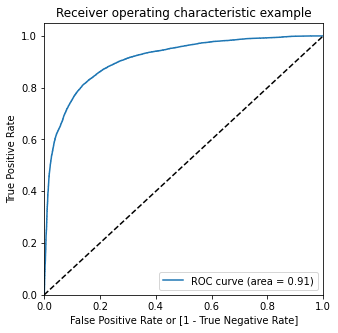

In [311]:
draw_roc(y_train_pca_pred_final.Churn, y_train_pca_pred_final.Churn_Prob)

Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [312]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pca_pred_final[i]= y_train_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.0    0.265462    7000842753     0          1    1    1    0    0    0     
1  0.0    0.037603    7001865778     0          1    0    0    0    0    0     
2  0.0    0.441721    7001625959     0          1    1    1    1    1    0     
3  0.0    0.200105    7001204172     0          1    1    1    0    0    0     
4  0.0    0.054460    7000142493     0          1    0    0    0    0    0     

   0.6  0.7  0.8  0.9  
0  0    0    0    0    
1  0    0    0    0    
2  0    0    0    0    
3  0    0    0    0    
4  0    0    0    0

In [313]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pca_pred_final.Churn, y_train_pca_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.669506  0.981563  0.357450
0.2  0.2   0.766482  0.942721  0.590243
0.3  0.3   0.815242  0.903983  0.726501
0.4  0.4   0.831866  0.856026  0.807706
0.5  0.5   0.835854  0.809364  0.862344
0.6  0.6   0.826583  0.753483  0.899684
0.7  0.7   0.808509  0.686053  0.930965
0.8  0.8   0.788415  0.621006  0.955824
0.9  0.9   0.748511  0.521467  0.975555


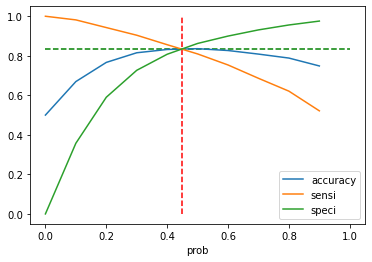

In [314]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin = 0.0, colors="r", linestyles="--")
plt.hlines(y=0.835, xmax=1, xmin = 0, colors="g", linestyles="--")
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability

In [315]:
y_train_pca_pred_final['final_predicted'] = y_train_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)

y_train_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  0.0    0.265462    7000842753     0          1    1    1    0    0    0     
1  0.0    0.037603    7001865778     0          1    0    0    0    0    0     
2  0.0    0.441721    7001625959     0          1    1    1    1    1    0     
3  0.0    0.200105    7001204172     0          1    1    1    0    0    0     
4  0.0    0.054460    7000142493     0          1    0    0    0    0    0     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  0    0    0    0    0                
2  0    0    0    0    0                
3  0    0    0    0    0                
4  0    0    0    0    0

Model Stats Summary:


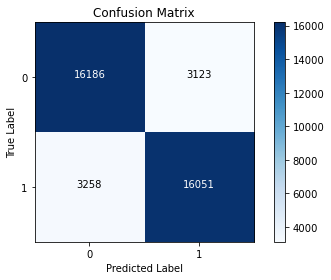

Model  Accuracy  Precision  Recall  \
0  Logistic Regression with PCA - on Train Set  0.83      0.83       0.84     

    AUC    F1  
0  0.83  0.83

In [316]:
print_model_metrics(y_train_pca_pred_final.Churn, y_train_pca_pred_final.final_predicted,'Logistic Regression with PCA - on Train Set')

In [317]:
confusion2 = metrics.confusion_matrix(y_train_pca_pred_final.Churn, y_train_pca_pred_final.final_predicted)
confusion2

array([[16186,  3123],
       [ 3258, 16051]], dtype=int64)

In [318]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [319]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  16051
True Negatives =  16186
False Positives =  3123
False Negatives =  3258


In [320]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8312703920451603

In [321]:
# Let us calculate specificity
TN / float(TN+FP)

0.8382619503858304

In [322]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16173804961416957


In [323]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8371231876499426


In [324]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8324418843859288


Precision and recall tradeoff

In [325]:
y_train_pca_pred_final.Churn, y_train_pca_pred_final.predicted

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        0.0
 6        0.0
 7        0.0
 8        0.0
 9        0.0
 10       0.0
 11       0.0
 12       0.0
 13       0.0
 14       0.0
 15       0.0
 16       0.0
 17       0.0
 18       1.0
 19       0.0
 20       0.0
 21       0.0
 22       0.0
 23       0.0
 24       0.0
 25       0.0
 26       0.0
 27       0.0
 28       0.0
 29       1.0
 30       0.0
 31       0.0
 32       0.0
 33       0.0
 34       1.0
 35       0.0
 36       0.0
 37       0.0
 38       0.0
 39       0.0
 40       0.0
 41       0.0
 42       0.0
 43       0.0
 44       1.0
 45       0.0
 46       0.0
 47       0.0
 48       1.0
 49       0.0
 50       0.0
 51       0.0
 52       0.0
 53       0.0
 54       0.0
 55       0.0
 56       0.0
 57       1.0
 58       0.0
 59       0.0
 60       0.0
 61       0.0
 62       0.0
 63       0.0
 64       0.0
 65       0.0
 66       0.0
 67       0.0
 68       0.0
 69       0.0
 70       0.0
 71   

In [326]:
p, r, thresholds = precision_recall_curve(y_train_pca_pred_final.Churn, y_train_pca_pred_final.Churn_Prob)

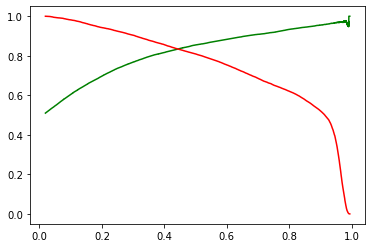

In [327]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [328]:
model_summary

Model  Accuracy  Precision  \
0  Logistic Regression without PCA - on Train Data  0.85      0.85        
1  Logistic Regression without PCA - on Test Data   0.85      0.85        
2  Logistic Regression with PCA - on Train Set      0.83      0.83        

   Recall   AUC    F1  
0  0.85    0.85  0.85  
1  0.34    0.85  0.48  
2  0.84    0.83  0.83

In [329]:
# Model Evaluation on the test set (Logistic Regression with PCA)

In [330]:
# Predictions on the test set 'sm.add_constant(X_test_pca_df[col_pca]', then reshaping in to an array and then assigning
# the values to 'y_test_pca_pred':
y_test_pca_pred = res.predict(sm.add_constant(X_test_pca_df[col_pca])).values.reshape(-1)

In [331]:
y_test_pca_pred[:10]

array([0.25389616, 0.56796377, 0.23263514, 0.23739571, 0.94361651,
       0.13176242, 0.06758687, 0.02180143, 0.23457662, 0.20872125])

In [332]:
y_test_pca_pred_final = pd.DataFrame({'Churn': y_test.values, 'Churn_Prob': y_test_pca_pred})
y_test_pca_pred_final['mobile_number'] = mn
y_test_pca_pred_final.head()

Churn  Churn_Prob  mobile_number
0  1.0    0.253896    7000842753   
1  1.0    0.567964    7001865778   
2  0.0    0.232635    7001625959   
3  0.0    0.237396    7001204172   
4  1.0    0.943617    7000142493

Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0 (0.5 is the random guess)

In [333]:
y_test_pca_pred_final['predicted'] = y_test_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0  1.0    0.253896    7000842753     0        
1  1.0    0.567964    7001865778     1        
2  0.0    0.232635    7001625959     0        
3  0.0    0.237396    7001204172     0        
4  1.0    0.943617    7000142493     1

In [334]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pca_pred_final.Churn, y_test_pca_pred_final.predicted)
print(confusion)

[[7193 1058]
 [ 148  602]]


In [335]:
# Predicted     not_churn    churn
# Actual
# not_churn         7193     1058
# churn              148      602

Metrics beyond simple accuracy

In [336]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [337]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  602
True Negatives =  7193
False Positives =  1058
False Negatives =  148


In [338]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8026666666666666

In [339]:
# Let us calculate specificity
TN / float(TN+FP)

0.8717731184098897

In [340]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12822688159011028


In [341]:
# positive predictive value 
print (TP / float(TP+FP))

0.36265060240963853


In [342]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9798392589565454


Plotting the ROC Curve

In [343]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pca_pred_final.Churn, y_test_pca_pred_final.Churn_Prob, drop_intermediate = False )

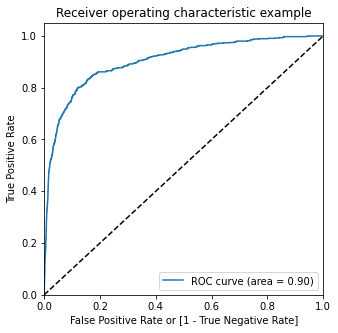

In [344]:
draw_roc(y_test_pca_pred_final.Churn, y_test_pca_pred_final.Churn_Prob)

Finding Optimal Cutoff Point Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [345]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pca_pred_final[i]= y_test_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  1.0    0.253896    7000842753     0          1    1    1    0    0    0     
1  1.0    0.567964    7001865778     1          1    1    1    1    1    1     
2  0.0    0.232635    7001625959     0          1    1    1    0    0    0     
3  0.0    0.237396    7001204172     0          1    1    1    0    0    0     
4  1.0    0.943617    7000142493     1          1    1    1    1    1    1     

   0.6  0.7  0.8  0.9  
0  0    0    0    0    
1  0    0    0    0    
2  0    0    0    0    
3  0    0    0    0    
4  1    1    1    1

In [346]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pca_pred_final.Churn, y_test_pca_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.083324  1.000000  0.000000
0.1  0.1   0.410843  0.972000  0.359835
0.2  0.2   0.624708  0.922667  0.597625
0.3  0.3   0.745362  0.877333  0.733366
0.4  0.4   0.823020  0.852000  0.820385
0.5  0.5   0.866015  0.802667  0.871773
0.6  0.6   0.892567  0.745333  0.905951
0.7  0.7   0.915343  0.694667  0.935402
0.8  0.8   0.928675  0.622667  0.956490
0.9  0.9   0.938118  0.524000  0.975761


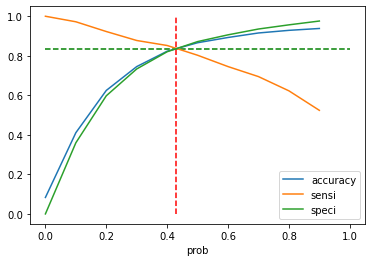

In [347]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.43, ymax=1, ymin = 0.0, colors="r", linestyles="--")
plt.hlines(y=0.835, xmax=1, xmin = 0, colors="g", linestyles="--")
plt.show()

From the curve above, 0.43 is the optimum point to take it as a cutoff probability

In [348]:
y_test_pca_pred_final['final_predicted'] = y_test_pca_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.43 else 0)

In [349]:
y_test_pca_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0  1.0    0.253896    7000842753     0          1    1    1    0    0    0     
1  1.0    0.567964    7001865778     1          1    1    1    1    1    1     
2  0.0    0.232635    7001625959     0          1    1    1    0    0    0     
3  0.0    0.237396    7001204172     0          1    1    1    0    0    0     
4  1.0    0.943617    7000142493     1          1    1    1    1    1    1     

   0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0                
1  0    0    0    0    1                
2  0    0    0    0    0                
3  0    0    0    0    0                
4  1    1    1    1    1

Model Stats Summary:


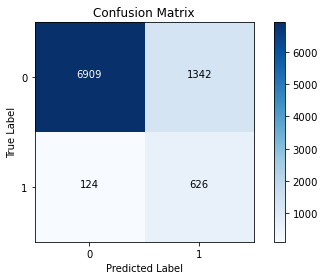

Model  Accuracy  Precision  Recall  \
0  Logistic Regression with PCA - on Test Set  0.84      0.83       0.32     

    AUC    F1  
0  0.84  0.46

In [350]:
print_model_metrics(y_test_pca_pred_final.Churn, y_test_pca_pred_final.final_predicted,'Logistic Regression with PCA - on Test Set')

In [351]:
confusion2 = metrics.confusion_matrix(y_test_pca_pred_final.Churn, y_test_pca_pred_final.final_predicted)
confusion2

array([[6909, 1342],
       [ 124,  626]], dtype=int64)

In [352]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [353]:
print("True Positives = ", TP)
print("True Negatives = ", TN)
print("False Positives = ", FP)
print("False Negatives = ", FN)

True Positives =  626
True Negatives =  6909
False Positives =  1342
False Negatives =  124


In [354]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8346666666666667

In [355]:
# Let us calculate specificity
TN / float(TN+FP)

0.8373530481153799

In [356]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16264695188462006


In [357]:
# Positive predictive value 
print (TP / float(TP+FP))

0.31808943089430897


In [358]:
# Negative predictive value
print (TN / float(TN+ FN))

0.982368832646097


Precision and recall tradeoff

In [359]:
y_test_pca_pred_final.Churn, y_test_pca_pred_final.predicted

(0       1.0
 1       1.0
 2       0.0
 3       0.0
 4       1.0
 5       0.0
 6       0.0
 7       0.0
 8       0.0
 9       0.0
 10      0.0
 11      0.0
 12      0.0
 13      0.0
 14      0.0
 15      0.0
 16      0.0
 17      0.0
 18      0.0
 19      0.0
 20      0.0
 21      0.0
 22      1.0
 23      0.0
 24      0.0
 25      0.0
 26      1.0
 27      0.0
 28      0.0
 29      0.0
 30      0.0
 31      0.0
 32      0.0
 33      0.0
 34      0.0
 35      0.0
 36      0.0
 37      0.0
 38      0.0
 39      0.0
 40      0.0
 41      0.0
 42      0.0
 43      0.0
 44      0.0
 45      0.0
 46      0.0
 47      0.0
 48      0.0
 49      0.0
 50      0.0
 51      0.0
 52      0.0
 53      0.0
 54      0.0
 55      0.0
 56      0.0
 57      0.0
 58      0.0
 59      0.0
 60      0.0
 61      0.0
 62      0.0
 63      0.0
 64      0.0
 65      0.0
 66      0.0
 67      0.0
 68      0.0
 69      0.0
 70      0.0
 71      0.0
 72      0.0
 73      0.0
 74      0.0
 75      0.0
 76      0.0

In [360]:
p, r, thresholds = precision_recall_curve(y_test_pca_pred_final.Churn, y_test_pca_pred_final.Churn_Prob)

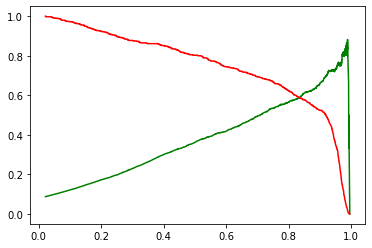

In [361]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [362]:
model_summary

Model  Accuracy  Precision  \
0  Logistic Regression without PCA - on Train Data  0.85      0.85        
1  Logistic Regression without PCA - on Test Data   0.85      0.85        
2  Logistic Regression with PCA - on Train Set      0.83      0.83        
3  Logistic Regression with PCA - on Test Set       0.84      0.83        

   Recall   AUC    F1  
0  0.85    0.85  0.85  
1  0.34    0.85  0.48  
2  0.84    0.83  0.83  
3  0.32    0.84  0.46

#### 6.2.3: Random Forest Models

#### 6.2.3.1 Without Hyperparameter Tuning and without PCA

In [363]:
# Importing the relevant Libraries:
from sklearn.ensemble import RandomForestClassifier

# Instantiating:
rf_1 = RandomForestClassifier(max_depth=4, random_state=100, oob_score=True)
rf_1.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=4, oob_score=True, random_state=100)

In [364]:
rf_1.oob_score_

0.863768190999016

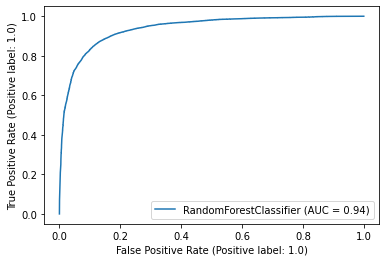

In [365]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_1, X_train_smote, y_train_smote)
plt.show()

In [366]:
# Making the predictions on the train set
y_pred_rf_train = rf_1.predict(X_train_smote)

In [367]:
# Model Evaluation on the train set - Random Forest on train data (Without PCA and Without Hyperparamater Tuning):

Model Stats Summary:


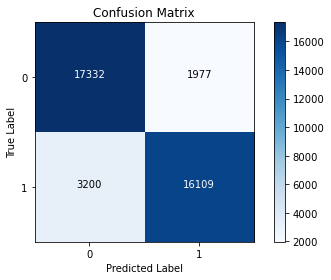

Model  \
0  Random Forest on train data (Without PCA and Without Hyperparamater Tuning)   

   Accuracy  Precision  Recall   AUC    F1  
0  0.87      0.83       0.89    0.87  0.86

In [368]:
print_model_metrics(y_train_smote, y_pred_rf_train, 'Random Forest on train data (Without PCA and Without Hyperparamater Tuning)')

In [369]:
# Model evaluation on the test set (without Hyperparameter tuning and without PCA)

In [370]:
# Making the predictions on the test set
y_pred_rf_test = rf_1.predict(X_test)

Model Stats Summary:


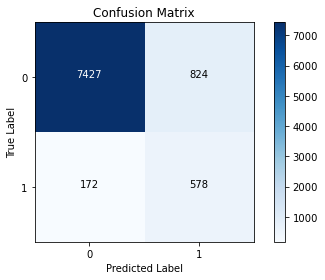

Model  \
0  Random Forest on test data (Without PCA and Without Hyperparamater Tuning)   

   Accuracy  Precision  Recall   AUC    F1  
0  0.89      0.77       0.41    0.84  0.54

In [371]:
print_model_metrics(y_test, y_pred_rf_test,'Random Forest on test data (Without PCA and Without Hyperparamater Tuning)')

In [372]:
model_summary

Model  \
0  Logistic Regression without PCA - on Train Data                               
1  Logistic Regression without PCA - on Test Data                                
2  Logistic Regression with PCA - on Train Set                                   
3  Logistic Regression with PCA - on Test Set                                    
4  Random Forest on train data (Without PCA and Without Hyperparamater Tuning)   
5  Random Forest on test data (Without PCA and Without Hyperparamater Tuning)    

   Accuracy  Precision  Recall   AUC    F1  
0  0.85      0.85       0.85    0.85  0.85  
1  0.85      0.85       0.34    0.85  0.48  
2  0.83      0.83       0.84    0.83  0.83  
3  0.84      0.83       0.32    0.84  0.46  
4  0.87      0.83       0.89    0.87  0.86  
5  0.89      0.77       0.41    0.84  0.54

#### 6.2.3.2: Hyperparameter Tuning and PCA

In [373]:
from sklearn.model_selection import RandomizedSearchCV

# Grid Search

#param_grid = {
#    'max_depth' : [3, 5, 7, 10, 15, 20],
#    'max_features' : [3, 5, 7, 10, 15, 20, 25]
#             }

# After performing fit on the above commented out param_grid, we found the best value for max_depth is 20 and for max_features
# is 5. It took 15 minutes 4 seconds to compute.

# Thus, in order to save processing time, we would consider the best values below:

param_grid = {
                'max_depth': [20],
                'max_features': [5]
             }

# Initializing the Model
rf_2 = RandomForestClassifier()

# Instantiate GridSearch Model
rf_grid_search = GridSearchCV(estimator = rf_2, param_grid = param_grid,
                              cv = 5, n_jobs= - 1, verbose = 1, return_train_score=True)

Fiting the grid search to the data

In [374]:
%%time
rf_grid_search.fit(X_train_pca_df, y_train_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 48.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': [5]},
             return_train_score=True, verbose=1)

In [375]:
rf_grid_search.best_score_

0.9582836997211782

In [376]:
rf_best = rf_grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=5)

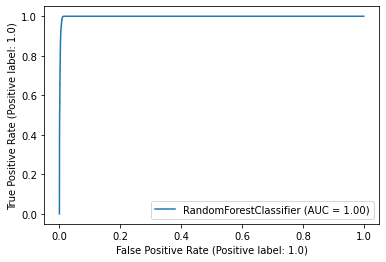

In [377]:
plot_roc_curve(rf_best, X_train_pca_df, y_train_smote)
plt.show()

In [378]:
# Making the predictions on the train set
y_pred_rf_train = rf_best.predict(X_train_pca_df)

In [379]:
# Model Evaluation on the train set - Random Forest on train data (With PCA and With Hyperparamater Tuning):

Model Stats Summary:


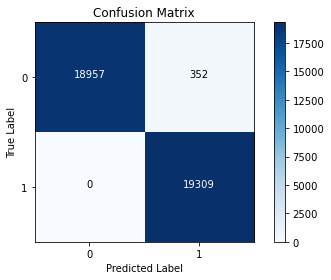

Model  \
0  Random Forest on train data (With PCA and With Hyperparamater Tuning)   

   Accuracy  Precision  Recall   AUC    F1  
0  0.99      1.0        0.98    0.99  0.99

In [380]:
print_model_metrics(y_train_smote, y_pred_rf_train, 'Random Forest on train data (With PCA and With Hyperparamater Tuning)')

In [381]:
# Model evaluation on the test set (with Hyperparameter tuning and with PCA)

In [382]:
# Making the predictions on the test set (Random Forest with PCA and Hyperparameter Tuning):
y_pred_rf_test = rf_best.predict(X_test_pca_df)

Model Stats Summary:


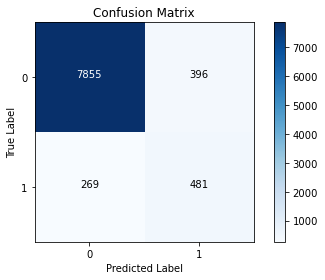

Model  \
0  Random Forest on test data (With PCA and With Hyperparamater Tuning)   

   Accuracy  Precision  Recall  AUC    F1  
0  0.93      0.64       0.55    0.8  0.59

In [383]:
print_model_metrics(y_test, y_pred_rf_test,'Random Forest on test data (With PCA and With Hyperparamater Tuning)')

In [384]:
model_summary

Model  \
0  Logistic Regression without PCA - on Train Data                               
1  Logistic Regression without PCA - on Test Data                                
2  Logistic Regression with PCA - on Train Set                                   
3  Logistic Regression with PCA - on Test Set                                    
4  Random Forest on train data (Without PCA and Without Hyperparamater Tuning)   
5  Random Forest on test data (Without PCA and Without Hyperparamater Tuning)    
6  Random Forest on train data (With PCA and With Hyperparamater Tuning)         
7  Random Forest on test data (With PCA and With Hyperparamater Tuning)          

   Accuracy  Precision  Recall   AUC    F1  
0  0.85      0.85       0.85    0.85  0.85  
1  0.85      0.85       0.34    0.85  0.48  
2  0.83      0.83       0.84    0.83  0.83  
3  0.84      0.83       0.32    0.84  0.46  
4  0.87      0.83       0.89    0.87  0.86  
5  0.89      0.77       0.41    0.84  0.54  
6  0.99      1.00       0.98    0.99  0.99  
7  0.93      0.64       0.55    0.80  0.59

In [385]:
rf_best.feature_importances_

array([0.30935044, 0.05132279, 0.04492616, 0.06521653, 0.02969237,
       0.0408907 , 0.05155961, 0.02565693, 0.05113342, 0.02886923,
       0.02450471, 0.02107459, 0.02333093, 0.0223697 , 0.0276797 ,
       0.04083029, 0.03702067, 0.02833672, 0.02921609, 0.02437656,
       0.02264186])

In [386]:
imp_df = pd.DataFrame({
    "Varname": X_train_pca_df.columns,
    "Imp": rf_best.feature_importances_
})

In [387]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0   PC1     0.309350
3   PC4     0.065217
6   PC7     0.051560
1   PC2     0.051323
8   PC9     0.051133
2   PC3     0.044926
5   PC6     0.040891
15  PC16    0.040830
16  PC17    0.037021
4   PC5     0.029692
18  PC19    0.029216
9   PC10    0.028869
17  PC18    0.028337
14  PC15    0.027680
7   PC8     0.025657
10  PC11    0.024505
19  PC20    0.024377
12  PC13    0.023331
20  PC21    0.022642
13  PC14    0.022370
11  PC12    0.021075

#### Step 6.3: XGBOOST Model

#### 6.3.1: Without PCA and without Hyperparameter Tuning

In [388]:
# Fitting training data on xgboost model
xgb_1 = XGBClassifier()
xgb_1.fit(X_train_smote, y_train_smote)

[23:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

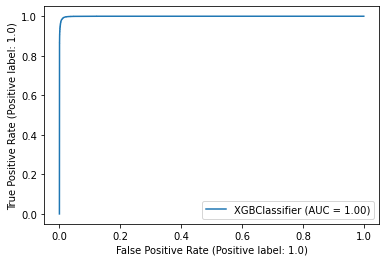

In [389]:
# Plotting ROC Curve:
plot_roc_curve(xgb_1, X_train_smote, y_train_smote)
plt.show()

In [390]:
# Making the predictions on the train set
y_pred_xgb_train = xgb_1.predict(X_train_smote)

In [391]:
# Model Evaluation on the train set - XG Boost on train data (Without PCA and Without Hyperparamater Tuning):

Model Stats Summary:


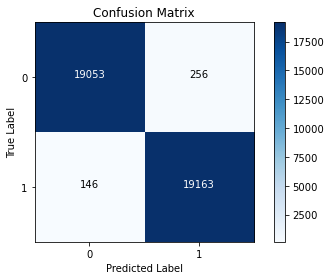

Model  \
0  XG Boost on train data (Without PCA and Without Hyperparamater Tuning)   

   Accuracy  Precision  Recall   AUC    F1  
0  0.99      0.99       0.99    0.99  0.99

In [392]:
print_model_metrics(y_train_smote, y_pred_xgb_train, 'XG Boost on train data (Without PCA and Without Hyperparamater Tuning)')

In [393]:
# Model evaluation on the test set (without Hyperparameter tuning and without PCA)

In [396]:
# Making the predictions on the test set
y_pred_xgb_test = xgb_1.predict(X_test)

Model Stats Summary:


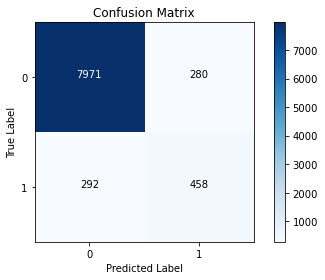

Model  \
0  XG Boost on test data (Without PCA and Without Hyperparamater Tuning)   

   Accuracy  Precision  Recall   AUC    F1  
0  0.94      0.61       0.62    0.79  0.62

In [397]:
print_model_metrics(y_test, y_pred_xgb_test, 'XG Boost on test data (Without PCA and Without Hyperparamater Tuning)')

#### 6.3.2: XGBoost with PCA and Hyperparameter tuning

In [398]:
# Using KFold
folds = 5

#Hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3],
              'subsample' : [0.3, 0.4, 0.5]}

# Initialising the Model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# GridSearchCV()
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv = folds,
                        n_jobs = -1,
                        verbose=1,
                        return_train_score = True)

In [399]:
# Fitting the model after hyperparameter tuning
model_cv.fit(X_train_pca_df, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[23:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [400]:
# Cross Validation Results
cv_results_xgboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xgboost['param_learning_rate'] = cv_results_xgboost['param_learning_rate'].astype('float')

In [401]:
# Accuracy Score
print('Accuracy Score: ', round(model_cv.best_score_,2))

Accuracy Score:  0.88


In [402]:
# Customized function for plotting XGBoost
def xgboost_plot(param_grid, cv_results):
  plt.figure(figsize=(15,5))
  for n, subsample in enumerate(param_grid['subsample']):
    #subplot
    plt.subplot(1,len(param_grid['subsample']),n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df['param_learning_rate'],df['mean_test_score'])
    plt.plot(df['param_learning_rate'],df['mean_train_score'])
    plt.xlabel('Learning Rate')
    plt.ylabel('AUC')
    plt.title('subsample={0}'.format(subsample))
    plt.ylim([0.60,1])
    plt.legend(['Test Score','Train Score'], loc='lower right')
    plt.xscale('log')


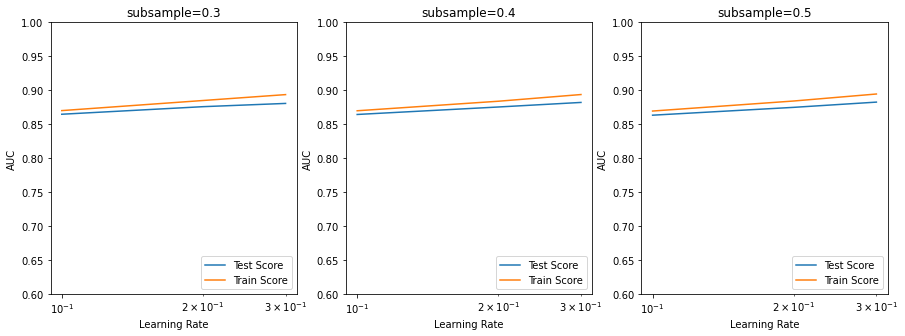

In [403]:
param_grid1 = {'learnin_rate' : [0.1, 0.2, 0.3],
               'subsample' : [0.3, 0.4, 0.5]}
xgboost_plot(param_grid1, cv_results_xgboost)


#### ***Conclusion :***
- The subsample size of 0.5 and learning_rate of 0.3 is optimal

In [404]:
# Fitting the model with the above optimal hyperparameters
params = {'learning_rate': [0.3],
          'max_depth': [2],
          'n_estimators': [200],
          'subsample' : [0.5],
          'objective' : ['binary:logistic']} 

# Model Fitting
xgb_2 = XGBClassifier(params = params, max_depth=2, n_estimators=200)
xgb_2.fit(X_train_pca_df, y_train_smote)

[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': [0.3], 'max_depth': [2],
                      'n_estimators': [200], 'objective': ['binary:logistic'],
                      'subsample': [0.5]},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [405]:
# Making the predictions on the train set
y_pred_xgb_train = xgb_2.predict(X_train_pca_df)

In [406]:
# Model Evaluation on the train set - XG Boost on train data (With PCA and With Hyperparamater Tuning):

Model Stats Summary:


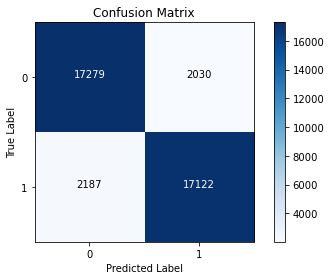

Model  Accuracy  \
0  XG Boost on train data (With PCA and With Hyperparamater Tuning)  0.89       

   Precision  Recall   AUC    F1  
0  0.89       0.89    0.89  0.89

In [407]:
print_model_metrics(y_train_smote, y_pred_xgb_train, 'XG Boost on train data (With PCA and With Hyperparamater Tuning)')

In [408]:
# Model evaluation on the test set (with Hyperparameter tuning and with PCA)

In [409]:
# Making the predictions on the test set:
y_pred_xgb_test = xgb_2.predict(X_test_pca_df)

Model Stats Summary:


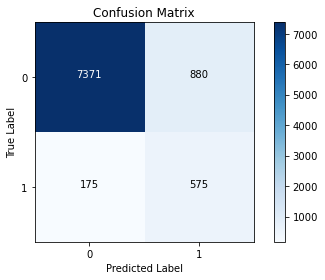

Model  Accuracy  \
0  XG Boost on test data (With PCA and With Hyperparamater Tuning)  0.88       

   Precision  Recall   AUC    F1  
0  0.77       0.4     0.83  0.52

In [410]:
print_model_metrics(y_test, y_pred_xgb_test, 'XG Boost on test data (With PCA and With Hyperparamater Tuning)')

In [411]:
model_summary

Model  \
0   Logistic Regression without PCA - on Train Data                               
1   Logistic Regression without PCA - on Test Data                                
2   Logistic Regression with PCA - on Train Set                                   
3   Logistic Regression with PCA - on Test Set                                    
4   Random Forest on train data (Without PCA and Without Hyperparamater Tuning)   
5   Random Forest on test data (Without PCA and Without Hyperparamater Tuning)    
6   Random Forest on train data (With PCA and With Hyperparamater Tuning)         
7   Random Forest on test data (With PCA and With Hyperparamater Tuning)          
8   XG Boost on train data (Without PCA and Without Hyperparamater Tuning)        
9   XG Boost on test data (Without PCA and Without Hyperparamater Tuning)         
10  XG Boost on train data (With PCA and With Hyperparamater Tuning)              
11  XG Boost on test data (With PCA and With Hyperparamater Tuning)               

    Accuracy  Precision  Recall   AUC    F1  
0   0.85      0.85       0.85    0.85  0.85  
1   0.85      0.85       0.34    0.85  0.48  
2   0.83      0.83       0.84    0.83  0.83  
3   0.84      0.83       0.32    0.84  0.46  
4   0.87      0.83       0.89    0.87  0.86  
5   0.89      0.77       0.41    0.84  0.54  
6   0.99      1.00       0.98    0.99  0.99  
7   0.93      0.64       0.55    0.80  0.59  
8   0.99      0.99       0.99    0.99  0.99  
9   0.94      0.61       0.62    0.79  0.62  
10  0.89      0.89       0.89    0.89  0.89  
11  0.88      0.77       0.40    0.83  0.52

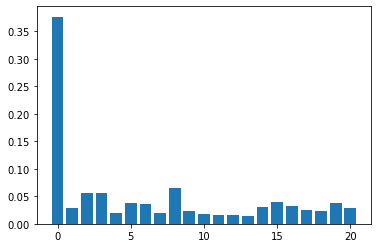

In [412]:
# Plotting Feature Importance
plt.bar(range(len(xgb_2.feature_importances_)), xgb_2.feature_importances_)
plt.show()

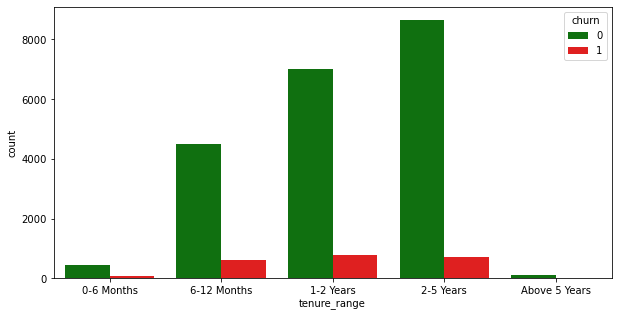

Important Indicators:


PC1       PC2       PC3
0   0.174669 -0.126946 -0.038085
1   0.119475 -0.216680 -0.045259
2   0.136321 -0.192037  0.008232
3  -0.039886 -0.007587 -0.097369
4  -0.041655 -0.027647 -0.130580
5   0.133498 -0.134916  0.106651
6   0.180539 -0.168781  0.148831
7   0.064103 -0.039265  0.120273
8   0.024279 -0.019451 -0.015542
9   0.180292 -0.170527  0.145545
10  0.079553 -0.226748 -0.175557
11  0.096843 -0.223402 -0.128361
12  0.019355 -0.015365  0.031833
13  0.115452 -0.274230 -0.161942
14  0.056463 -0.055774 -0.019815

In [413]:
plt.figure(figsize=(10,5))

sns.countplot(x='tenure_range', hue = 'churn', data= high_val, palette=('green','red'))
plt.show()

print('Important Indicators:')
col = list(X.columns)
df_pca = pd.DataFrame({'PC1': pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2]})
df_pca.head(15)

# Step 7: Final Model Selection

In [414]:
# Printing the summary for all models for comparison
model_summary

Model  \
0   Logistic Regression without PCA - on Train Data                               
1   Logistic Regression without PCA - on Test Data                                
2   Logistic Regression with PCA - on Train Set                                   
3   Logistic Regression with PCA - on Test Set                                    
4   Random Forest on train data (Without PCA and Without Hyperparamater Tuning)   
5   Random Forest on test data (Without PCA and Without Hyperparamater Tuning)    
6   Random Forest on train data (With PCA and With Hyperparamater Tuning)         
7   Random Forest on test data (With PCA and With Hyperparamater Tuning)          
8   XG Boost on train data (Without PCA and Without Hyperparamater Tuning)        
9   XG Boost on test data (Without PCA and Without Hyperparamater Tuning)         
10  XG Boost on train data (With PCA and With Hyperparamater Tuning)              
11  XG Boost on test data (With PCA and With Hyperparamater Tuning)               

    Accuracy  Precision  Recall   AUC    F1  
0   0.85      0.85       0.85    0.85  0.85  
1   0.85      0.85       0.34    0.85  0.48  
2   0.83      0.83       0.84    0.83  0.83  
3   0.84      0.83       0.32    0.84  0.46  
4   0.87      0.83       0.89    0.87  0.86  
5   0.89      0.77       0.41    0.84  0.54  
6   0.99      1.00       0.98    0.99  0.99  
7   0.93      0.64       0.55    0.80  0.59  
8   0.99      0.99       0.99    0.99  0.99  
9   0.94      0.61       0.62    0.79  0.62  
10  0.89      0.89       0.89    0.89  0.89  
11  0.88      0.77       0.40    0.83  0.52

## ***Conclusion :***
- RandomForest and XGBoost Models (Hypertuned and with PCA) are both giving avery high accuracy on the train data.
- The preferred model should be XGBoost with PCA and with parameters tuned as it has a slightly higher recall.
___


## ***Recommendations :***

- If interpretation is important, Logistic Regression (with PCA) model should be used.
- Company should pay close attention to ARPU and MOU and track any dip in these number in order to be able tap and retain these customers. 
The churn is for a lest number of High Value customers, so the company should onboard more high value customers
- The customers with less than 4 years tenure are more likely to churn, so company should try and retain them
- Local calls Minutes of usage has a very important role for Churn prediction. This is a key performance indicator company should focus on any reduction in these values
- Company should be paying more attention to the incoming and outgoing calls in month 8 because if the usage decreases, they are more likely to churn
- 2G and 3G services should be improved
___
